# Properati

* **El data set se encuentra aqui https://drive.google.com/a/acamica.com/uc?export=download&id=1Ugbsw5XbNRbglomSQO1qkAgMFB_3BzmB**

## 1- Entendimiento del negocio

Properati es una plataforma web y mobile de propiedades en donde se venden y arriendan inmuebles en Latinoamérica. Quienes busquen un nuevo hogar o quieran invertir en propiedades encontrarán en Properati, además de las ofertas disponibles, valiosa información para tomar las mejores decisiones: promedios de precios, características de los barrios, comparaciones, etc.

### Objetivos de negocio

* Ayudar a los tasadores/as a valuar las propiedades, ya que es un proceso difícil y, a veces, subjetivo.

### Objetivos de minería de datos

* Predecir el precio de los inmuebles.

### Plan de proceso

Crear un modelo de Machine Learning que, dadas ciertas características de la propiedad, prediga su precio de venta.

## 2- Entendimiento de los datos

Los datos que considero que puede ser útiles a la hora de trabajar en el problema son:

* Ubicación del inmueble - el barrio/zona donde se encuentre en determinada ciudad incide en el precio del mismo
* Cantidad de habitaciones y baños - el número de habitaciones y baños implica una mayor o menor comodidad por lo que el precio variará
* Superficie total y superficie cubierta - el tamaño del inmueble es un factor importante a la hora de elegir su precio
* Tipo de propiedad - el valor de una casa con respecto a un departamento con identicas características puede variar

### Recoleción de los datos

In [ ]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import random
from sklearn.metrics import mean_squared_error
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importo el dataset

In [ ]:
# COMPLETAR - AGREGAR TANTAS CELDAS COMO SEA NECESARIO
data = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv",sep=",",decimal=",")
print(type(data))
print("\nEl dataset tiene {} filas y {} columnas\n".format(data.shape[0],data.shape[1]))
data.head(5)

<class 'pandas.core.frame.DataFrame'>

El dataset tiene 146660 filas y 19 columnas



start_date    end_date  created_on                  lat  \
0  2019-10-17  2019-12-23  2019-10-17          -34.6058798   
1  2019-10-17  2019-11-21  2019-10-17  -34.624055600000005   
2  2019-10-17  2019-11-01  2019-10-17           -34.593569   
3  2019-10-17  2019-12-23  2019-10-17          -34.5812941   
4  2019-10-17  2020-03-11  2019-10-17       -34.9141937305   

                   lon         l1                      l2             l3  \
0   -58.38494910000001  Argentina         Capital Federal  San Cristobal   
1   -58.41211020000001  Argentina         Capital Federal          Boedo   
2           -58.427474  Argentina         Capital Federal        Palermo   
3  -58.436754099999995  Argentina         Capital Federal        Palermo   
4  -57.938219141000005  Argentina  Bs.As. G.B.A. Zona Sur       La Plata   

  rooms bedrooms bathrooms surface_total surface_covered     price currency  \
0   7.0      7.0       2.0         140.0           140.0  153000.0      USD   
1   2.0      1.0       2.0          70.0            58.0  159000.0      USD   
2   2.0      1.0       1.0          45.0            45.0  125000.0      USD   
3   2.0      1.0       1.0          85.0            50.0  295000.0      USD   
4   2.0      1.0       1.0          50.0            35.0   40000.0      USD   

                                               title  \
0        ***Venta semipiso centro, ideal hostel*****   
1   Espectacular PH reciclado en Boedo sin expensas.   
2  Depto.tipo casa de 2 ambientes en Venta en Pal...   
3  COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...   
4  58 entre 1 y 2  Venta de departamento en ph.1 ...   

                                         description property_type  \
0  DESCRIPCION DE LA PROPIEDAD: Departamento de 1...  Departamento   
1   PH reciclado en Boedo a una cuadra de la plaz...            PH   
2  2 ambienets amplio , excelente estado , patio ...            PH   
3  HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...            PH   
4  58 entre 1 y 2  Venta de departamento en PH. P...            PH   

  operation_type  
0          Venta  
1          Venta  
2          Venta  
3          Venta  
4          Venta

### Describir los datos

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   start_date       146660 non-null  object
 1   end_date         146660 non-null  object
 2   created_on       146660 non-null  object
 3   lat              136735 non-null  object
 4   lon              136701 non-null  object
 5   l1               146660 non-null  object
 6   l2               146660 non-null  object
 7   l3               146660 non-null  object
 8   rooms            146660 non-null  object
 9   bedrooms         146660 non-null  object
 10  bathrooms        140703 non-null  object
 11  surface_total    126133 non-null  object
 12  surface_covered  125046 non-null  object
 13  price            146660 non-null  object
 14  currency         146660 non-null  object
 15  title            146660 non-null  object
 16  description      146660 non-null  object
 17  property_t

In [ ]:
print("El tamano del dataset es de: ",data.shape)

El tamano del dataset es de:  (146660, 19)


In [ ]:
data.describe()

start_date    end_date  created_on         lat                  lon  \
count       146660      146660      146660      136735               136701   
unique         366         412         366       59636                60075   
top     2019-07-31  9999-12-31  2019-07-31  -34.425087  -58.579658499999994   
freq         11022       25101       11022         568                  516   

               l1               l2       l3   rooms bedrooms bathrooms  \
count      146660           146660   146660  146660   146660    140703   
unique          1                4       89      25       16        14   
top     Argentina  Capital Federal  Palermo     3.0      1.0       1.0   
freq       146660            92539    13073   44925    49705     82982   

       surface_total surface_covered     price currency  \
count         126133          125046    146660   146660   
unique          1843             876      6821        1   
top             50.0            40.0  120000.0      USD   
freq            2587            3284      2353   146660   

                        title  \
count                  146660   
unique                  77733   
top     DEPARTAMENTO EN VENTA   
freq                     5064   

                                              description property_type  \
count                                              146660        146660   
unique                                             106668            10   
top     EDIFICIO DE CATEGORIA CON MATERIALES Y ACCESOR...  Departamento   
freq                                                  235        107326   

       operation_type  
count          146660  
unique              1  
top             Venta  
freq           146660

Al usar el metodo 'describe()' puedo notar que las variables no estan en formato numerico, entonces decido transformarlas.

In [ ]:
properati = data.copy()
properati['start_date'] = pd.to_datetime(properati['start_date'], format='%Y-%m-%d')
#properati['end_date'] = pd.to_datetime(properati['end_date'], format='%Y-%m-%d')
properati['created_on'] = pd.to_datetime(properati['created_on'], format='%Y-%m-%d')

Transformo a variables numericas en los campos que  haga falta.

In [ ]:
properati['lat']=properati['lat'].apply(pd.to_numeric)
properati['lon']=properati['lon'].apply(pd.to_numeric)
properati['rooms']=properati['rooms'].apply(pd.to_numeric)
properati['bedrooms']=properati['bedrooms'].apply(pd.to_numeric)
properati['bathrooms']=properati['bathrooms'].apply(pd.to_numeric)
properati['surface_total']=properati['surface_total'].apply(pd.to_numeric)
properati['surface_covered']=properati['surface_covered'].apply(pd.to_numeric)
properati['price']=properati['price'].apply(pd.to_numeric)

In [ ]:
properati.dtypes

start_date         datetime64[ns]
end_date                   object
created_on         datetime64[ns]
lat                       float64
lon                       float64
l1                         object
l2                         object
l3                         object
rooms                     float64
bedrooms                  float64
bathrooms                 float64
surface_total             float64
surface_covered           float64
price                     float64
currency                   object
title                      object
description                object
property_type              object
operation_type             object
dtype: object

In [ ]:
properati.describe()

lat            lon          rooms       bedrooms  \
count  136735.000000  136701.000000  146660.000000  146660.000000   
mean      -34.604896     -58.465304       3.079817       1.983240   
std         0.468428       0.486190       1.416352       1.151304   
min       -35.318457    -180.000000       1.000000       0.000000   
25%       -34.627667     -58.504012       2.000000       1.000000   
50%       -34.600943     -58.443262       3.000000       2.000000   
75%       -34.574600     -58.407586       4.000000       3.000000   
max        85.051129     -57.805832      35.000000      15.000000   

           bathrooms  surface_total  surface_covered         price  
count  140703.000000  126133.000000    125046.000000  1.466600e+05  
mean        1.599994     216.872888       112.818011  2.412211e+05  
std         0.889324    2037.606649       916.857584  3.185195e+05  
min         1.000000      10.000000         1.000000  5.500000e+03  
25%         1.000000      52.000000        47.000000  1.110000e+05  
50%         1.000000      78.000000        68.000000  1.660000e+05  
75%         2.000000     140.000000       108.000000  2.650000e+05  
max        14.000000  193549.000000    126062.000000  3.243423e+07

Surface_total, surface_covered y price tienen la desviacion estandar mayor a la media.

### Explorar los datos

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
reporte = ProfileReport(data, title="Reporte de Properati")

In [ ]:
reporte 

Los datos mas relevantes obtenidos del reporte son los siguientes:

* 146660 filas
* 19 columnas
* 67982 celdas con valores nulos
* 2358 filas duplicadas


In [ ]:
properati.nunique()

start_date            366
end_date              412
created_on            366
lat                 59636
lon                 60075
l1                      1
l2                      4
l3                     89
rooms                  25
bedrooms               16
bathrooms              14
surface_total        1843
surface_covered       876
price                6821
currency                1
title               77733
description        106668
property_type          10
operation_type          1
dtype: int64

### Verificar la calidad de los datos

In [ ]:
properati.count()

start_date         146660
end_date           146660
created_on         146660
lat                136735
lon                136701
l1                 146660
l2                 146660
l3                 146660
rooms              146660
bedrooms           146660
bathrooms          140703
surface_total      126133
surface_covered    125046
price              146660
currency           146660
title              146660
description        146660
property_type      146660
operation_type     146660
dtype: int64

Usando la funcion ***count*** notamos que en el campo count no todos los datos tienen 14660 instancias, por lo que podemos afirmar que hay datos nulos en la las columnas lat, lon, bathrooms, surface_total y surface_covered.

Realizamos la suma de los valores nulos de cada campo

In [ ]:
properati.isnull().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [ ]:
print("El porcentaje de valores nulos en la variable 'lat' es del {}%".format((properati.lat.isnull().sum()/146660)*100))
print("El porcentaje de valores nulos en la variable 'lon' es del {}%".format((properati.lon.isnull().sum()/146660)*100))
print("El porcentaje de valores nulos en la variable 'bathrooms' es del {}%".format((properati.bathrooms.isnull().sum()/146660)*100))
print("El porcentaje de valores nulos en la variable 'surface_total' es del {}%".format((properati.surface_total.isnull().sum()/146660)*100))
print("El porcentaje de valores nulos en la variable 'surface_covered' es del {}%".format((properati.surface_covered.isnull().sum()/146660)*100))

El porcentaje de valores nulos en la variable 'lat' es del 6.767353061502796%
El porcentaje de valores nulos en la variable 'lon' es del 6.790535933451521%
El porcentaje de valores nulos en la variable 'bathrooms' es del 4.061775535251602%
El porcentaje de valores nulos en la variable 'surface_total' es del 13.996318014455204%
El porcentaje de valores nulos en la variable 'surface_covered' es del 14.737488067639436%


Notamos que las variables de superficies tienen aproximadademente el 14% de sus datos con valores nulos y el resto oscila entre el 4% y el 7%

In [ ]:
print("\nLa cantidad de instancias para tipo de propiedad es de:\n")
properati.groupby('property_type').agg({'property_type': 'count'})


La cantidad de instancias para tipo de propiedad es de:



property_type
property_type                 
Casa                     21521
Casa de campo              322
Cochera                    259
Departamento            107326
Depósito                   265
Local comercial            325
Lote                      1312
Oficina                    658
Otro                       374
PH                       14298

In [ ]:
print("\nLa cantidad de instancias para bathrooms es de:\n")
properati.groupby('bathrooms').agg({'bathrooms': 'count'})


La cantidad de instancias para bathrooms es de:



bathrooms
bathrooms           
1.0            82982
2.0            39068
3.0            13058
4.0             3949
5.0             1167
6.0              316
7.0              107
8.0               17
9.0               10
10.0              12
11.0               8
12.0               1
13.0               2
14.0               6

Puedo notar que no existen instancias con valores de bathrooms 0.

En propiedades como lote, local comercial, cochera y deposito seria normal encontrar valores de bathrooms 0.

A continuacion analizaremos cuantas instancias dee bathrooms con valorees faltantes hay para cada tipo de propiedad.

In [ ]:
p_type = properati.bathrooms.isnull().groupby([properati['property_type']]).sum().astype(int).reset_index(name='bathrooms_null')
p_type

property_type  bathrooms_null
0             Casa            1337
1    Casa de campo              21
2          Cochera             250
3     Departamento            2696
4         Depósito             229
5  Local comercial             171
6             Lote             835
7          Oficina             112
8             Otro             128
9               PH             178

Pero en realidad lo que nos interesa es la frecuencia de estos valores faltantes, porque no todos los intervalos tienen la misma cantidad de instancias.

Ordeno los datos tambien en orden descendente por freecuencia dee valores fatantes de bathrooms.

In [ ]:
#vf_V4V5['freq'] = bedrooms['bathrooms_null']/properati.groupby([properati['bedrooms']]).count()['bathrooms'].values
p_type['freq_bathrooms_null'] = p_type['bathrooms_null']/properati.groupby([properati['property_type']]).count()['bathrooms'].values
p_type = p_type.sort_values('freq_bathrooms_null',ascending=False)
p_type

property_type  bathrooms_null  freq_bathrooms_null
2          Cochera             250            27.777778
4         Depósito             229             6.361111
6             Lote             835             1.750524
5  Local comercial             171             1.110390
8             Otro             128             0.520325
7          Oficina             112             0.205128
1    Casa de campo              21             0.069767
0             Casa            1337             0.066241
3     Departamento            2696             0.025767
9               PH             178             0.012606

Finalmente graficamos

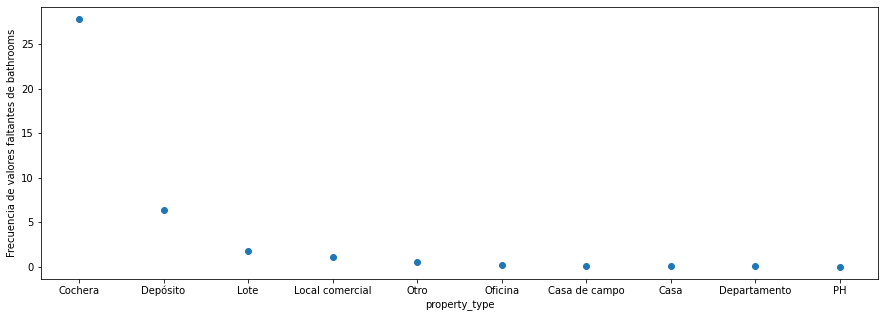

In [ ]:
plt.figure(figsize = (15,5))
plt.scatter(p_type['property_type'], p_type['freq_bathrooms_null'])
plt.xlabel('property_type')
plt.ylabel('Frecuencia de valores faltantes de bathrooms')
plt.show()

Por lo tanto del grafico y la tabla de frecuencia de valores faltantes de bathrooms vs tipo de propiedad puedo concluir lo siguiente:

Los tipos de propiedades con mayor freecuencia de valores faltantes de bathrooms son cochera, deposito, lote y local comercial, estos coinciden con los tipos de propiedades en los cuales seria normal encontrar instancias de bathrooms iguales a 0.

Podriamos decir que la calidad de los datos de bathrooms es dudosa, mas adelante lo analizaremos con mayor profundidad.

## 3- Preparación de los datos

### Descripción de los datos

Correlación de variables

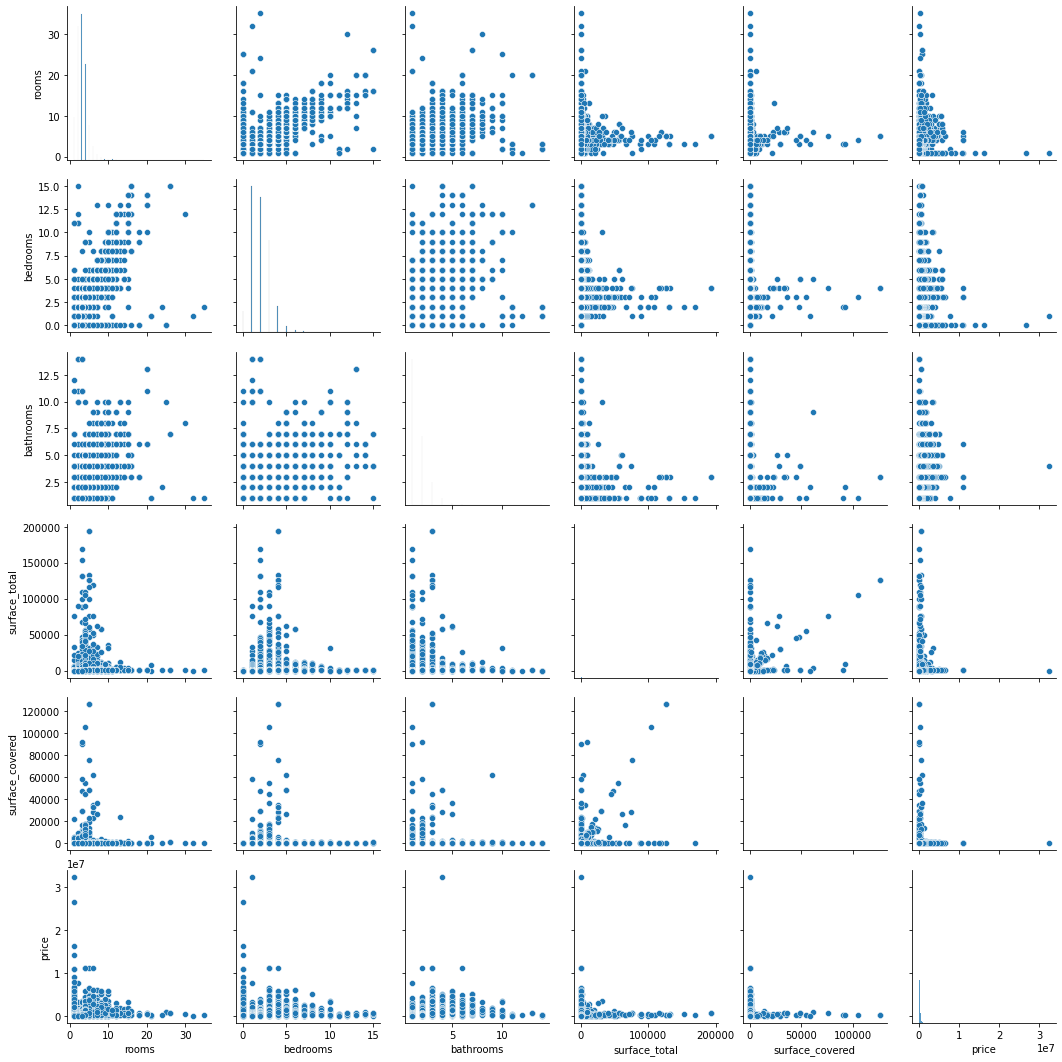

In [ ]:
sns.pairplot(properati.iloc[:,[8,9,10,11,12,13]])

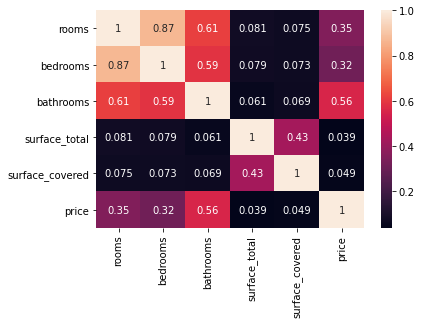

In [ ]:
sns.heatmap(properati.iloc[:,[8,9,10,11,12,13]].corr(), annot = True,  cbar_kws= {'orientation': 'vertical'})

* Se puede observar gran correlacion entre rooms con surface_covered, surface_total y bedrooms.

* Se puede observar gran correlacion entre bedrooms con surface_covered, surface_total y rooms.

* La mayor correlacion de price es con bathrooms con un valor de 0.56.



Estadisticas de los datos

In [ ]:
properati.describe()

lat            lon          rooms       bedrooms  \
count  136735.000000  136701.000000  146660.000000  146660.000000   
mean      -34.604896     -58.465304       3.079817       1.983240   
std         0.468428       0.486190       1.416352       1.151304   
min       -35.318457    -180.000000       1.000000       0.000000   
25%       -34.627667     -58.504012       2.000000       1.000000   
50%       -34.600943     -58.443262       3.000000       2.000000   
75%       -34.574600     -58.407586       4.000000       3.000000   
max        85.051129     -57.805832      35.000000      15.000000   

           bathrooms  surface_total  surface_covered         price  
count  140703.000000  126133.000000    125046.000000  1.466600e+05  
mean        1.599994     216.872888       112.818011  2.412211e+05  
std         0.889324    2037.606649       916.857584  3.185195e+05  
min         1.000000      10.000000         1.000000  5.500000e+03  
25%         1.000000      52.000000        47.000000  1.110000e+05  
50%         1.000000      78.000000        68.000000  1.660000e+05  
75%         2.000000     140.000000       108.000000  2.650000e+05  
max        14.000000  193549.000000    126062.000000  3.243423e+07

* Surface_total, surface_covered y price tienen la desviacion estandar mayor a la media. Una desviación estándar baja indica que la mayor parte de los datos de una muestra tienden a estar agrupados cerca de su media, mientras que una desviación estándar alta indica que los datos se extienden sobre un rango de valores más amplio.

* Hay datos nulos en la las columnas lat, lon, bathrooms, surface_total y surface_covered.

* La mayor cantidad de habitaciones es de 35, mientras de dormitorios es de 15 y de baños es de 14.

* El 75% de las instancias de habitaciones es menor o igual a 4, en dormitorios a 3 y en baños es 2. Por lo que podemos afirmar que los valoreres maximos de estas variables pueden llegar a ser consideradas atipicos.

* No existen instancias de habitaciones 0 ni de bathrooms 0.



### Selección de datos

In [ ]:
print(properati.groupby('currency').agg({'currency': 'count'}))
print(properati.groupby('operation_type').agg({'operation_type': 'count'}))
print(properati.groupby('l1').agg({'l1': 'count'}))

          currency
currency          
USD         146660
                operation_type
operation_type                
Venta                   146660
               l1
l1               
Argentina  146660


Las columnas currency, operation_type y l1 contienen todas las filas con el mismo valor, entonces procedermos a eliminarlas pues son redundantes.

Tambien eliminaremos la columnas title, description puesto que son columnas las cuales contienen informacion que consideramos que no nos seran utiles a la hora realizar nuestro modelo. 

Tambien eliminaremos las columnas que contienen fechas y las columnas latitud y longitud ya que consideramos que estas son redundantes puesto que ya contamos con la columna que indica a que barrio pertenece cada inmueble y no se encuentran valores nulos en estos.

In [ ]:
properati = properati.drop(['currency','operation_type','l1','title','description','start_date','end_date','created_on','lat','lon'],axis=1)
properati.head(5)

l2             l3  rooms  bedrooms  bathrooms  \
0         Capital Federal  San Cristobal    7.0       7.0        2.0   
1         Capital Federal          Boedo    2.0       1.0        2.0   
2         Capital Federal        Palermo    2.0       1.0        1.0   
3         Capital Federal        Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur       La Plata    2.0       1.0        1.0   

   surface_total  surface_covered     price property_type  
0          140.0            140.0  153000.0  Departamento  
1           70.0             58.0  159000.0            PH  
2           45.0             45.0  125000.0            PH  
3           85.0             50.0  295000.0            PH  
4           50.0             35.0   40000.0            PH

In [ ]:
data.groupby(['l1','l2']).agg({'l3': 'count'})

l3
l1        l2                             
Argentina Bs.As. G.B.A. Zona Norte  24282
          Bs.As. G.B.A. Zona Oeste  12666
          Bs.As. G.B.A. Zona Sur    17173
          Capital Federal           92539

[]

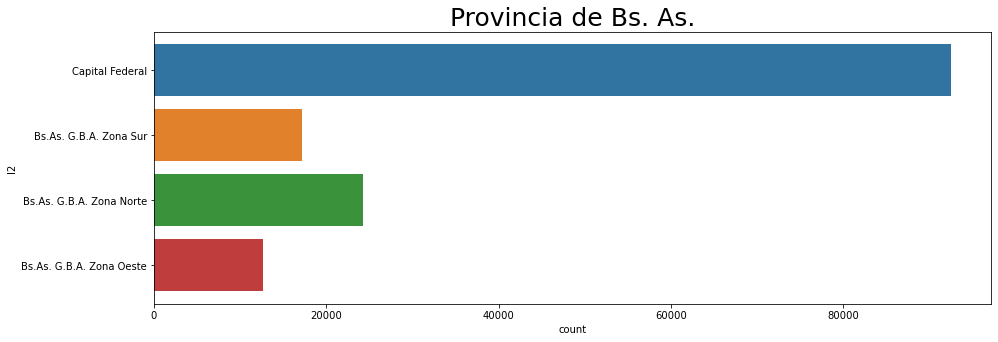

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot(data=data, y='l2') 
plt.gca().set_title('Provincia de Bs. As.', fontsize=25)
plt.plot()

Se puede observar que en Capital Federal se acumulan la mayoria de las instancias, por lo que podemos ir reduciendo nuestro foco de observacion a las tipos de propiedades que se encuentran ubicadas en Capital Federal, puesto que estos representan la mayoria de los datos.

In [ ]:
properati= properati[(properati.l2=='Capital Federal')]
properati.groupby('l2').agg({'l2': 'count'})

l2
l2                    
Capital Federal  92539

Eliminamos la columna l2 ya que todas sus instancias son iguales.

In [ ]:
properati = properati.drop(['l2'],axis=1)

In [ ]:
properati.groupby('property_type').agg({'property_type': 'count'})

property_type
property_type                 
Casa                      2692
Casa de campo                1
Cochera                    106
Departamento             79029
Depósito                    30
Local comercial            102
Lote                       243
Oficina                    458
Otro                       114
PH                        9764

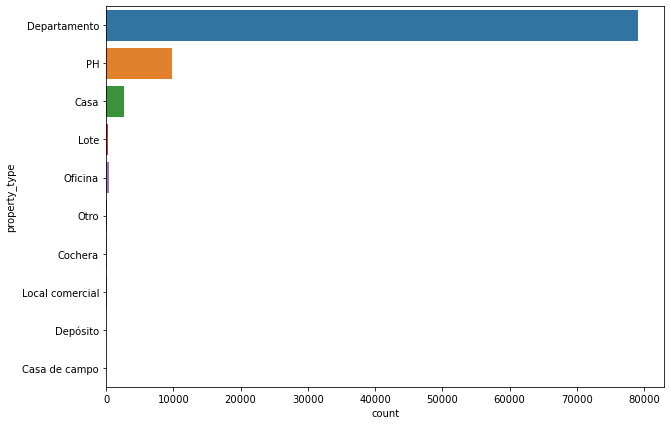

In [ ]:
fig, axs = plt.subplots(figsize=(10,7))
sns.countplot(data = properati, y = "property_type")

Se puede observar que aunque haya 10 tipos de propiedades, las instancias se encuentran distribuidas por amplia mayoria entre Casa, PH y Departamento. Es por esto que procederemos a dejar unicamente estas variables ya que representan la gran mayoria de la muestra.

In [ ]:
data_Casa = properati[(properati.property_type=='Casa')] 
data_Departamento = properati[(properati.property_type=='Departamento')]
data_PH = properati[(properati.property_type=='PH')]
data_Casa_PH_Departamento = data_Casa.append(data_Departamento).append(data_PH)
data_Casa_PH_Departamento.groupby('property_type').agg({'property_type': 'count'})

property_type
property_type               
Casa                    2692
Departamento           79029
PH                      9764

In [ ]:
properati = data_Casa_PH_Departamento
properati.shape

(91485, 8)

In [ ]:
properati.head(5)

l3  rooms  bedrooms  bathrooms  surface_total  \
336      San Cristobal    3.0       1.0        2.0          116.0   
384          Mataderos    3.0       2.0        1.0          171.0   
385   Villa Pueyrredón    3.0       2.0        1.0           71.0   
446   Villa Santa Rita    5.0       4.0        3.0          230.0   
454  Parque Avellaneda    6.0       5.0        1.0          210.0   

     surface_covered     price property_type  
336            116.0  290000.0          Casa  
384            120.0  179900.0          Casa  
385             68.0  174000.0          Casa  
446            244.0  490000.0          Casa  
454            189.0  225000.0          Casa

#### ¿Cuál es el barrio más caro de Buenos Aires? 

Text(0.5, 1.0, 'Surface_Covered vs Price')

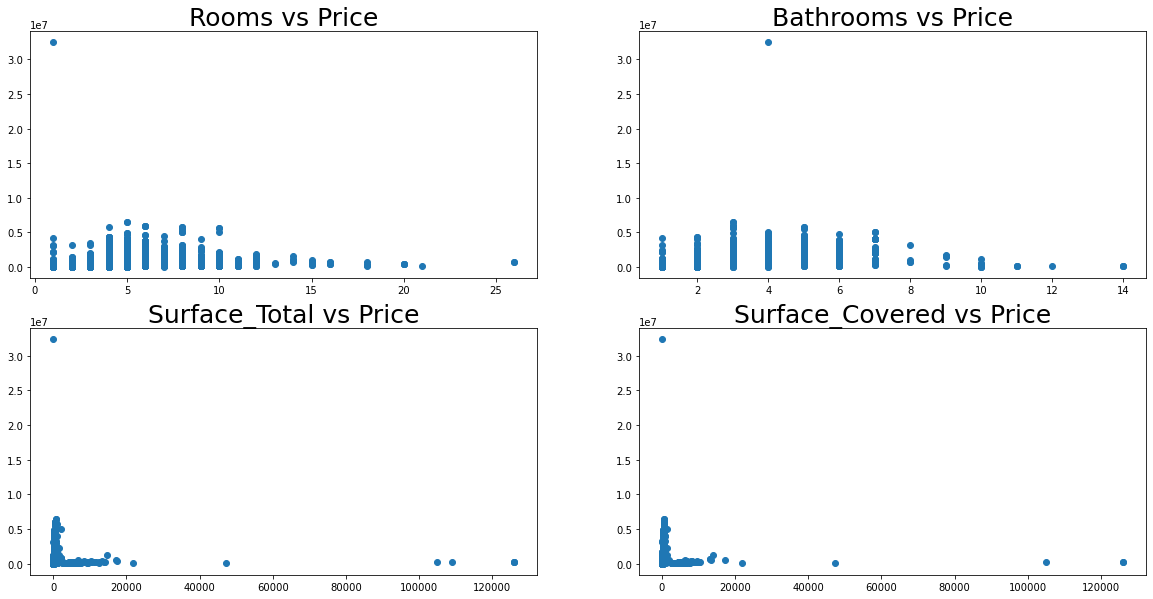

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
plt.scatter(x=properati.iloc[:,[1]],y=properati.iloc[:,[6]])
plt.gca().set_title('Rooms vs Price', fontsize=25)
plt.subplot(2,2,2)
plt.scatter(x=properati.iloc[:,[3]],y=properati.iloc[:,[6]])
plt.gca().set_title('Bathrooms vs Price', fontsize=25)
plt.subplot(2,2,3)
plt.scatter(x=properati.iloc[:,[4]],y=properati.iloc[:,[6]])
plt.gca().set_title('Surface_Total vs Price', fontsize=25)
plt.subplot(2,2,4)
plt.scatter(x=properati.iloc[:,[5]],y=properati.iloc[:,[6]])
plt.gca().set_title('Surface_Covered vs Price', fontsize=25)



En estas graficas de correlacion podemos notar que hay valores incongruentes puesto que en las superficies, a partir de 600 los valores del precio no llegan a valores tan altos como si lo hacen en superficies menores a 600. Lo mismo ocurre en la cantidad de habitaciones y baños, llegnado a tener valores de precios notablemente bajos en propiedades con 25 habitaciones o con 14 baños.

Entonces podemos creer que los datos pueden llegar a encontrarse sesgados de alguna manera. Por ejemplo que se realice la publicacion online con un precio que no sea el real como $11111. 

In [ ]:
media_precios_casa=properati[(properati.property_type=='Casa')].groupby(['l3']).agg({'price': 'mean'})
std_precios_casa=properati[(properati.property_type=='Casa')].groupby(['l3']).agg({'price': 'std'})

media_precios_departamento=properati[(properati.property_type=='Departamento')].groupby(['l3']).agg({'price': 'mean'})
std_precios_departamento=properati[(properati.property_type=='Departamento')].groupby(['l3']).agg({'price': 'std'})

media_precios_PH=properati[(properati.property_type=='PH')].groupby(['l3']).agg({'price': 'mean'})
std_precios_PH=properati[(properati.property_type=='PH')].groupby(['l3']).agg({'price': 'std'})

media_precios_all=properati.groupby(['l3']).agg({'price': 'mean'})
std_precios_all=properati.groupby(['l3']).agg({'price': 'std'})

media_precios = pd.concat([media_precios_all, std_precios_all, media_precios_casa, std_precios_casa, media_precios_departamento, std_precios_departamento, media_precios_PH, std_precios_PH],axis=1)
media_precios.columns=['Media de Precios Todos','Std de Precios Todos','Media de Precios Casa','Std de Precios Casa','Media de Precios Departamento','Std de Precios Departamento','Media de Precios PH','Std de Precios PH']

media_precios = media_precios.sort_values('Media de Precios Todos')
media_precios_all = media_precios_all.sort_values('price')
media_precios_casa = media_precios_casa.sort_values('price')
media_precios_departamento = media_precios_departamento.sort_values('price')
media_precios_PH = media_precios_PH.sort_values('price')

print('\nLas propiedades mas caras estan en {} con un precio medio de {} dolares y las mas baratas en {} con un precio medio de {} dolares.'.format(media_precios_all.loc[media_precios_all['price'] == media_precios_all.iloc[56,0]].index[0],media_precios_all.iloc[56,0],media_precios_all.loc[media_precios_all['price'] == media_precios_all.iloc[0,0]].index[0],media_precios_all.iloc[0,0]))
print('\nLas casas mas caras estan en {} con un precio medio de {} dolares y las mas baratas en {} con un precio medio de {} dolares.'.format(media_precios_casa.loc[media_precios_casa['price'] == media_precios_casa.iloc[50,0]].index[0],media_precios_casa.iloc[50,0],media_precios_casa.loc[media_precios_casa['price'] == media_precios_casa.iloc[0,0]].index[0],media_precios_casa.iloc[0,0]))
print('\nLos departamentos mas caros estan en {} con un precio medio de {} dolares y los mas baratos en {} con un precio medio de {} dolares.'.format(media_precios_departamento.loc[media_precios_departamento['price'] == media_precios_departamento.iloc[56,0]].index[0],media_precios_departamento.iloc[56,0],media_precios_departamento.loc[media_precios_departamento['price'] == media_precios_departamento.iloc[0,0]].index[0],media_precios_departamento.iloc[0,0]))
print('\nLos PH mas caros estan en {} con un precio medio de {} dolares y los mas baratos en {} con un precio medio de {} dolares.\n'.format(media_precios_PH.loc[media_precios_PH['price'] == media_precios_PH.iloc[54,0]].index[0],media_precios_PH.iloc[54,0],media_precios_PH.loc[media_precios_PH['price'] == media_precios_PH.iloc[0,0]].index[0],media_precios_PH.iloc[0,0]))

media_precios.tail(10)


Las propiedades mas caras estan en Puerto Madero con un precio medio de 985202.2096219931 dolares y las mas baratas en Constitución con un precio medio de 103759.85381355933 dolares.

Las casas mas caras estan en Palermo con un precio medio de 688055.5416666666 dolares y las mas baratas en Once con un precio medio de 83000.0 dolares.

Los departamentos mas caros estan en Puerto Madero con un precio medio de 985202.2096219931 dolares y los mas baratos en Villa Soldati con un precio medio de 62751.6129032258 dolares.

Los PH mas caros estan en Barrio Norte con un precio medio de 361556.4705882353 dolares y los mas baratos en Tribunales con un precio medio de 79000.0 dolares.



Media de Precios Todos  Std de Precios Todos  \
Coghlan                 222258.858362         153574.693731   
Villa Devoto            244957.827684         175389.266665   
Barrio Norte            296231.219199         234522.094683   
Nuñez                   305920.994914         325623.957527   
Retiro                  342064.363858         334405.420404   
Palermo                 354744.484662         509682.911164   
Belgrano                377029.863438         376876.201878   
Recoleta                410003.824502         430627.495442   
Las Cañitas             469488.154822         438133.565739   
Puerto Madero           985202.209622         745124.543383   

               Media de Precios Casa  Std de Precios Casa  \
Coghlan                490517.647059        211611.060418   
Villa Devoto           472929.245283        239939.308466   
Barrio Norte           795250.000000        739444.555055   
Nuñez                  591322.857143        321374.190757   
Retiro                 196500.000000         61518.289963   
Palermo                688055.541667        384041.855001   
Belgrano               820097.571429        619754.696083   
Recoleta               383033.333333        374787.909316   
Las Cañitas            260000.000000                  NaN   
Puerto Madero                    NaN                  NaN   

               Media de Precios Departamento  Std de Precios Departamento  \
Coghlan                        204297.088843                136813.117070   
Villa Devoto                   202591.524492                138148.284850   
Barrio Norte                   293803.196848                232329.186673   
Nuñez                          296013.850000                331163.316597   
Retiro                         343234.580566                335300.348995   
Palermo                        358197.064226                529784.207703   
Belgrano                       370959.276176                370304.582366   
Recoleta                       413291.895593                434874.968004   
Las Cañitas                    474400.085271                440431.524380   
Puerto Madero                  985202.209622                745124.543383   

               Media de Precios PH  Std de Precios PH  
Coghlan              215975.000000      100248.768742  
Villa Devoto         209891.493188       81874.263843  
Barrio Norte         361556.470588      245420.833151  
Nuñez                287233.088235      133176.723055  
Retiro               177000.000000       96674.712309  
Palermo              293118.853081      144284.273935  
Belgrano             300862.874251      136206.229287  
Recoleta             277071.848921      145280.624115  
Las Cañitas          193153.846154       77239.720086  
Puerto Madero                  NaN                NaN

In [ ]:
count_precios_casa=properati[(properati.property_type=='Casa')].groupby(['l3']).agg({'price': 'count'})

count_precios_departamento=properati[(properati.property_type=='Departamento')].groupby(['l3']).agg({'price': 'count'})

count_precios_PH=properati[(properati.property_type=='PH')].groupby(['l3']).agg({'price': 'count'})

count_precios_all=properati.groupby(['l3']).agg({'price': 'count'})

count_precios = pd.concat([count_precios_all,count_precios_casa,count_precios_departamento,count_precios_PH],axis=1)
count_precios.columns=['Cantidad_de_propiedades_en_total','Cantidad_de_Casas','Cantidad_de_Departamentos','Cantidad_de_PH']

count_precios_casa = count_precios.sort_values('Cantidad_de_Casas')
count_precios_departamento = count_precios.sort_values('Cantidad_de_Departamentos')
count_precios_PH = count_precios.sort_values('Cantidad_de_PH')
count_precios_all = count_precios.sort_values('Cantidad_de_propiedades_en_total')

"""
print('\nDonde mas propiedades se venden es en {} con un total de {} propiedades y donde menos se venden es en {} con un total de {} propiedades.'.format(count_precios_all.loc[count_precios_all['price'] == count_precios_all.iloc[56,0]].index[0],count_precios_all.iloc[56,0],count_precios_all.loc[count_precios_all['price'] == count_precios_all.iloc[0,0]].index[0],count_precios_all.iloc[0,0]))

print('\nDonde mas deptos se venden es en {} con un total de {} deptos y donde menos se venden es en {} con un total de {} deptos.'.format(count_precios_departamento.loc[count_precios_departamento['price'] == count_precios_departamento.iloc[56,0]].index[0],count_precios_departamento.iloc[56,0],count_precios_departamento.loc[count_precios_departamento['price'] == count_precios_departamento.iloc[0,0]].index[0],count_precios_departamento.iloc[0,0]))
print('\nDonde mas PH se venden es en {} con un total de {} PH y donde menos se venden es en {} con un total de {} PH.\n'.format(count_precios_PH.loc[count_precios_PH['price'] == count_precios_PH.iloc[56,0]].index[0],count_precios_PH.iloc[54,0],count_precios_PH.loc[count_precios_PH['price'] == count_precios_PH.iloc[0,0]].index[0],count_precios_PH.iloc[0,0]))
"""

print('\nDonde mas propiedades se venden es en {} con un total de {} propiedades y donde menos se venden es en {} con un total de {} propiedades.'.format(count_precios_all.Cantidad_de_propiedades_en_total.index[56],count_precios_all.Cantidad_de_propiedades_en_total.max(axis=0),count_precios_all.Cantidad_de_propiedades_en_total.index[0],count_precios_all.Cantidad_de_propiedades_en_total.min(axis=0)))
print('\nDonde mas casas se venden es en {} con un total de {} casas y donde menos se venden es en {} con un total de {} casas.'.format(count_precios_casa.Cantidad_de_Casas.index[56],count_precios_casa.Cantidad_de_Casas.max(axis=0),count_precios_casa.Cantidad_de_Casas.index[0],count_precios_casa.Cantidad_de_Casas.min(axis=0)))
print('\nDonde mas deptos se venden es en {} con un total de {} deptos y donde menos se venden es en {} con un total de {} deptos.'.format(count_precios_departamento.Cantidad_de_Departamentos.index[56],count_precios_departamento.Cantidad_de_Departamentos.max(axis=0),count_precios_departamento.Cantidad_de_Departamentos.index[0],count_precios_departamento.Cantidad_de_Departamentos.min(axis=0)))
print('\nDonde mas PH se venden es en {} con un total de {} PH y donde menos se venden es en {} con un total de {} PH.\n'.format(count_precios_PH.Cantidad_de_PH.index[56],count_precios_PH.Cantidad_de_PH.max(axis=0),count_precios_PH.Cantidad_de_PH.index[0],count_precios_PH.Cantidad_de_PH.min(axis=0)))


count_precios = count_precios.sort_values('Cantidad_de_propiedades_en_total')
count_precios.tail(10)



Donde mas propiedades se venden es en Palermo con un total de 13007 propiedades y donde menos se venden es en Catalinas con un total de 5 propiedades.

Donde mas casas se venden es en Tribunales con un total de 212.0 casas y donde menos se venden es en Once con un total de 1.0 casas.

Donde mas deptos se venden es en Palermo con un total de 11880 deptos y donde menos se venden es en Catalinas con un total de 5 deptos.

Donde mas PH se venden es en Puerto Madero con un total de 1055.0 PH y donde menos se venden es en Tribunales con un total de 1.0 PH.



Cantidad_de_propiedades_en_total  Cantidad_de_Casas  \
Flores                                     2535              176.0   
Balvanera                                  2941               26.0   
Barrio Norte                               3198                4.0   
Villa Urquiza                              3325              102.0   
Recoleta                                   5869               12.0   
Villa Crespo                               6429               39.0   
Caballito                                  6610              137.0   
Belgrano                                   6876              119.0   
Almagro                                    7498               42.0   
Palermo                                   13007               72.0   

               Cantidad_de_Departamentos  Cantidad_de_PH  
Flores                              2073           286.0  
Balvanera                           2559           356.0  
Barrio Norte                        3109            85.0  
Villa Urquiza                       2728           495.0  
Recoleta                            5718           139.0  
Villa Crespo                        5609           781.0  
Caballito                           5867           606.0  
Belgrano                            6590           167.0  
Almagro                             6710           746.0  
Palermo                            11880          1055.0

Donde mas propiedades se venden es en Palermo con un total de 13007 propiedades y donde menos se venden es en Catalinas con un total de 5 propiedades.

Las propiedades mas caras estan en Puerto Madero (aunque solo se venden departamentos) con un precio medio de 985202.209622 dolares y las mas baratas en Constitución con un precio medio de 103759.85381355933 dolares.

Donde mas propiedades se venden es en Palermo con un total de 13007 propiedades y al mismo tiempo la media de precios es la quinta mas alta. Por lo que podemos concluir ques es una zona de gran flujo de compra venta de inmuebles. Lo mismo en Belgrano, Recoleta y Barrio Norte puesto que se encuentran entre los primeros puestos en mayor cantidad de propiedades en venta y en media de precios mas altas.



### Limpieza de datos

#### Manejo de Valores Faltantes

Analizo primero los valores faltantes de la columna bathroom.

Veo la correlaciones con rooms y bedrooms

#### Bathrooms

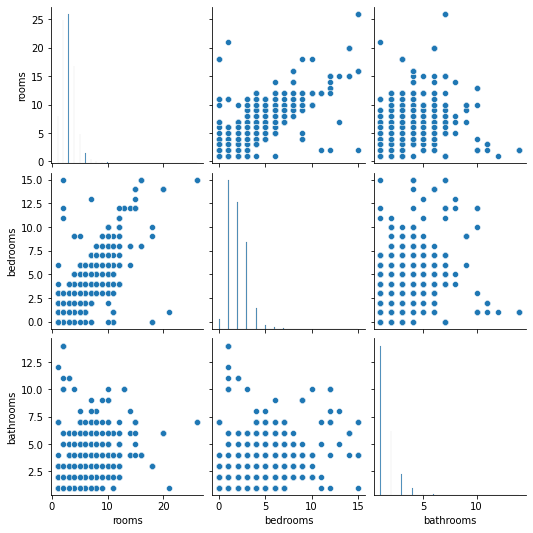

In [ ]:
sns.pairplot(properati.iloc[:,[1,2,3]])

D:\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


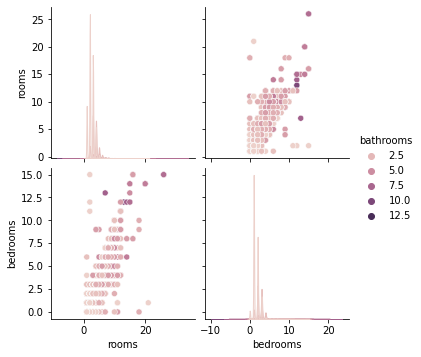

In [ ]:
sns.pairplot(properati.iloc[:,[1,2,3]], hue = 'bathrooms')

Bedrooms y rooms estan fuertemente correlacionados y tambien puedo observar con el hue en bathrooms que es mas oscuro el color cuando mas habitaciones y bedrooms hay.

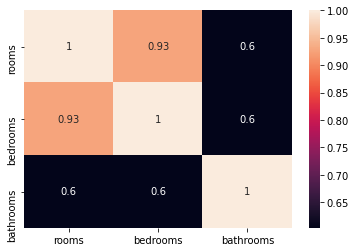

In [ ]:
sns.heatmap(properati.iloc[:,[1,2,3]].corr(), annot = True,  cbar_kws= {'orientation': 'vertical'})

In [ ]:
properati.groupby(['rooms','bedrooms','bathrooms']).agg({'bathrooms': 'count'})

bathrooms
rooms bedrooms bathrooms           
1.0   0.0      1.0             1779
               2.0               55
               3.0                4
               7.0                4
      1.0      1.0             6416
...                             ...
18.0  9.0      3.0                1
      10.0     3.0                1
20.0  14.0     6.0                4
21.0  1.0      1.0                1
26.0  15.0     7.0                2

[312 rows x 1 columns]

Analizo ahora cuantos valores nulos de baños por cada instancia

In [ ]:
properati[(properati.bathrooms.isnull())]

l3  rooms  bedrooms  bathrooms  surface_total  \
5000             Liniers    4.0       3.0        NaN          217.0   
7388            Belgrano    8.0       7.0        NaN          302.0   
8187           Mataderos    5.0       4.0        NaN          105.0   
11810       Villa Lugano    4.0       3.0        NaN            NaN   
14238       Villa Lugano    3.0       2.0        NaN          373.0   
...                  ...    ...       ...        ...            ...   
112472           Liniers    4.0       3.0        NaN           73.0   
112473         Mataderos    4.0       3.0        NaN          120.0   
116047   Velez Sarsfield    3.0       2.0        NaN           80.0   
118252     Villa Urquiza    5.0       4.0        NaN          317.0   
129530  Villa Santa Rita    2.0       1.0        NaN           41.0   

        surface_covered     price property_type  
5000              217.0  380000.0          Casa  
7388              302.0  960000.0          Casa  
8187              140.0  220000.0          Casa  
11810               NaN  420000.0          Casa  
14238             215.0  230000.0          Casa  
...                 ...       ...           ...  
112472             73.0  185000.0            PH  
112473             90.0  265000.0            PH  
116047             60.0  160000.0            PH  
118252            317.0  248000.0            PH  
129530             41.0   79000.0            PH  

[2171 rows x 8 columns]

A continuacion se puede observar cuantas instancias de valores nulos de bathrooms hay por cada valor de bedrooms

La correlacion entre bathrooms y bedrooms es la misma que la de bathrooms con rooms, con  solo bathrooms conteniendo valores faltantes.

In [ ]:
#properati[(properati.bathrooms.isnull())].groupby(['bedrooms']).agg({'bedrooms': 'count'})
bedrooms = properati.bathrooms.isnull().groupby([properati['bedrooms']]).sum().astype(int).reset_index(name='bathrooms_null')
bedrooms

bedrooms  bathrooms_null
0        0.0             339
1        1.0             801
2        2.0             605
3        3.0             272
4        4.0             119
5        5.0              19
6        6.0              13
7        7.0               2
8        8.0               1
9        9.0               0
10      10.0               0
11      11.0               0
12      12.0               0
13      13.0               0
14      14.0               0
15      15.0               0

Pero en realidad lo que nos interesa es la frecuencia de estos valores faltantes, porque no todos los intervalos tienen la misma cantidad de instancias.

In [ ]:
#vf_V4V5['freq'] = bedrooms['bathrooms_null']/properati.groupby([properati['bedrooms']]).count()['bathrooms'].values
bedrooms['freq_bathrooms_null'] = bedrooms['bathrooms_null']/properati.groupby([properati['bedrooms']]).count()['bathrooms'].values
bedrooms

bedrooms  bathrooms_null  freq_bathrooms_null
0        0.0             339             0.180511
1        1.0             801             0.024061
2        2.0             605             0.021224
3        3.0             272             0.013939
4        4.0             119             0.025090
5        5.0              19             0.023428
6        6.0              13             0.042484
7        7.0               2             0.011429
8        8.0               1             0.029412
9        9.0               0             0.000000
10      10.0               0             0.000000
11      11.0               0             0.000000
12      12.0               0             0.000000
13      13.0               0             0.000000
14      14.0               0             0.000000
15      15.0               0             0.000000

Finalmente graficamos

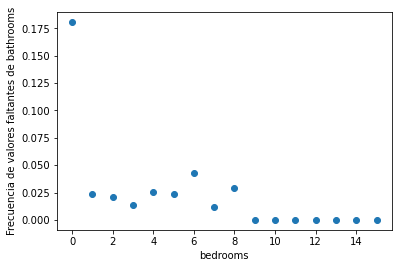

In [ ]:
plt.scatter(bedrooms['bedrooms'], bedrooms['freq_bathrooms_null'])
plt.xlabel('bedrooms')
plt.ylabel('Frecuencia de valores faltantes de bathrooms')
plt.show()

Por lo tanto del grafico puedo concluir lo siguiente:

* Cuando el valor de bedrooms es 0, las probabilidades de que bathrooms contenga un valor nulo es alta puesto que la frecuencia es de 0.18.
* Para valores altos de bedrooms (>8), no se encuentran valores nulos de bathrooms, indicando que cuando una propiedad contiene muchos dormitorios, esta siempre indica la cantidad de baños.
* Y que para valores medios y bajos de cantidad de dormitorios, se encuentra una frecuencia baja de valores faltantes de bathrooms.

In [ ]:
properati.groupby(['bathrooms']).agg({'bathrooms': 'count'})

bathrooms
bathrooms           
1.0            54801
2.0            23573
3.0             7645
4.0             2365
5.0              714
6.0              154
7.0               39
8.0                4
9.0                5
10.0               7
11.0               3
12.0               1
14.0               3

Podemos observar que no existen instancias de bathrooms con valor 0. Tambien que la frecuencia de valores nulos de bathrooms cuando bedrooms es cero es alta. Por lo que podemos sospechar que los valores faltantes de bathrooms podrian indidar que la cantidad de baños es cero.

Tambien del grafico y la tabla de frecuencia de valores faltantes de bathrooms vs tipo de propiedad concluimos que los tipos de propiedades con mayor freecuencia de valores faltantes de bathrooms son cochera, deposito, lote y local comercial, estos coinciden con los tipos de propiedades en los cuales seria normal encontrar instancias de bathrooms iguales a 0.

Entonces decidimos reemplazar los valores nulos de baños por cero (0).

In [ ]:
properati_2 = properati.fillna({'bathrooms' : 0})
properati_2.groupby(['bathrooms']).agg({'bathrooms': 'count'})

bathrooms
bathrooms           
0.0             2171
1.0            54801
2.0            23573
3.0             7645
4.0             2365
5.0              714
6.0              154
7.0               39
8.0                4
9.0                5
10.0               7
11.0               3
12.0               1
14.0               3

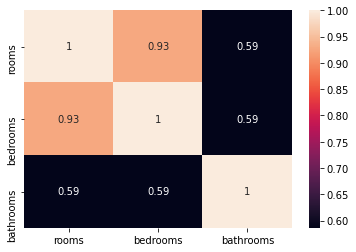

In [ ]:
sns.heatmap(properati_2.iloc[:,[1,2,3]].corr(), annot = True,  cbar_kws= {'orientation': 'vertical'})

#### Surface_total / Surface_covered

Analizo primero la correlacion de las superficies con el precio y el tipo de propiedad

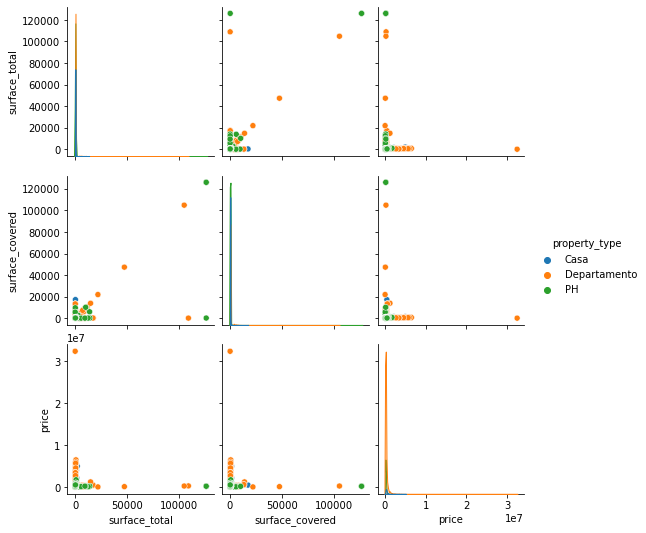

In [ ]:
sns.pairplot(properati.iloc[:,[4,5,6,7]], hue = 'property_type')

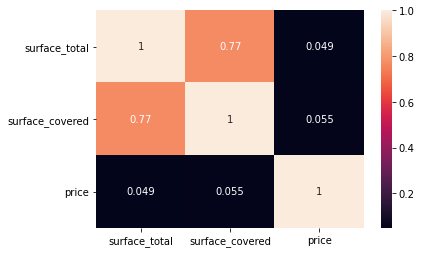

In [ ]:
sns.heatmap(properati.iloc[:,[4,5,6,7]].corr(), annot = True,  cbar_kws= {'orientation': 'vertical'})

No se encuentra una correlacion muy significativa, por lo que a continuacion analizaremos la cantidad de valores nulos de surface_covered y luego de surface_total para cada barrio de capital federal.

In [ ]:
l3 = properati.surface_covered.isnull().groupby([properati['l3']]).sum().astype(int).reset_index(name='surface_covered_null')
l3.head(5)

l3  surface_covered_null
0     Abasto                    51
1  Agronomía                     7
2    Almagro                   658
3  Balvanera                   509
4   Barracas                    61

La frecuencia de valores nulos por cada instancia es:

In [ ]:
l3['freq_surface_covered_null'] = l3['surface_covered_null']/properati.groupby([properati['l3']]).count()['surface_covered'].values
l3.head(5)

l3  surface_covered_null  freq_surface_covered_null
0     Abasto                    51                   0.124088
1  Agronomía                     7                   0.044586
2    Almagro                   658                   0.096199
3  Balvanera                   509                   0.209293
4   Barracas                    61                   0.088663

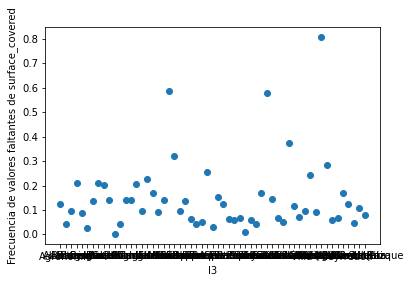

In [ ]:
plt.scatter(l3['l3'], l3['freq_surface_covered_null'])
plt.xlabel('l3')
plt.ylabel('Frecuencia de valores faltantes de surface_covered')
plt.show()

La frecuencia de valores nulos en surface_covered por cada barrio varia de manera aleatoria para cada una.

Vamos a proceder a reemplzar los valores nulos de cada instancia por la media de la superficie cubierta de cada barrio. Para que de esta forma la media de los tamanos de las propiedades para cada barrio no varie y tambien para llenar estos valores faltantes.

A continuacion creamos un dataframe con los valores de la superfice cubierta media de la propiedades de cada barrio.

In [ ]:
media_surface_covered_barrio=properati.groupby(['l3']).agg({'surface_covered': 'mean'})
print(media_surface_covered_barrio.shape)
media_surface_covered_barrio.head(5)

(57, 1)


surface_covered
l3                        
Abasto           67.642336
Agronomía        89.700637
Almagro          79.670322
Balvanera        76.484375
Barracas         91.805233

Reemplazamos los valores nulos por la media de la superficie cubierta de cada barrio y luego nos fijamos que no haya valores nulos de surface_covered en el dataframe

In [ ]:
i = 0
while i<57:
    properati_2.loc[properati_2.l3 == media_surface_covered_barrio.iloc[i].name]  = properati_2.loc[properati_2.l3 == media_surface_covered_barrio.iloc[i].name].fillna({'surface_covered' : media_surface_covered_barrio.iloc[i,0]})
    properati_3 = properati_2
    i = i + 1
l3_2 = properati_3.surface_covered.isnull().groupby([properati['l3']]).sum().astype(int).reset_index(name='surface_covered_null')
l3_2.head(5)

l3  surface_covered_null
0     Abasto                     0
1  Agronomía                     0
2    Almagro                     0
3  Balvanera                     0
4   Barracas                     0

Ahora comprobaremos que la media no haya sido alterada.

In [ ]:
media_surface_covered_barrio_2=properati_3.groupby(['l3']).agg({'surface_covered': 'mean'})
print(media_surface_covered_barrio_2.shape)
media_surface_covered_barrio_2.head(5)

(57, 1)


surface_covered
l3                        
Abasto           67.642336
Agronomía        89.700637
Almagro          79.670322
Balvanera        76.484375
Barracas         91.805233

Realizaremos el mismo procedimiento para surface_total.

In [ ]:
l3 = properati.surface_total.isnull().groupby([properati['l3']]).sum().astype(int).reset_index(name='surface_total_null')
l3.head(5)

l3  surface_total_null
0     Abasto                  49
1  Agronomía                   7
2    Almagro                 639
3  Balvanera                 497
4   Barracas                  59

In [ ]:
media_surface_total_barrio=properati.groupby(['l3']).agg({'surface_total': 'mean'})
print(media_surface_total_barrio.shape)
media_surface_total_barrio.head(5)

(57, 1)


surface_total
l3                      
Abasto         76.186441
Agronomía     104.834395
Almagro        89.573116
Balvanera      87.882979
Barracas      111.124638

In [ ]:
i = 0
while i<57:
    properati_2.loc[properati_2.l3 == media_surface_total_barrio.iloc[i].name]  = properati_2.loc[properati_2.l3 == media_surface_total_barrio.iloc[i].name].fillna({'surface_total' : media_surface_total_barrio.iloc[i,0]})
    properati_3 = properati_2
    i = i + 1
l3_2 = properati_3.surface_total.isnull().groupby([properati['l3']]).sum().astype(int).reset_index(name='surface_total_null')
l3_2.head(5)

l3  surface_total_null
0     Abasto                   0
1  Agronomía                   0
2    Almagro                   0
3  Balvanera                   0
4   Barracas                   0

In [ ]:
media_surface_total_barrio_2=properati_3.groupby(['l3']).agg({'surface_total': 'mean'})
print(media_surface_total_barrio_2.shape)
media_surface_total_barrio_2.head(5)

(57, 1)


surface_total
l3                      
Abasto         76.186441
Agronomía     104.834395
Almagro        89.573116
Balvanera      87.882979
Barracas      111.124638

In [ ]:
properati_3.describe()

rooms      bedrooms     bathrooms  surface_total  \
count  91485.000000  91485.000000  91485.000000   91485.000000   
mean       2.964278      1.960278      1.523124     112.472572   
std        1.314704      1.072946      0.882587     931.724942   
min        1.000000      0.000000      0.000000      10.000000   
25%        2.000000      1.000000      1.000000      51.000000   
50%        3.000000      2.000000      1.000000      77.000000   
75%        4.000000      3.000000      2.000000     115.000000   
max       26.000000     15.000000     14.000000  126062.000000   

       surface_covered         price  
count     91485.000000  9.148500e+04  
mean         94.602933  2.595003e+05  
std         738.204411  3.222654e+05  
min           1.000000  6.000000e+03  
25%          46.000000  1.200000e+05  
50%          67.003505  1.750000e+05  
75%          99.561751  2.790000e+05  
max      126062.000000  3.243423e+07

De esta manera se finalizo la imputacion de valores faltantes para surface_total, surface_covered y bathrooms.

In [ ]:
properati = properati_3
properati.describe()

rooms      bedrooms     bathrooms  surface_total  \
count  91485.000000  91485.000000  91485.000000   91485.000000   
mean       2.964278      1.960278      1.523124     112.472572   
std        1.314704      1.072946      0.882587     931.724942   
min        1.000000      0.000000      0.000000      10.000000   
25%        2.000000      1.000000      1.000000      51.000000   
50%        3.000000      2.000000      1.000000      77.000000   
75%        4.000000      3.000000      2.000000     115.000000   
max       26.000000     15.000000     14.000000  126062.000000   

       surface_covered         price  
count     91485.000000  9.148500e+04  
mean         94.602933  2.595003e+05  
std         738.204411  3.222654e+05  
min           1.000000  6.000000e+03  
25%          46.000000  1.200000e+05  
50%          67.003505  1.750000e+05  
75%          99.561751  2.790000e+05  
max      126062.000000  3.243423e+07

### Manejo de Outliers

In [ ]:
properati.head(1)

l3  rooms  bedrooms  bathrooms  surface_total  \
336  San Cristobal    3.0       1.0        2.0          116.0   

     surface_covered     price property_type  
336            116.0  290000.0          Casa

Realizo un analisis bivariado de todas las viarables en relacion a price y busco outliers.

Text(0.5, 1.0, 'Surface Covered vs Price')

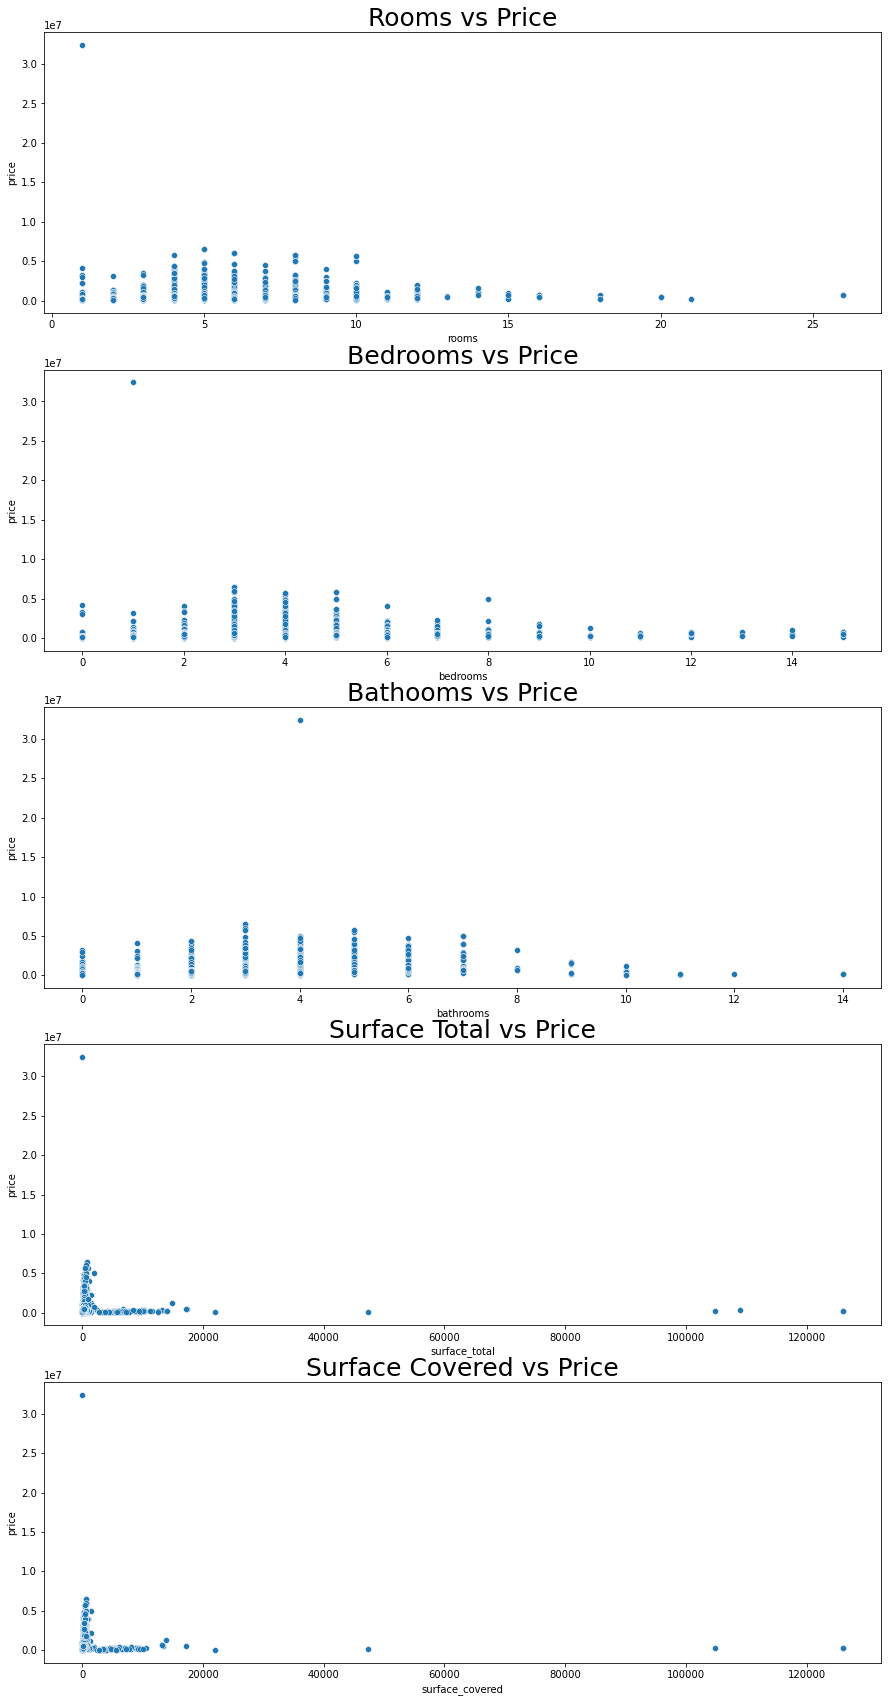

In [ ]:
plt.figure(figsize = (15,30))
plt.subplot(5,1,1)
sns.scatterplot(data=properati, y='price', x='rooms') 
plt.gca().set_title('Rooms vs Price', fontsize=25)
plt.subplot(5,1,2)
sns.scatterplot(data=properati, y='price', x='bedrooms') 
plt.gca().set_title('Bedrooms vs Price', fontsize=25)
plt.subplot(5,1,3)
sns.scatterplot(data=properati, y='price', x='bathrooms') 
plt.gca().set_title('Bathooms vs Price', fontsize=25)
plt.subplot(5,1,4)
sns.scatterplot(data=properati, y='price', x='surface_total') 
plt.gca().set_title('Surface Total vs Price', fontsize=25)
plt.subplot(5,1,5)
sns.scatterplot(data=properati, y='price', x='surface_covered') 
plt.gca().set_title('Surface Covered vs Price', fontsize=25)

Puedo concluir que en todos los casos puedo notar un outlier cuando price tiene un valor mas elevado que 3x1e7 por lo que procedeer a eliminarlo.

In [ ]:
properati=properati[(properati.price <30000000)]

Text(0.5, 1.0, 'Surface Covered vs Price')

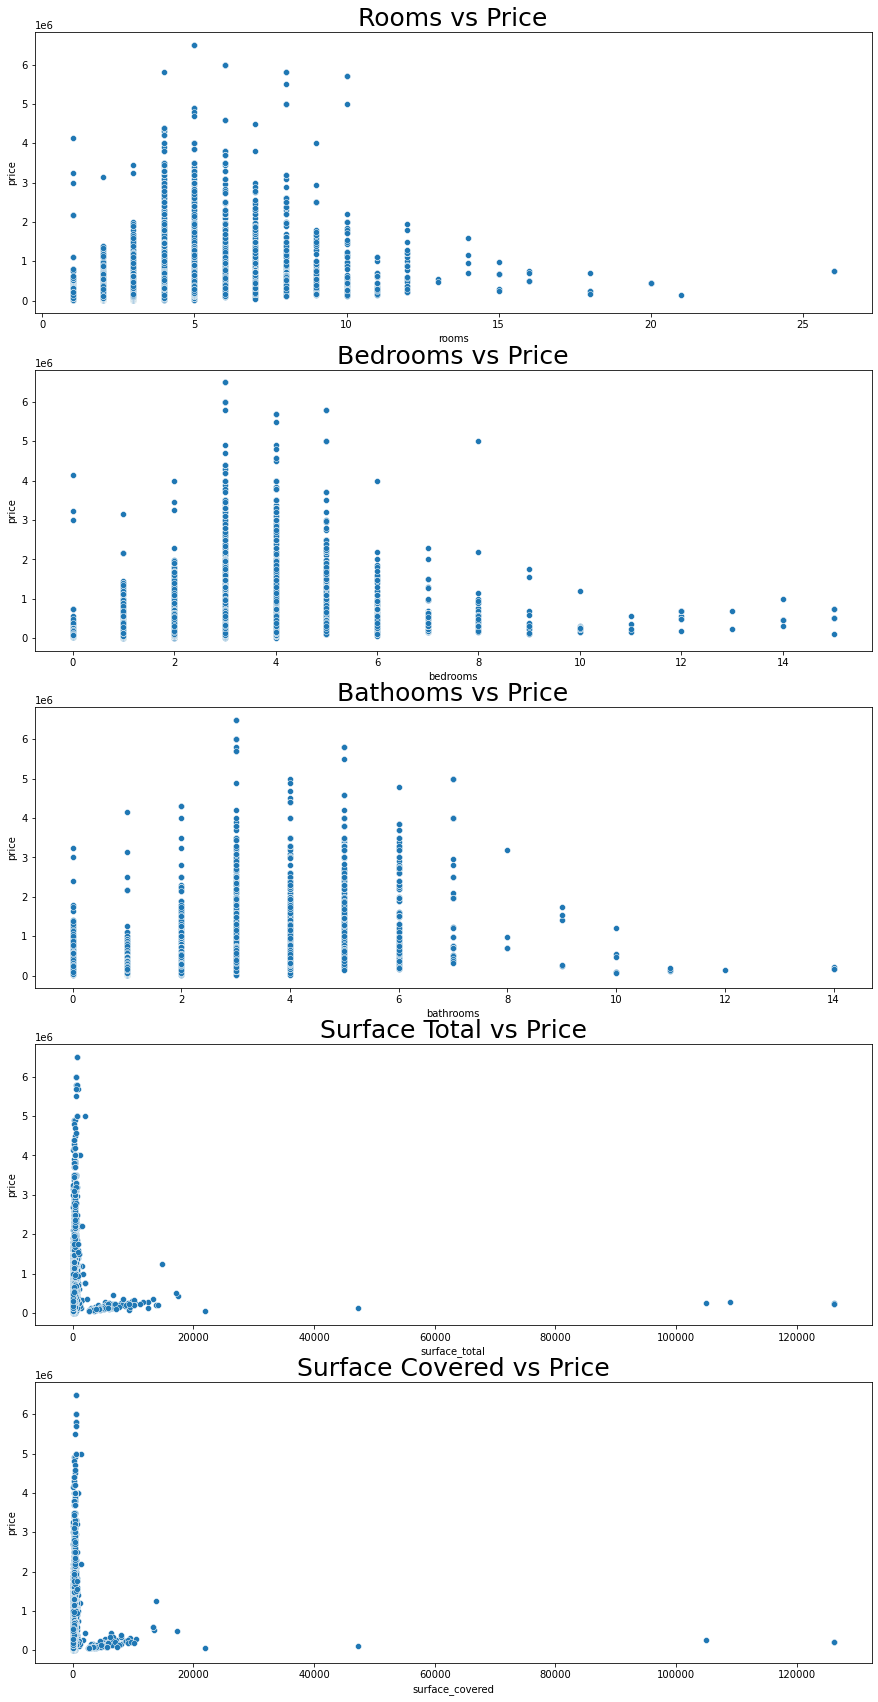

In [ ]:
plt.figure(figsize = (15,30))
plt.subplot(5,1,1)
sns.scatterplot(data=properati, y='price', x='rooms') 
plt.gca().set_title('Rooms vs Price', fontsize=25)
plt.subplot(5,1,2)
sns.scatterplot(data=properati, y='price', x='bedrooms') 
plt.gca().set_title('Bedrooms vs Price', fontsize=25)
plt.subplot(5,1,3)
sns.scatterplot(data=properati, y='price', x='bathrooms') 
plt.gca().set_title('Bathooms vs Price', fontsize=25)
plt.subplot(5,1,4)
sns.scatterplot(data=properati, y='price', x='surface_total') 
plt.gca().set_title('Surface Total vs Price', fontsize=25)
plt.subplot(5,1,5)
sns.scatterplot(data=properati, y='price', x='surface_covered') 
plt.gca().set_title('Surface Covered vs Price', fontsize=25)

Ahora se puede observar de una manera mas clara los graficas.

Podemos notar valorees alejados en surface_total y surface_covered, por lo que vamos a realizar un analisis con mayor profundidad a los outliers de estas variables.

#### Analisis univariado


Text(0.5, 1.0, 'bedrooms antes de limpiar los outliers')

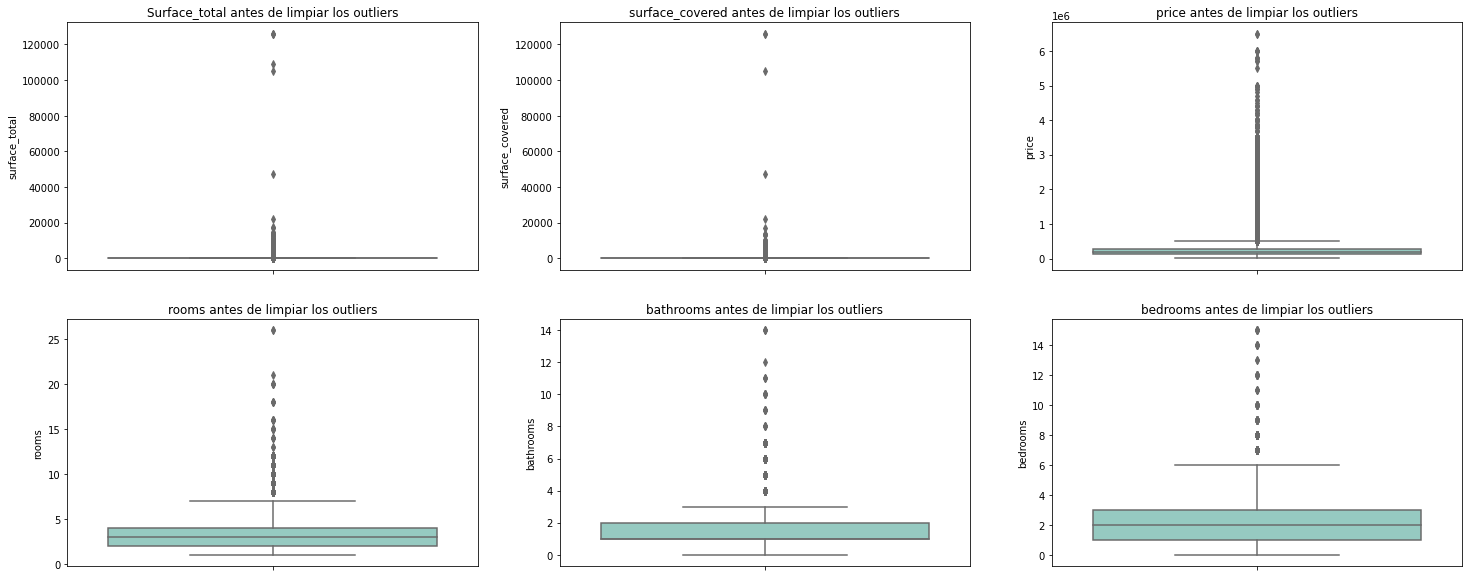

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(25,10))

#Boxplots relacionados con el tipo de propiedad
sns.boxplot(y="surface_total",data=properati, palette="Set3", ax=axs[0][0]).set_title('Surface_total antes de limpiar los outliers')
sns.boxplot(y="surface_covered",data=properati, palette="Set3", ax=axs[0][1]).set_title('surface_covered antes de limpiar los outliers')
sns.boxplot(y="price",data=properati, palette="Set3", ax=axs[0][2]).set_title('price antes de limpiar los outliers')
sns.boxplot(y="rooms",data=properati, palette="Set3", ax=axs[1][0]).set_title('rooms antes de limpiar los outliers')
sns.boxplot(y="bathrooms",data=properati, palette="Set3", ax=axs[1][1]).set_title('bathrooms antes de limpiar los outliers')
sns.boxplot(y="bedrooms",data=properati, palette="Set3", ax=axs[1][2]).set_title('bedrooms antes de limpiar los outliers')

Text(0.5, 1.0, 'bedrooms antes de limpiar los outliers')

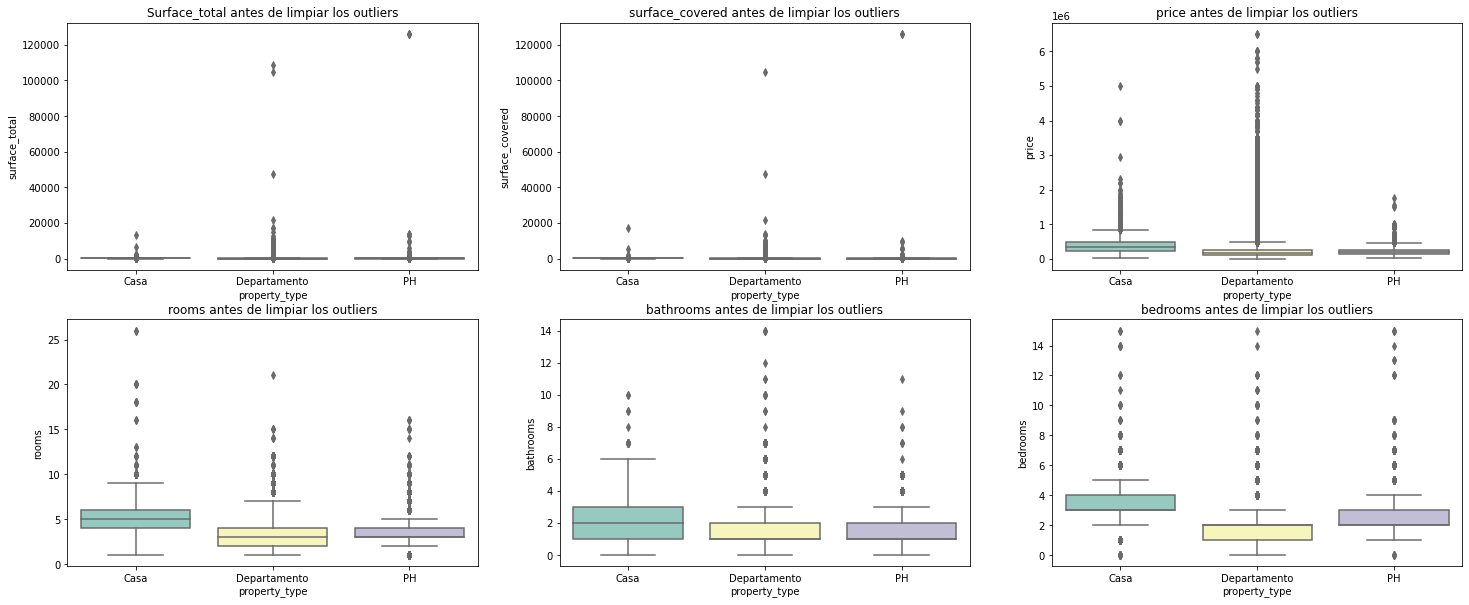

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(25,10))

#Boxplots relacionados con el tipo de propiedad
sns.boxplot(x="property_type", y="surface_total",data=properati, palette="Set3", ax=axs[0][0]).set_title('Surface_total antes de limpiar los outliers')
sns.boxplot(x="property_type", y="surface_covered",data=properati, palette="Set3", ax=axs[0][1]).set_title('surface_covered antes de limpiar los outliers')
sns.boxplot(x="property_type", y="price",data=properati, palette="Set3", ax=axs[0][2]).set_title('price antes de limpiar los outliers')
sns.boxplot(x="property_type",y="rooms",data=properati, palette="Set3", ax=axs[1][0]).set_title('rooms antes de limpiar los outliers')
sns.boxplot(x="property_type",y="bathrooms",data=properati, palette="Set3", ax=axs[1][1]).set_title('bathrooms antes de limpiar los outliers')
sns.boxplot(x="property_type",y="bedrooms",data=properati, palette="Set3", ax=axs[1][2]).set_title('bedrooms antes de limpiar los outliers')

Procedere a eliminar los outliers de la variable price bajo el criterio de las 3 sigmas y veremos como quedan nuestro graficos de caja.

In [ ]:
sigma = properati.price.std()
sigma

304204.0700372042

In [ ]:
properati=properati[(properati.price <= (sigma * 3))]

Text(0.5, 1.0, 'bedrooms luego de limpiar los outliers de price')

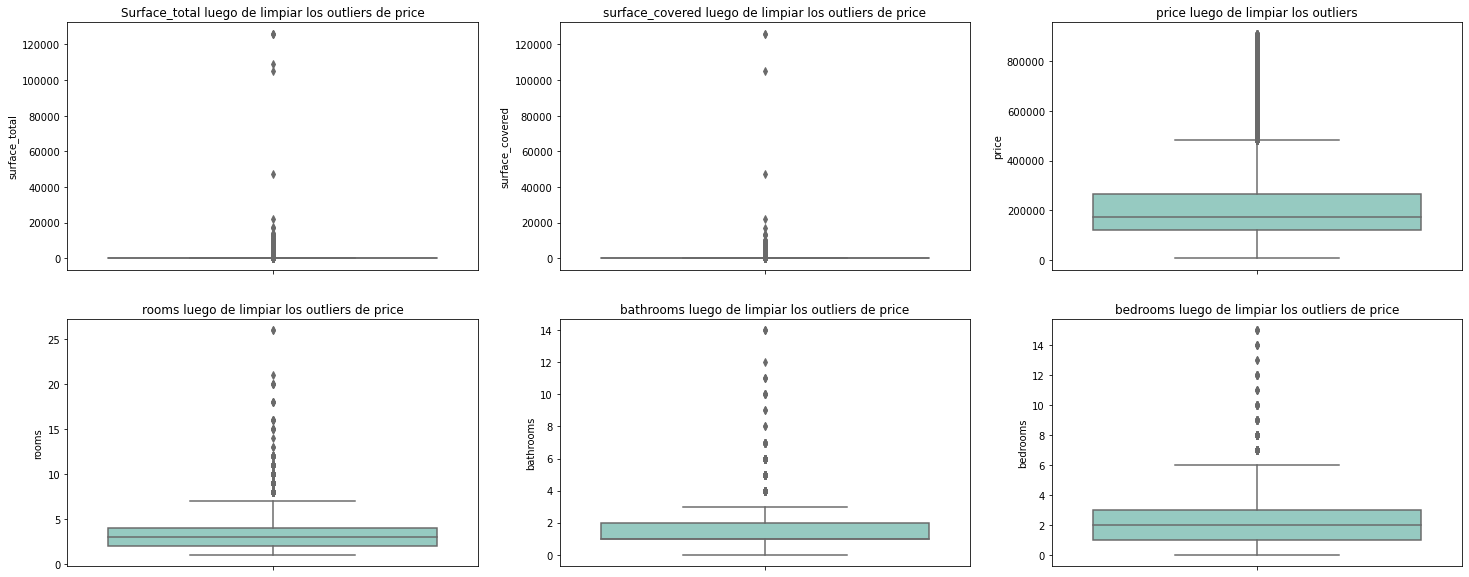

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(25,10))

#Boxplots relacionados con el tipo de propiedad
sns.boxplot(y="surface_total",data=properati, palette="Set3", ax=axs[0][0]).set_title('Surface_total luego de limpiar los outliers de price')
sns.boxplot(y="surface_covered",data=properati, palette="Set3", ax=axs[0][1]).set_title('surface_covered luego de limpiar los outliers de price')
sns.boxplot(y="price",data=properati, palette="Set3", ax=axs[0][2]).set_title('price luego de limpiar los outliers')
sns.boxplot(y="rooms",data=properati, palette="Set3", ax=axs[1][0]).set_title('rooms luego de limpiar los outliers de price')
sns.boxplot(y="bathrooms",data=properati, palette="Set3", ax=axs[1][1]).set_title('bathrooms luego de limpiar los outliers de price')
sns.boxplot(y="bedrooms",data=properati, palette="Set3", ax=axs[1][2]).set_title('bedrooms luego de limpiar los outliers de price')

Text(0.5, 1.0, 'bedrooms luego de limpiar los outliers de price')

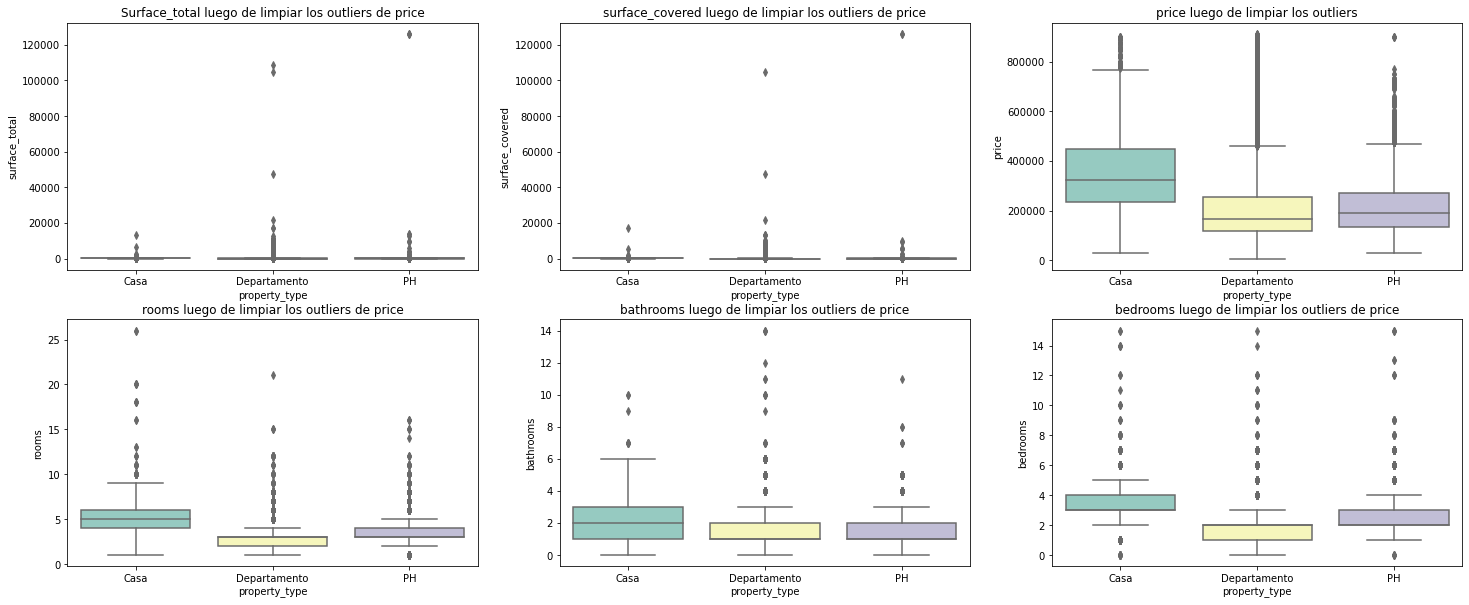

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(25,10))

#Boxplots relacionados con el tipo de propiedad
sns.boxplot(x="property_type", y="surface_total",data=properati, palette="Set3", ax=axs[0][0]).set_title('Surface_total luego de limpiar los outliers de price')
sns.boxplot(x="property_type", y="surface_covered",data=properati, palette="Set3", ax=axs[0][1]).set_title('surface_covered luego de limpiar los outliers de price')
sns.boxplot(x="property_type", y="price",data=properati, palette="Set3", ax=axs[0][2]).set_title('price luego de limpiar los outliers')
sns.boxplot(x="property_type",y="rooms",data=properati, palette="Set3", ax=axs[1][0]).set_title('rooms luego de limpiar los outliers de price')
sns.boxplot(x="property_type",y="bathrooms",data=properati, palette="Set3", ax=axs[1][1]).set_title('bathrooms luego de limpiar los outliers de price')
sns.boxplot(x="property_type",y="bedrooms",data=properati, palette="Set3", ax=axs[1][2]).set_title('bedrooms luego de limpiar los outliers de price')

Luego de estee tratamiento podemos notar lo siguiente:

* La mayor cantidad de outliers se encuentran en la tipo de propiedad "Departamento"
* Los outliers en surface_total y surface_covered no se alteraron luego de eliminar los outliers de price

Vamos a analizar mas a fondo los outliers de las superficies.

Text(0.5, 1.0, 'Surface Covered vs Price')

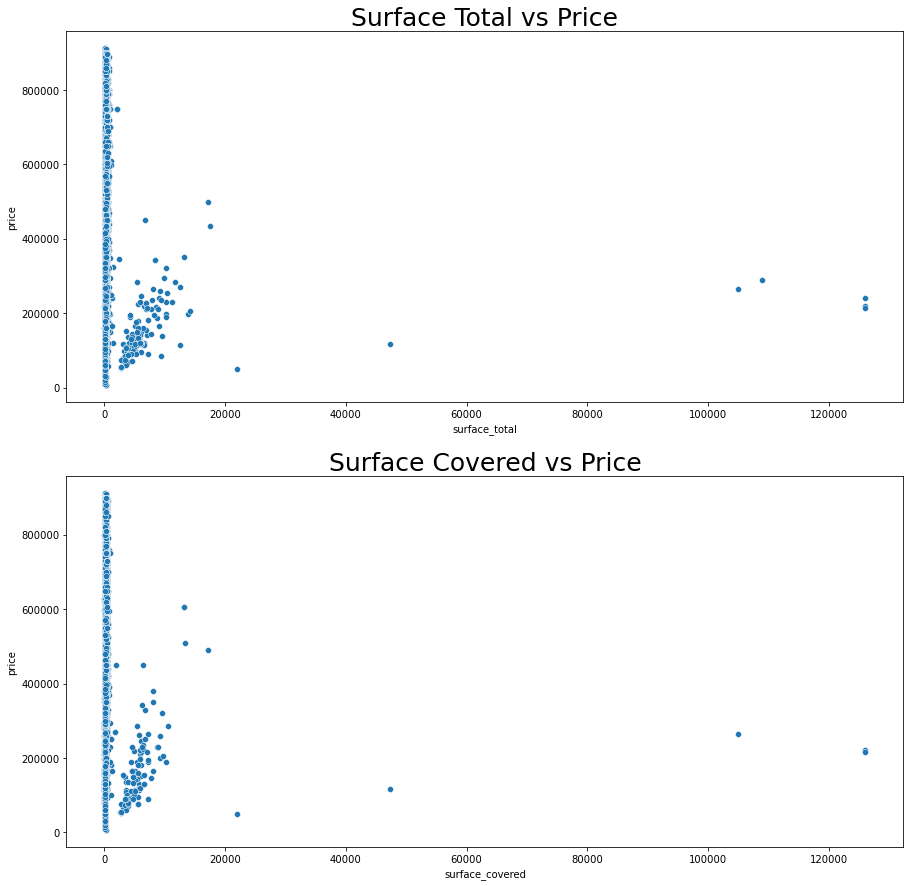

In [ ]:
plt.figure(figsize = (15,15))
plt.subplot(2,1,1)
sns.scatterplot(data=properati, y='price', x='surface_total') 
plt.gca().set_title('Surface Total vs Price', fontsize=25)
plt.subplot(2,1,2)
sns.scatterplot(data=properati, y='price', x='surface_covered') 
plt.gca().set_title('Surface Covered vs Price', fontsize=25)

Consideramos que los valores para superficies mayores a 20000 no concuerdan con el valor de precio que deberian tener en la vida real. Por lo que los eliminaremos.

In [ ]:
properati=properati[(properati.surface_total <20000)]
properati=properati[(properati.surface_covered <20000)]

Text(0.5, 1.0, 'Surface Covered vs Price')

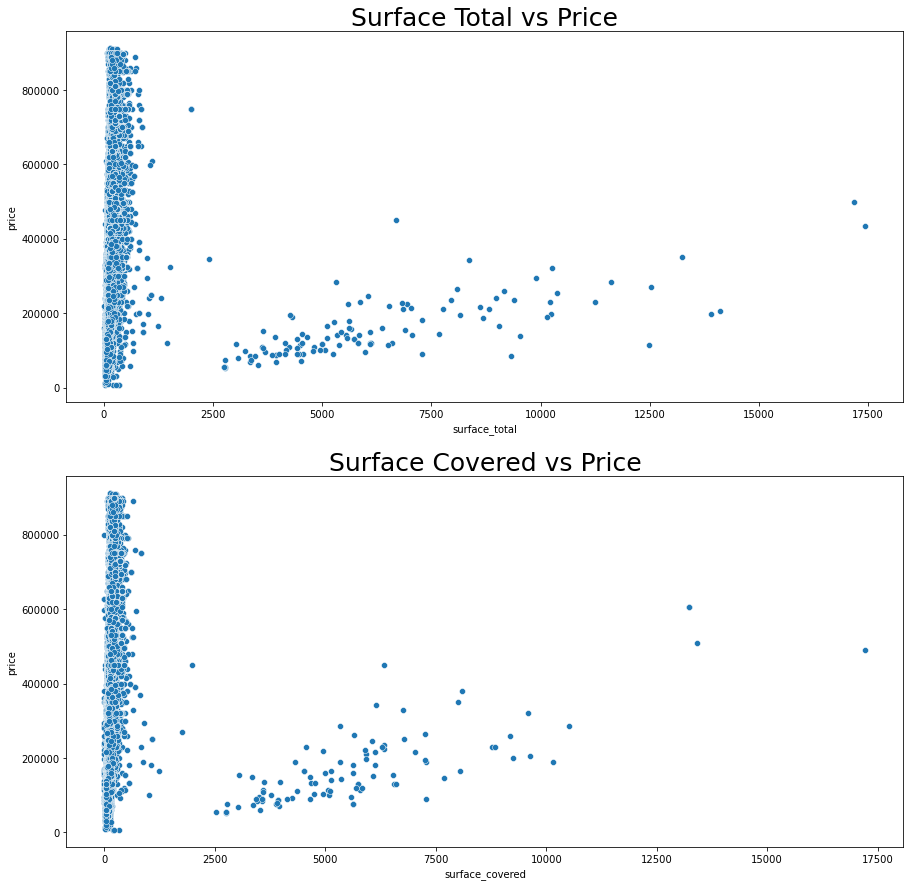

In [ ]:
plt.figure(figsize = (15,15))
plt.subplot(2,1,1)
sns.scatterplot(data=properati, y='price', x='surface_total') 
plt.gca().set_title('Surface Total vs Price', fontsize=25)
plt.subplot(2,1,2)
sns.scatterplot(data=properati, y='price', x='surface_covered') 
plt.gca().set_title('Surface Covered vs Price', fontsize=25)

Podemos notar una leve correlacion entre las variables de superficie (tanto cubierta como total) con la variable precio cuando la superficie es mayor a 1000.

Tambien luego de estudiar el negocio inmobiliaro, averigumos que los inmuebles con un tamaño menor a 12 mts cuadrados no son consideradas adecuadas para vivir por lo que los eliminaremos.

Text(0.5, 1.0, 'Correlacion de superficies')

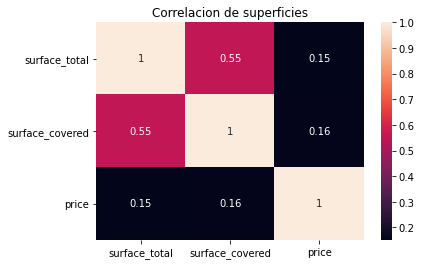

In [ ]:
sns.heatmap(properati.iloc[:,[4,5,6]].corr(), annot = True,  cbar_kws= {'orientation': 'vertical'}).set_title('Correlacion de superficies')

In [ ]:
properati = properati[(properati.surface_covered > 12)]

#La superficie topotoal noo debe ser mayor a la cubierta
properati = properati[(properati.surface_total >= properati.surface_covered)]

properati_surface_mayor = properati[(properati.surface_total > 1000)]
properati_surface_menor = properati[(properati.surface_total <= 1000)]

#La superficie cubierta noo debe ser mayor a la total
properati_surface_mayor = properati_surface_mayor[(properati_surface_mayor.surface_covered <= properati_surface_mayor.surface_total)]
properati_surface_menor = properati_surface_menor[(properati_surface_menor.surface_covered <= properati_surface_menor.surface_total)]

Text(0.5, 1.0, 'Surface Covered vs Price (con supercies mayores a 1000)')

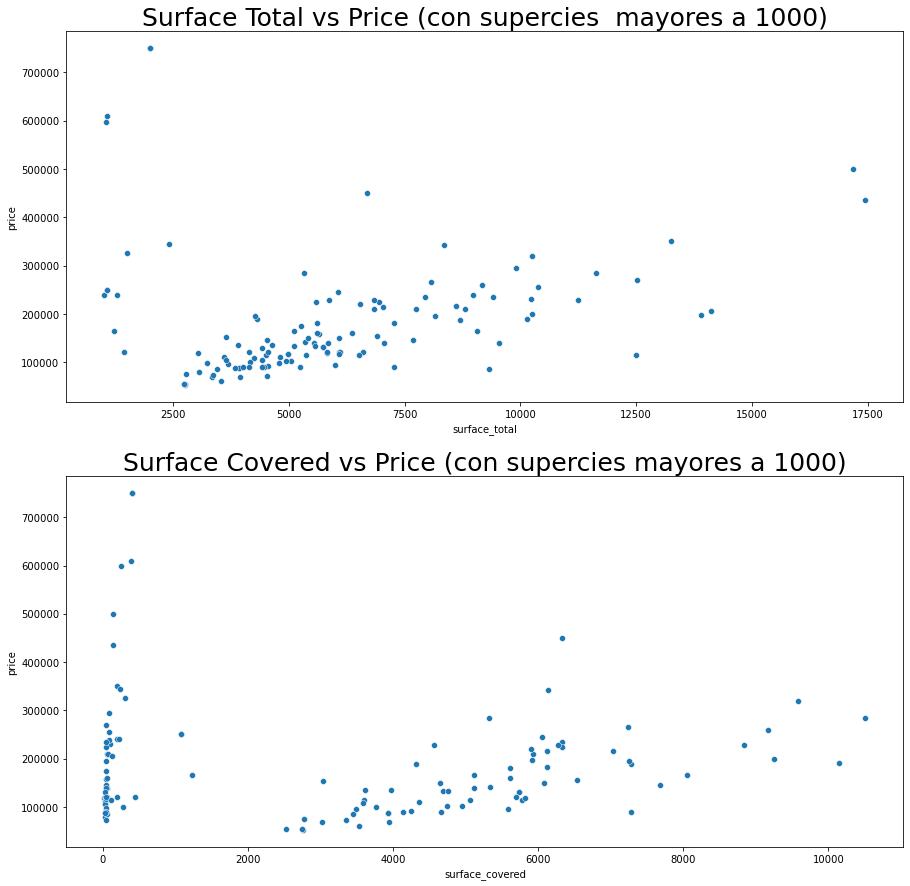

In [ ]:
plt.figure(figsize = (15,15))
plt.subplot(2,1,1)
sns.scatterplot(data=properati_surface_mayor, y='price', x='surface_total') 
plt.gca().set_title('Surface Total vs Price (con supercies  mayores a 1000)', fontsize=25)
plt.subplot(2,1,2)
sns.scatterplot(data=properati_surface_mayor, y='price', x='surface_covered') 
plt.gca().set_title('Surface Covered vs Price (con supercies mayores a 1000)', fontsize=25)

Text(0.5, 1.0, 'Correlacion de superficies mayores a 1000')

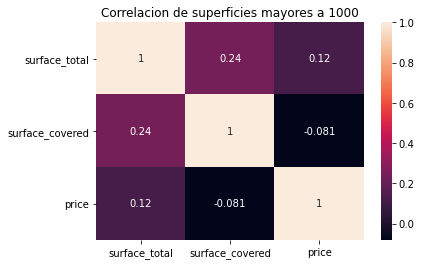

In [ ]:
sns.heatmap(properati_surface_mayor.iloc[:,[4,5,6]].corr(), annot = True,  cbar_kws= {'orientation': 'vertical'}).set_title('Correlacion de superficies mayores a 1000')

Se puede notar que en el caso de que la superfice total sea mayor a 2400 existe una correlacion considerable entre superficie total y precio, pero a su vez se la correlacion entre ambas supeerficies es muy baja y la correlacion eentre la superficie cubierta y precio tambien lo es.

Text(0.5, 1.0, 'Surface Covered vs Price (con supercies menores a 1000)')

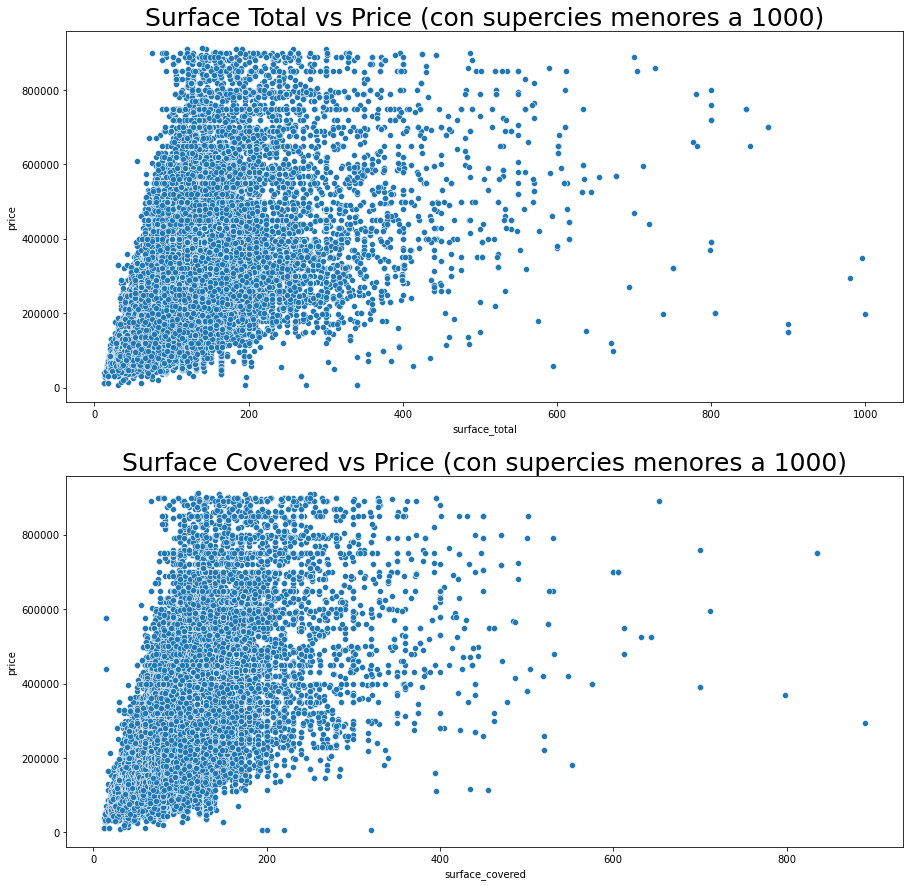

In [ ]:
plt.figure(figsize = (15,15))
plt.subplot(2,1,1)
sns.scatterplot(data=properati_surface_menor, y='price', x='surface_total') 
plt.gca().set_title('Surface Total vs Price (con supercies menores a 1000)', fontsize=25)
plt.subplot(2,1,2)
sns.scatterplot(data=properati_surface_menor, y='price', x='surface_covered') 
plt.gca().set_title('Surface Covered vs Price (con supercies menores a 1000)', fontsize=25)

Text(0.5, 1.0, 'Correlacion de superficies menores a 1000')

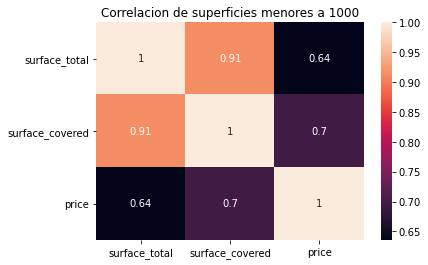

In [ ]:
sns.heatmap(properati_surface_menor.iloc[:,[4,5,6]].corr(), annot = True,  cbar_kws= {'orientation': 'vertical'}).set_title('Correlacion de superficies menores a 1000')

Se puede notar que en el caso de que la superfice total sea menor a 2400 existe una correlacion muy alta entre ambas superficies y una correlacion considerable entre cada una con precio, siendo mayor el valor obtenido en la correlacion entre superficie cubierta y precio.

Por lo tanto decidimos aplicar el filtro a la superficies totales para quedarnos con las instancias en que sean menores o igual a 1000.

In [ ]:
properati = properati_surface_menor

Text(0.5, 1.0, 'bedrooms lluego de filtrar pooor superficie cubierta menor o igual a 1000')

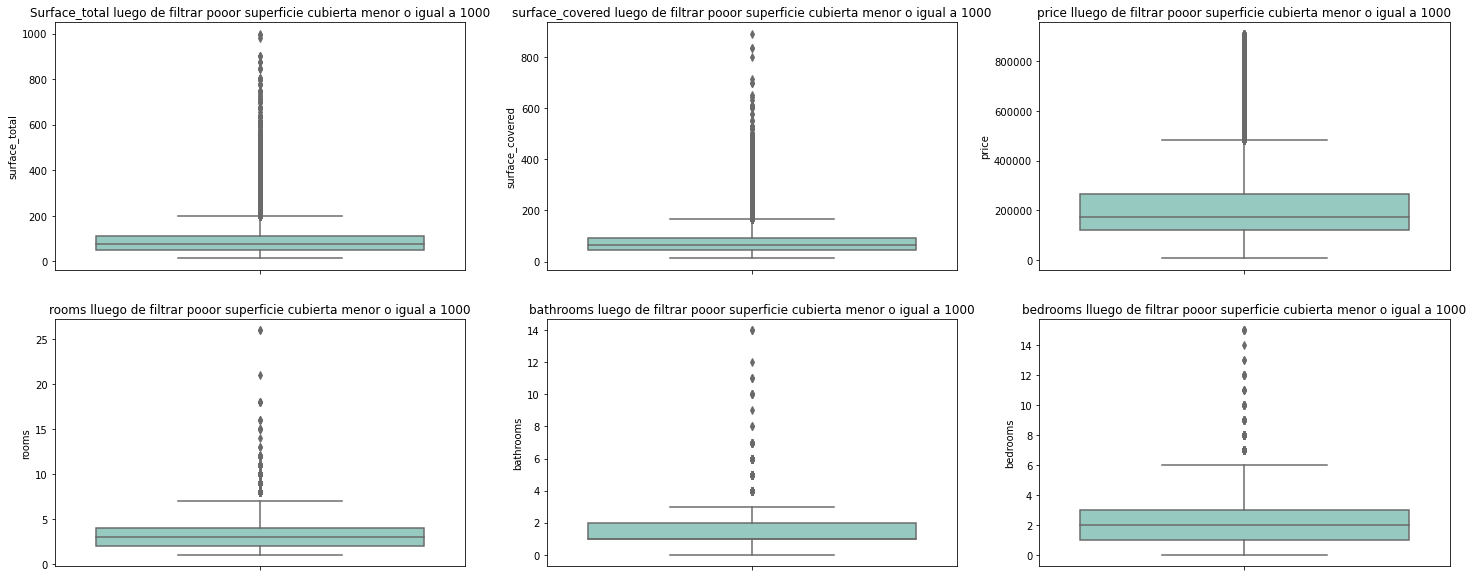

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(25,10))

#Boxplots relacionados con el tipo de propiedad
sns.boxplot(y="surface_total",data=properati, palette="Set3", ax=axs[0][0]).set_title('Surface_total luego de filtrar pooor superficie cubierta menor o igual a 1000')
sns.boxplot(y="surface_covered",data=properati, palette="Set3", ax=axs[0][1]).set_title('surface_covered luego de filtrar pooor superficie cubierta menor o igual a 1000')
sns.boxplot(y="price",data=properati, palette="Set3", ax=axs[0][2]).set_title('price lluego de filtrar pooor superficie cubierta menor o igual a 1000')
sns.boxplot(y="rooms",data=properati, palette="Set3", ax=axs[1][0]).set_title('rooms lluego de filtrar pooor superficie cubierta menor o igual a 1000')
sns.boxplot(y="bathrooms",data=properati, palette="Set3", ax=axs[1][1]).set_title('bathrooms luego de filtrar pooor superficie cubierta menor o igual a 1000')
sns.boxplot(y="bedrooms",data=properati, palette="Set3", ax=axs[1][2]).set_title('bedrooms lluego de filtrar pooor superficie cubierta menor o igual a 1000')

Text(0.5, 1.0, 'bedrooms lluego de filtrar pooor superficie cubierta menor o igual a 1000')

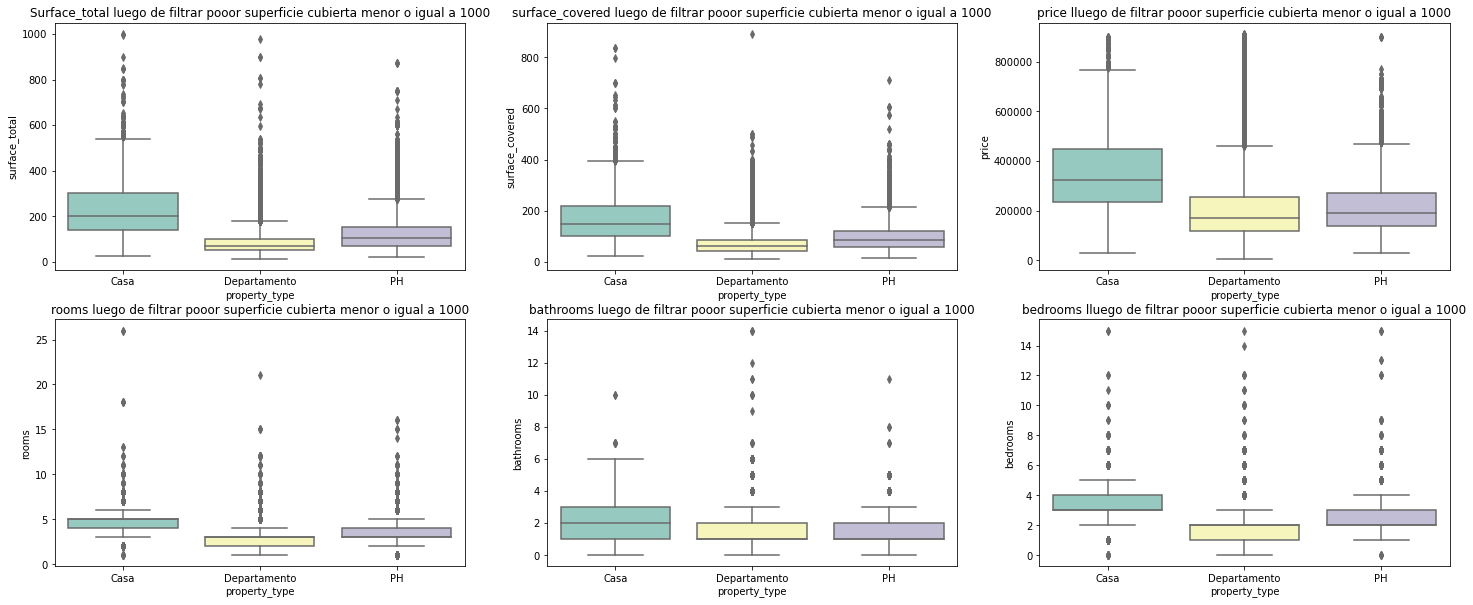

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=3,figsize=(25,10))

#Boxplots relacionados con el tipo de propiedad
sns.boxplot(x="property_type", y="surface_total",data=properati, palette="Set3", ax=axs[0][0]).set_title('Surface_total luego de filtrar pooor superficie cubierta menor o igual a 1000')
sns.boxplot(x="property_type", y="surface_covered",data=properati, palette="Set3", ax=axs[0][1]).set_title('surface_covered luego de filtrar pooor superficie cubierta menor o igual a 1000')
sns.boxplot(x="property_type", y="price",data=properati, palette="Set3", ax=axs[0][2]).set_title('price lluego de filtrar pooor superficie cubierta menor o igual a 1000')
sns.boxplot(x="property_type",y="rooms",data=properati, palette="Set3", ax=axs[1][0]).set_title('rooms luego de filtrar pooor superficie cubierta menor o igual a 1000')
sns.boxplot(x="property_type",y="bathrooms",data=properati, palette="Set3", ax=axs[1][1]).set_title('bathrooms luego de filtrar pooor superficie cubierta menor o igual a 1000')
sns.boxplot(x="property_type",y="bedrooms",data=properati, palette="Set3", ax=axs[1][2]).set_title('bedrooms lluego de filtrar pooor superficie cubierta menor o igual a 1000')

Luego del filtrado se observa de mejor manera los diagramas de caja.

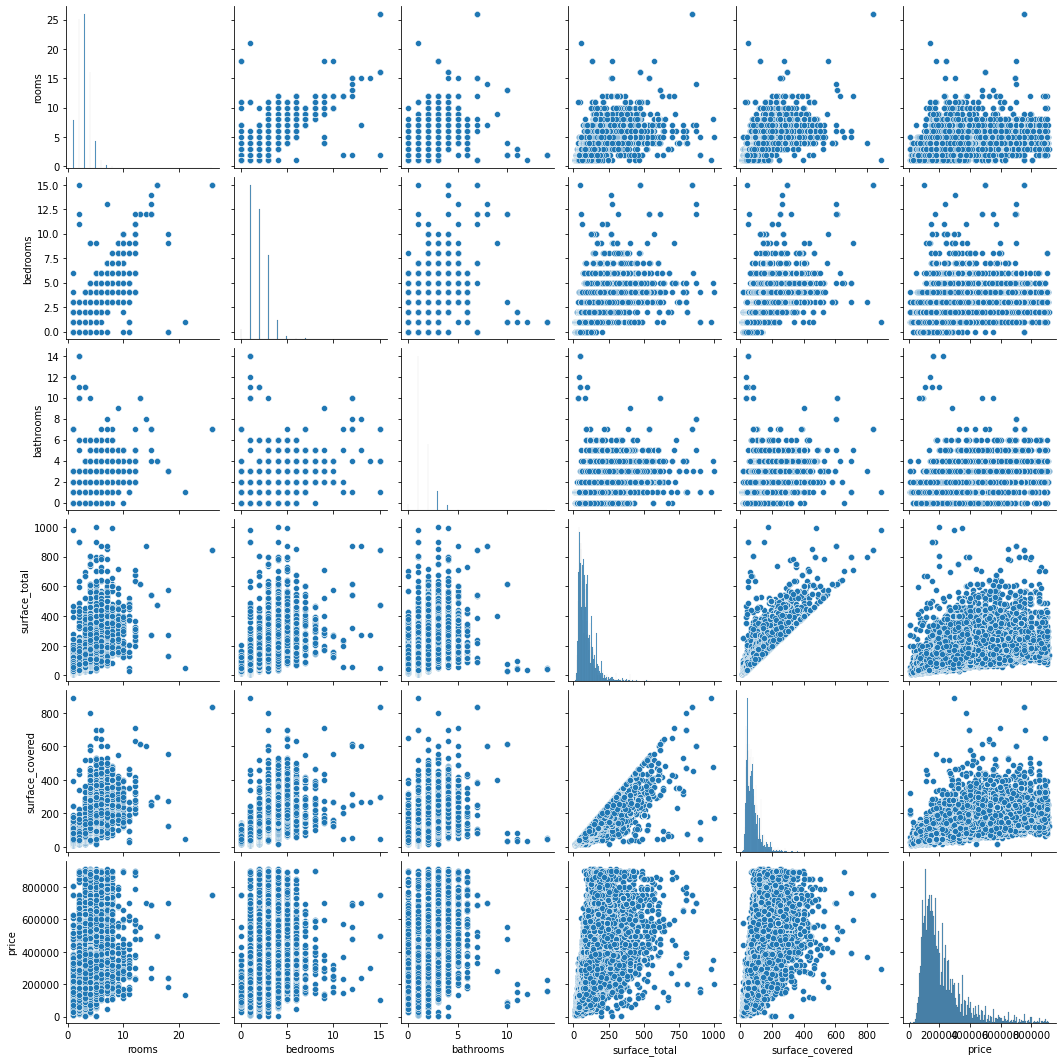

In [ ]:
sns.pairplot(properati)

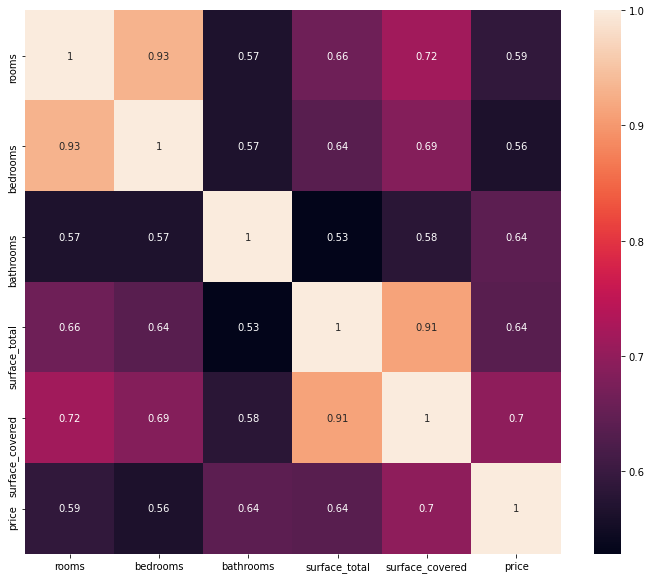

In [ ]:
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(properati.iloc[:,[1,2,3,4,5,6]].corr(), annot = True,  cbar_kws= {'orientation': 'vertical'})

Se puede notar claramente que todas las correlaciones aumentaron.

### Construcción de datos

#### Generacion de variables Dummies

Decidimos codificar las variables de tipo de propiedad con un one-hot encoding puesto que consideramos que nos seran utiles mas adelante.

In [ ]:
dummies_property_type = pd.get_dummies(properati.property_type)
print(dummies_property_type.head())

     Casa  Departamento  PH
336     1             0   0
384     1             0   0
385     1             0   0
454     1             0   0
625     1             0   0


In [ ]:
dummies_property_type.shape

(87346, 3)

In [ ]:
properati = pd.concat([properati,dummies_property_type],axis=1)
properati.head(5)

l3  rooms  bedrooms  bathrooms  surface_total  \
336      San Cristobal    3.0       1.0        2.0          116.0   
384          Mataderos    3.0       2.0        1.0          171.0   
385   Villa Pueyrredón    3.0       2.0        1.0           71.0   
454  Parque Avellaneda    6.0       5.0        1.0          210.0   
625           Saavedra    2.0       1.0        1.0          151.0   

     surface_covered     price property_type  Casa  Departamento  PH  
336            116.0  290000.0          Casa     1             0   0  
384            120.0  179900.0          Casa     1             0   0  
385             68.0  174000.0          Casa     1             0   0  
454            189.0  225000.0          Casa     1             0   0  
625            108.0  300000.0          Casa     1             0   0

#### Escalamos los datos

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
properati_escalados_1 = properati.copy()
properati_escalados_2 = properati.copy()
properati_escalados_1[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']] = scaler.fit_transform(properati_escalados_1[['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']])
properati_escalados_2[['surface_total','surface_covered','price']] = scaler.fit_transform(properati_escalados_2[['surface_total','surface_covered','price']])
properati_escalados_1.head()

l3  rooms  bedrooms  bathrooms  surface_total  \
336      San Cristobal   0.08  0.066667   0.142857       0.104357   
384          Mataderos   0.08  0.133333   0.071429       0.160081   
385   Villa Pueyrredón   0.08  0.133333   0.071429       0.058764   
454  Parque Avellaneda   0.20  0.333333   0.071429       0.199595   
625           Saavedra   0.04  0.066667   0.071429       0.139818   

     surface_covered     price property_type  Casa  Departamento  PH  
336         0.117312  0.313483          Casa     1             0   0  
384         0.121868  0.191953          Casa     1             0   0  
385         0.062642  0.185441          Casa     1             0   0  
454         0.200456  0.241735          Casa     1             0   0  
625         0.108200  0.324521          Casa     1             0   0

In [ ]:
properati_escalados_2.head()

l3  rooms  bedrooms  bathrooms  surface_total  \
336      San Cristobal    3.0       1.0        2.0       0.104357   
384          Mataderos    3.0       2.0        1.0       0.160081   
385   Villa Pueyrredón    3.0       2.0        1.0       0.058764   
454  Parque Avellaneda    6.0       5.0        1.0       0.199595   
625           Saavedra    2.0       1.0        1.0       0.139818   

     surface_covered     price property_type  Casa  Departamento  PH  
336         0.117312  0.313483          Casa     1             0   0  
384         0.121868  0.191953          Casa     1             0   0  
385         0.062642  0.185441          Casa     1             0   0  
454         0.200456  0.241735          Casa     1             0   0  
625         0.108200  0.324521          Casa     1             0   0

Realizo 2 escalados con el criterio de min/max scaler. Uno sin escalar las variables rooms, bedrooms y bathrooms y otro si.

In [ ]:
properati_escalados_1.shape

(87346, 11)

Por lo tanto en este momento cuento con un dataset de 87346 filas y 11 columnas.

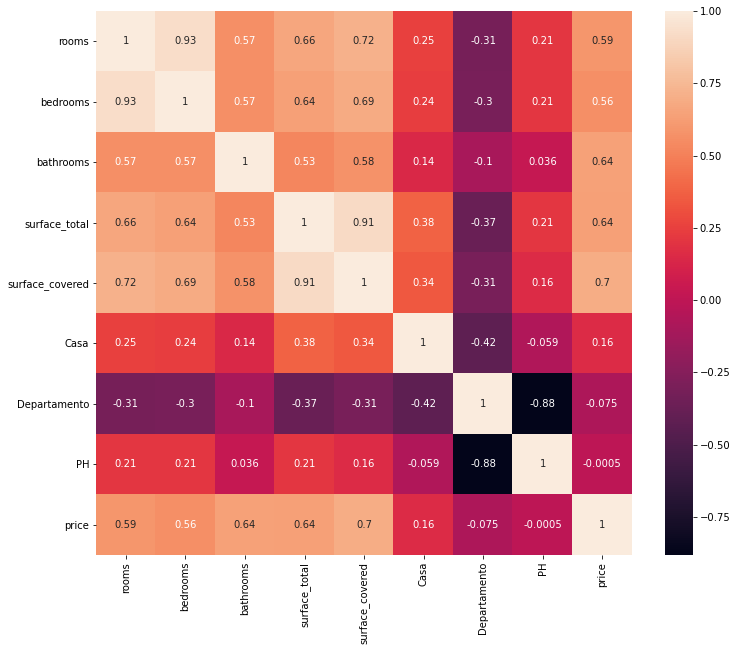

In [ ]:
fig, ax = plt.subplots(figsize=(12,10)) 
sns.heatmap(properati_escalados_1.iloc[:,[1,2,3,4,5,8,9,10,6]].corr(), annot = True,  cbar_kws= {'orientation': 'vertical'})

Realizando el heatmap con todas las variables numericas del dataset podemos afirmar que las variables bathrooms y surface_covered son las que tiene mayor correlacion con la variable price. 

Las variables dummies de casa, departamento y PH son las que peor correlacion tienen con respecto a la variable price. Esto nos podria estar indicando que el tipo de propiedad no es tan influyente a la hora de definir el precio  de esta. 

## 4.a- Modelado 

### Datos proyecto 1

Aqui importaremos de nuevo el dataset y aplicaremos los filtros realizados en el proyecto 1 y luego realizaremos el mismo modelo con los mismos parametros e hiperparametros para compararlo con los modelos nuevos.

In [ ]:
data = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv",sep=",",decimal=",")
data_CF = data[(data.l2=='Capital Federal')]
data_CFD = data_CF[(data.property_type=='Departamento')]
data_CFC = data_CF[(data.property_type=='Casa')]
data_CFPH = data_CF[(data.property_type=='PH')]

data_CFT = data_CFC
data_CFT = data_CFT.append(data_CFD)
data_CFT = data_CFT.append(data_CFPH)

properati_1 = data_CFT

properati_1['lat']=properati_1['lat'].apply(pd.to_numeric)
properati_1['lon']=properati_1['lon'].apply(pd.to_numeric)
properati_1['rooms']=properati_1['rooms'].apply(pd.to_numeric)
properati_1['bedrooms']=properati_1['bedrooms'].apply(pd.to_numeric)
properati_1['bathrooms']=properati_1['bathrooms'].apply(pd.to_numeric)
properati_1['surface_total']=properati_1['surface_total'].apply(pd.to_numeric)
properati_1['surface_covered']=properati_1['surface_covered'].apply(pd.to_numeric)
properati_1['price']=properati_1['price'].apply(pd.to_numeric)

#properati_1
#Aplicado de filtrado
properati_1=properati_1[(properati_1.surface_total <1000)]
properati_1=properati_1[(properati_1.surface_total >15)]
properati_1=properati_1[(properati_1.surface_covered <= properati_1.surface_total)]
properati_1=properati_1[(properati_1.price <4000000)]
properati_1.shape
data_final = properati_1.iloc[:,[8,9,10,11,12,13]]
data_final.shape
data_final=data_final.dropna()
properati_proyecto1=data_final
print(properati_proyecto1.shape)
properati_proyecto1.head(1)

<ipython-input-95-a685a2ba4101>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_CFD = data_CF[(data.property_type=='Departamento')]
<ipython-input-95-a685a2ba4101>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_CFC = data_CF[(data.property_type=='Casa')]
<ipython-input-95-a685a2ba4101>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_CFPH = data_CF[(data.property_type=='PH')]


(80254, 6)


rooms  bedrooms  bathrooms  surface_total  surface_covered     price
336    3.0       1.0        2.0          116.0            116.0  290000.0

Obtuve el mismo dataset que en el proyecto 1, con misma cantidad de filas y columnas.

#### Partición de datos - Entrenamiento y pruebas

In [ ]:
# Estas particiones son para la comparación de los resultados obtenidos en el proyecto 1. Adicionalmente, la segunda partición nos servirá para entrenar los diferentes modelos avanzados
from sklearn.model_selection import train_test_split

X_proyecto1=properati_proyecto1.iloc[:,[0,1,2,3,4]]
y_proyecto1=properati_proyecto1.price.values
X_train_proyecto1, X_test_proyecto1, y_train_proyecto1, y_test_proyecto1 = train_test_split(X_proyecto1, y_proyecto1, test_size=0.30, random_state=42)

# Proyecto 2
X_proyecto2=properati_escalados_1.iloc[:,[1,2,3,4,5,8,9,10]]
y_proyecto2=properati_escalados_1.price.values
X_train_proyecto2, X_test_proyecto2, y_train_proyecto2, y_test_proyecto2 = train_test_split(X_proyecto2, y_proyecto2, test_size=0.30, random_state=42)

Realizo la particion de los datos para predecir la variable price utilizando rooms, bedrooms, bathrooms, surrface_total y surface_covered. Y en el caso de los datos del proyecto 2, agrego tambien las variables dummies de casa, departamento y PH.

In [ ]:
def graficas_cross_validation (grid_params,gs):  
    df = pd.DataFrame(gs.cv_results_)
    results = ['mean_test_score',
               'mean_train_score',
               'std_test_score', 
               'std_train_score']

    def pooled_var(stds):
        # https://en.wikipedia.org/wiki/Pooled_variance#Pooled_standard_deviation
        n = 5 # size of each group
        return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))

    fig, axes = plt.subplots(1, len(grid_params), 
                             figsize = (5*len(grid_params), 7),
                             sharey='row')
    axes[0].set_ylabel("Score", fontsize=25)


    for idx, (param_name, param_range) in enumerate(grid_params.items()):
        grouped_df = df.groupby(f'param_{param_name}')[results]\
            .agg({'mean_train_score': 'mean',
                  'mean_test_score': 'mean',
                  'std_train_score': pooled_var,
                  'std_test_score': pooled_var})

        previous_group = df.groupby(f'param_{param_name}')[results]
        axes[idx].set_xlabel(param_name, fontsize=30)
        axes[idx].set_ylim(0.0, 1.1)
        lw = 2
        axes[idx].plot(param_range, grouped_df['mean_train_score'],'o-', label="Training score",
                    color="darkorange", lw=lw)
        axes[idx].fill_between(param_range,grouped_df['mean_train_score'] - grouped_df['std_train_score'],
                        grouped_df['mean_train_score'] + grouped_df['std_train_score'], alpha=0.2,
                        color="darkorange", lw=lw)
        axes[idx].plot(param_range, grouped_df['mean_test_score'],'o-', label="Cross-validation score",
                    color="navy", lw=lw)
        axes[idx].fill_between(param_range, grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                        grouped_df['mean_test_score'] + grouped_df['std_test_score'], alpha=0.2,
                        color="navy", lw=lw)

    handles, labels = axes[0].get_legend_handles_labels()
    fig.suptitle('Validation curves', fontsize=40)
    fig.legend(handles, labels, loc=8, ncol=2, fontsize=20)

    fig.subplots_adjust(bottom=0.25, top=0.85)  
    plt.show()


Realizo una funcion para graficar los resultados del gridsearch y analizar de mejor manera la variacion de hiperparametros.

Para cada modelado vamos a realizar los siguientes pasos y luego los analizaremos en conjunto:

* Construyo el modelo
* Defino las variables en hiperparametros para el gridsearch (en los casos que utilice gridsearch)
* Entreno el modelo
* Construyo una tabla con la precision de cada conjunto de hiperparametros
* Realizo un Bench Marking
* Obtengo el mejor modelo y su score y RMSE en train y test


---
#### Decision Tree - Datos Proyecto 1
---

In [ ]:
# Importamos la librería de árboles
from sklearn.tree import DecisionTreeRegressor

In [ ]:
arbol_proyecto1 = DecisionTreeRegressor(max_depth=8, random_state=42)

In [ ]:
arbol_proyecto1.fit(X_train_proyecto1,y_train_proyecto1)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [ ]:
score_train=arbol_proyecto1.score(X_train_proyecto1,y_train_proyecto1)
score_test=arbol_proyecto1.score(X_test_proyecto1,y_test_proyecto1)

# Predecir y evaluar sobre el set de entrenamiento
y_train_pred_proyecto1 = arbol_proyecto1.predict(X_train_proyecto1)
# Predecir y evaluar sobre el set de evaluación
y_test_pred_proyecto1 = arbol_proyecto1.predict(X_test_proyecto1)

rmse_train = np.sqrt(mean_squared_error(y_train_proyecto1, y_train_pred_proyecto1))
rmse_test = np.sqrt(mean_squared_error(y_test_proyecto1, y_test_pred_proyecto1))

print("El score en train es de: ",score_train)
print("El score en test es de: ",score_test)
print("\n")
print("El RMSE en train es de: ",rmse_train)
print("El RMSE en test es de: ",rmse_test)

El score en train es de:  0.7750151578792868
El score en test es de:  0.7456482546757568


El RMSE en train es de:  140807.27003962157
El RMSE en test es de:  147717.26123313134


Obtuvimos los mismos resultados que en el proyecto 1, estos los usaremos para comparar con los nuevos modelos.

---
#### Decision Tree - Datos Proyecto 1 con GridSearch
---

In [ ]:
# Importamos la librería de árboles
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, make_scorer
from sklearn.metrics import accuracy_score

In [ ]:
# PARAMETROS PARA AMBOS ARBOLES
#parametros_de_arbol_regresion = {"max_depth":[2,4,6,8]}
parametros_de_arbol_regresion = {"max_depth":[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
                                 "criterion":["mse", "friedman_mse"],
                                 "splitter": ["best","random"]}


In [ ]:
arbol_proyecto1 = DecisionTreeRegressor()

In [ ]:
gridsearch_arbol_proyecto1 = GridSearchCV(arbol_proyecto1, parametros_de_arbol_regresion, cv = 10, return_train_score=True)

In [ ]:
gridsearch_arbol_proyecto1.fit(X_train_proyecto1,y_train_proyecto1)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18],
                         'splitter': ['best', 'random']},
             return_train_score=True)

In [ ]:
pd.concat([pd.DataFrame(gridsearch_arbol_proyecto1.cv_results_["params"]),pd.DataFrame(gridsearch_arbol_proyecto1.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

criterion  max_depth splitter  Accuracy
0            mse          2     best  0.532387
1            mse          2   random  0.380295
2            mse          3     best  0.596661
3            mse          3   random  0.493330
4            mse          4     best  0.645711
..           ...        ...      ...       ...
63  friedman_mse         16   random  0.747696
64  friedman_mse         17     best  0.744785
65  friedman_mse         17   random  0.749234
66  friedman_mse         18     best  0.737540
67  friedman_mse         18   random  0.745433

[68 rows x 4 columns]

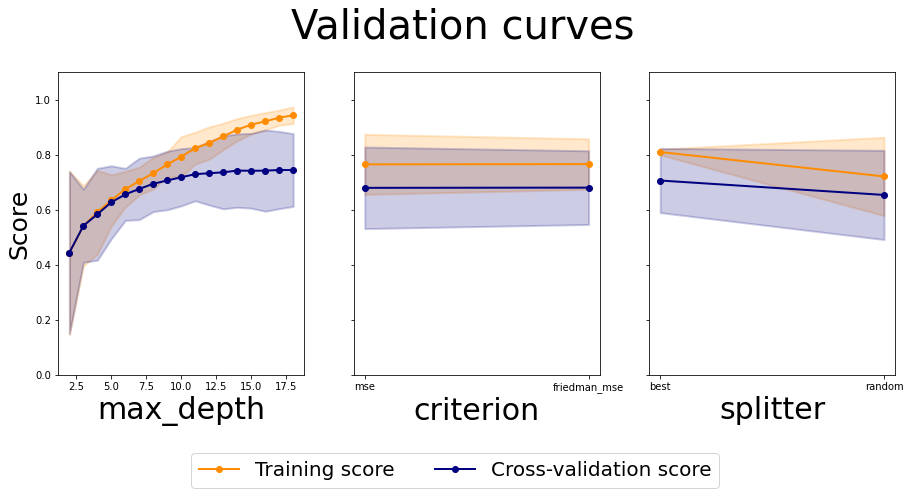

In [ ]:
graficas_cross_validation(parametros_de_arbol_regresion,gridsearch_arbol_proyecto1)

Analizamos cada hiperaparametro:
    
* Splitter: En el caso de best, se obtiene menos desviacion estandar y mayor score.
* Criterion: Mismo score en ambos casos pero con menor desviacion estandar con friedman_mse.
* Max_Depth: A pesar de que se evidencian unos resultados altos en testing con un numero de max_depth=18 , es importante evidenciar que para un max_depth=8 se obtiene una robustez en el modelo en la medida que la diferencia entre training y test es mas reducida.

In [ ]:
mejor_modelo_proyecto1 = gridsearch_arbol_proyecto1.best_estimator_
mejor_resultado_proyecto1 = gridsearch_arbol_proyecto1.best_score_
print("El mejor modelo es: ",mejor_modelo_proyecto1)
print("El mejor resultado es: ",mejor_resultado_proyecto1)

El mejor modelo es:  DecisionTreeRegressor(max_depth=18, splitter='random')
El mejor resultado es:  0.7548276285800223


In [ ]:
y_predicciones_entrenamiento_proyecto1 = mejor_modelo_proyecto1.predict(X_train_proyecto1)
y_predicciones_pruebas_proyecto1 = mejor_modelo_proyecto1.predict(X_test_proyecto1)

score_train_proyecto1=mejor_modelo_proyecto1.score(X_train_proyecto1,y_train_proyecto1)
score_test_proyecto1=mejor_modelo_proyecto1.score(X_test_proyecto1,y_test_proyecto1)

rmse_train_proyecto1 = np.sqrt(mean_squared_error(y_train_proyecto1, y_predicciones_entrenamiento_proyecto1))
rmse_test_proyecto1 = np.sqrt(mean_squared_error(y_test_proyecto1, y_predicciones_pruebas_proyecto1))

print("El score en train del mejor modelo es de: ",score_train_proyecto1)
print("El score en test del mejor modelo es de: ",score_test_proyecto1)
print("\n")
print("El RMSE del entrenamiento del mejor modelo es: ",rmse_train_proyecto1)
print("El RMSE de pruebas del mejor modelo es: ",rmse_test_proyecto1)

El score en train del mejor modelo es de:  0.919108157764826
El score en test del mejor modelo es de:  0.7839032115351685


El RMSE del entrenamiento del mejor modelo es:  84430.7820275372
El RMSE de pruebas del mejor modelo es:  136156.39442055294


Si bien me indican que el mejor modelo es con max_depth 18, un modelo mas estable seria el que se encuentra alrededor del 8 ya que se obtiene una robustez en el modelo en la medida que la diferencia entre training y test es mas reducida. 

Se lo modelara a continuacion:

In [ ]:
mejor_modelo_proyecto1 = DecisionTreeRegressor(max_depth=8, criterion='friedman_mse', splitter='best')
mejor_modelo_proyecto1.fit(X_train_proyecto1,y_train_proyecto1)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=8)

In [ ]:
y_predicciones_entrenamiento_proyecto1 = mejor_modelo_proyecto1.predict(X_train_proyecto1)
y_predicciones_pruebas_proyecto1 = mejor_modelo_proyecto1.predict(X_test_proyecto1)

score_train_proyecto1=mejor_modelo_proyecto1.score(X_train_proyecto1,y_train_proyecto1)
score_test_proyecto1=mejor_modelo_proyecto1.score(X_test_proyecto1,y_test_proyecto1)

rmse_train_proyecto1 = np.sqrt(mean_squared_error(y_train_proyecto1, y_predicciones_entrenamiento_proyecto1))
rmse_test_proyecto1 = np.sqrt(mean_squared_error(y_test_proyecto1, y_predicciones_pruebas_proyecto1))

print("El score en train del mejor modelo es de: ",score_train_proyecto1)
print("El score en test del mejor modelo es de: ",score_test_proyecto1)
print("\n")
print("El RMSE del entrenamiento del mejor modelo es: ",rmse_train_proyecto1)
print("El RMSE de pruebas del mejor modelo es: ",rmse_test_proyecto1)

El score en train del mejor modelo es de:  0.7750151578792868
El score en test del mejor modelo es de:  0.7445102535049443


El RMSE del entrenamiento del mejor modelo es:  140807.27003962157
El RMSE de pruebas del mejor modelo es:  148047.3450855631


Se obtuvo aproximandamente el mismo resultado que en el modelado sin gridsearch.

---
#### Decision Tree - Datos pre-procesados - Proyecto 2 sin GridSearch
---

In [ ]:
arbol_proyecto2 = DecisionTreeRegressor(max_depth=8, random_state=42)

In [ ]:
arbol_proyecto2.fit(X_train_proyecto2,y_train_proyecto2)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [ ]:
score_train_proyecto2=arbol_proyecto2.score(X_train_proyecto2,y_train_proyecto2)
score_test_proyecto2=arbol_proyecto2.score(X_test_proyecto2,y_test_proyecto2)

# Predecir y evaluar sobre el set de entrenamiento
y_train_pred_proyecto2 = arbol_proyecto2.predict(X_train_proyecto2)
# Predecir y evaluar sobre el set de evaluación
y_test_pred_proyecto2 = arbol_proyecto2.predict(X_test_proyecto2)

rmse_train_proyecto2 = np.sqrt(mean_squared_error(y_train_proyecto2, y_train_pred_proyecto2))
rmse_test_proyecto2 = np.sqrt(mean_squared_error(y_test_proyecto2, y_test_pred_proyecto2))

print("El score en train es de: ",score_train_proyecto2)
print("El score en test es de: ",score_test_proyecto2)
print("\n")
print("El RMSE en train es de: ",rmse_train_proyecto2)
print("El RMSE en test es de: ",rmse_test_proyecto2)

El score en train es de:  0.7184731183838132
El score en test es de:  0.7054506485490342


El RMSE en train es de:  0.08585326296490631
El RMSE en test es de:  0.08865388315527833


El score es mejor en el proyecto1

El RMSE es menor en el proyecto 2 debido a que los datos estan reescalados asique compararemos solamente el score entre los proyectos 1 y 2

---
#### Decision Tree - Datos pre-procesados - Proyecto 2  con GridSearch
---

In [ ]:
arbol_proyecto2 = DecisionTreeRegressor()

In [ ]:
gridsearch_arbol_proyecto2 = GridSearchCV(arbol_proyecto2, parametros_de_arbol_regresion, cv = 10,return_train_score=True)

In [ ]:
gridsearch_arbol_proyecto2.fit(X_train_proyecto2,y_train_proyecto2)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18],
                         'splitter': ['best', 'random']},
             return_train_score=True)

In [ ]:
pd.concat([pd.DataFrame(gridsearch_arbol_proyecto2.cv_results_["params"]),pd.DataFrame(gridsearch_arbol_proyecto2.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

criterion  max_depth splitter  Accuracy
0            mse          2     best  0.510095
1            mse          2   random  0.346077
2            mse          3     best  0.575105
3            mse          3   random  0.415376
4            mse          4     best  0.624200
..           ...        ...      ...       ...
63  friedman_mse         16   random  0.726718
64  friedman_mse         17     best  0.754149
65  friedman_mse         17   random  0.728822
66  friedman_mse         18     best  0.752197
67  friedman_mse         18   random  0.737017

[68 rows x 4 columns]

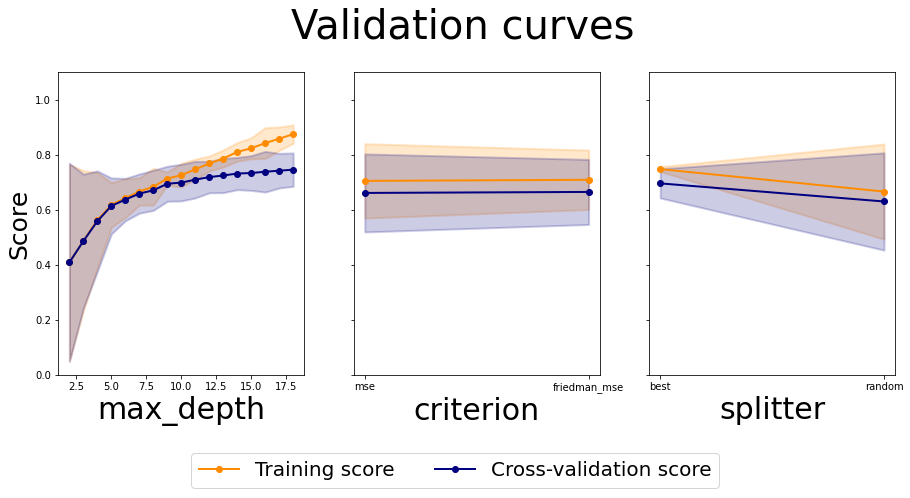

In [ ]:
graficas_cross_validation(parametros_de_arbol_regresion,gridsearch_arbol_proyecto2)

Analizamos cada hiperaparametro:
    
* Splitter: En el caso de best, se obtiene menos desviacion estandar y mayor score.
* Criterion: Mismo score en ambos casos pero con menor desviacion estandar con friedman_mse.
* Max_Depth: A pesar de que se evidencian unos resultados altos en testing con un numero de max_depth=18 , es importante evidenciar que para un max_depth=12 se obtiene una robustez en el modelo en la medida que la diferencia entre training y test es mas reducida.

In [ ]:
mejor_modelo_DT_proyecto2 = gridsearch_arbol_proyecto2.best_estimator_
mejor_resultado_DT_proyecto2 = gridsearch_arbol_proyecto2.best_score_
print("El mejor modelo es: ",mejor_modelo_DT_proyecto2)
print("El mejor resultado es: ",mejor_resultado_DT_proyecto2)

El mejor modelo es:  DecisionTreeRegressor(max_depth=18)
El mejor resultado es:  0.7547200669637775


In [ ]:
y_predicciones_entrenamiento_DT_proyecto2 = mejor_modelo_DT_proyecto2.predict(X_train_proyecto2)
y_predicciones_pruebas_DT_proyecto2 = mejor_modelo_DT_proyecto2.predict(X_test_proyecto2)

score_train_DT_proyecto2=mejor_modelo_DT_proyecto2.score(X_train_proyecto2,y_train_proyecto2)
score_test_DT_proyecto2=mejor_modelo_DT_proyecto2.score(X_test_proyecto2,y_test_proyecto2)

rmse_train_DT_proyecto2 = np.sqrt(mean_squared_error(y_train_proyecto2, y_predicciones_entrenamiento_DT_proyecto2))
rmse_test_DT_proyecto2 = np.sqrt(mean_squared_error(y_test_proyecto2, y_predicciones_pruebas_DT_proyecto2))

print("El score en train del mejor modelo es de: ",score_train_DT_proyecto2)
print("El score en test del mejor modelo es de: ",score_test_DT_proyecto2)
print("\n")
print("El RMSE del entrenamiento del mejor modelo es: ",rmse_train_DT_proyecto2)
print("El RMSE de pruebas del mejor modelo es: ",rmse_test_DT_proyecto2)

El score en train del mejor modelo es de:  0.8971729252687959
El score en test del mejor modelo es de:  0.7666906504392097


El RMSE del entrenamiento del mejor modelo es:  0.05188605017904828
El RMSE de pruebas del mejor modelo es:  0.07890141631562775


Si bien me indican que el mejor modelo es con max_depth 17, un modelo mas estable seria el que se encuentra alrededor del 12 ya que se obtiene una robustez en el modelo en la medida que la diferencia entre training y test es mas reducida.

In [ ]:
mejor_modelo_DT_proyecto2 = DecisionTreeRegressor(max_depth=12, criterion='friedman_mse', splitter='best')
mejor_modelo_DT_proyecto2.fit(X_train_proyecto2,y_train_proyecto2)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=12)

In [ ]:
y_predicciones_entrenamiento_DT_proyecto2 = mejor_modelo_DT_proyecto2.predict(X_train_proyecto2)
y_predicciones_pruebas_DT_proyecto2 = mejor_modelo_DT_proyecto2.predict(X_test_proyecto2)

score_train_DT_proyecto2=mejor_modelo_DT_proyecto2.score(X_train_proyecto2,y_train_proyecto2)
score_test_DT_proyecto2=mejor_modelo_DT_proyecto2.score(X_test_proyecto2,y_test_proyecto2)

rmse_train_DT_proyecto2 = np.sqrt(mean_squared_error(y_train_proyecto2, y_predicciones_entrenamiento_DT_proyecto2))
rmse_test_DT_proyecto2 = np.sqrt(mean_squared_error(y_test_proyecto2, y_predicciones_pruebas_DT_proyecto2))

print("El score en train del mejor modelo es de: ",score_train_DT_proyecto2)
print("El score en test del mejor modelo es de: ",score_test_DT_proyecto2)
print("\n")
print("El RMSE del entrenamiento del mejor modelo es: ",rmse_train_DT_proyecto2)
print("El RMSE de pruebas del mejor modelo es: ",rmse_test_DT_proyecto2)

El score en train del mejor modelo es de:  0.795508348948057
El score en test del mejor modelo es de:  0.741396660003732


El RMSE del entrenamiento del mejor modelo es:  0.07317027066443649
El RMSE de pruebas del mejor modelo es:  0.08306838985569218


Se obtuvo un mejor resultado en train que en el proyecto 1 pero un resultado un poco menor en testing.

---
#### Random Forest
---

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
parametros_random_forest_regressor = {
    'max_depth' : [6, 9, 12, 15,18], # None
    'n_estimators' : [100,120], # 100
    'oob_score' : ['False','True'],#, # false
    'max_features' : ['auto','sqrt'] # auto   
}

In [ ]:
random_forest_proyecto2 = RandomForestRegressor()

In [ ]:
gridsearch_random_forest_proyecto2 = GridSearchCV(random_forest_proyecto2, parametros_random_forest_regressor, cv = 3,return_train_score=True)

In [ ]:
y_train_proyecto2.shape

(61142,)

In [ ]:
y_train_proyecto2.reshape(61142)

array([0.1534301 , 0.08499365, 0.10927755, ..., 0.52673989, 0.43490259,
       0.31900215])

In [ ]:
gridsearch_random_forest_proyecto2.fit(X_train_proyecto2,y_train_proyecto2.reshape(61142))

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 9, 12, 15, 18],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 120],
                         'oob_score': ['False', 'True']},
             return_train_score=True)

In [ ]:
pd.concat([pd.DataFrame(gridsearch_random_forest_proyecto2.cv_results_["params"]),pd.DataFrame(gridsearch_random_forest_proyecto2.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

max_depth max_features  n_estimators oob_score  Accuracy
0           6         auto           100     False  0.689652
1           6         auto           100      True  0.689147
2           6         auto           120     False  0.689453
3           6         auto           120      True  0.689386
4           6         sqrt           100     False  0.683297
5           6         sqrt           100      True  0.682765
6           6         sqrt           120     False  0.683702
7           6         sqrt           120      True  0.683444
8           9         auto           100     False  0.732990
9           9         auto           100      True  0.732857
10          9         auto           120     False  0.733129
11          9         auto           120      True  0.733267
12          9         sqrt           100     False  0.723646
13          9         sqrt           100      True  0.723571
14          9         sqrt           120     False  0.723093
15          9         sqrt           120      True  0.723808
16         12         auto           100     False  0.769274
17         12         auto           100      True  0.769393
18         12         auto           120     False  0.769069
19         12         auto           120      True  0.769141
20         12         sqrt           100     False  0.758363
21         12         sqrt           100      True  0.758244
22         12         sqrt           120     False  0.758478
23         12         sqrt           120      True  0.758611
24         15         auto           100     False  0.789428
25         15         auto           100      True  0.789490
26         15         auto           120     False  0.789475
27         15         auto           120      True  0.789087
28         15         sqrt           100     False  0.785585
29         15         sqrt           100      True  0.784893
30         15         sqrt           120     False  0.785763
31         15         sqrt           120      True  0.785303
32         18         auto           100     False  0.796137
33         18         auto           100      True  0.795988
34         18         auto           120     False  0.796581
35         18         auto           120      True  0.796463
36         18         sqrt           100     False  0.798651
37         18         sqrt           100      True  0.798125
38         18         sqrt           120     False  0.798282
39         18         sqrt           120      True  0.798569

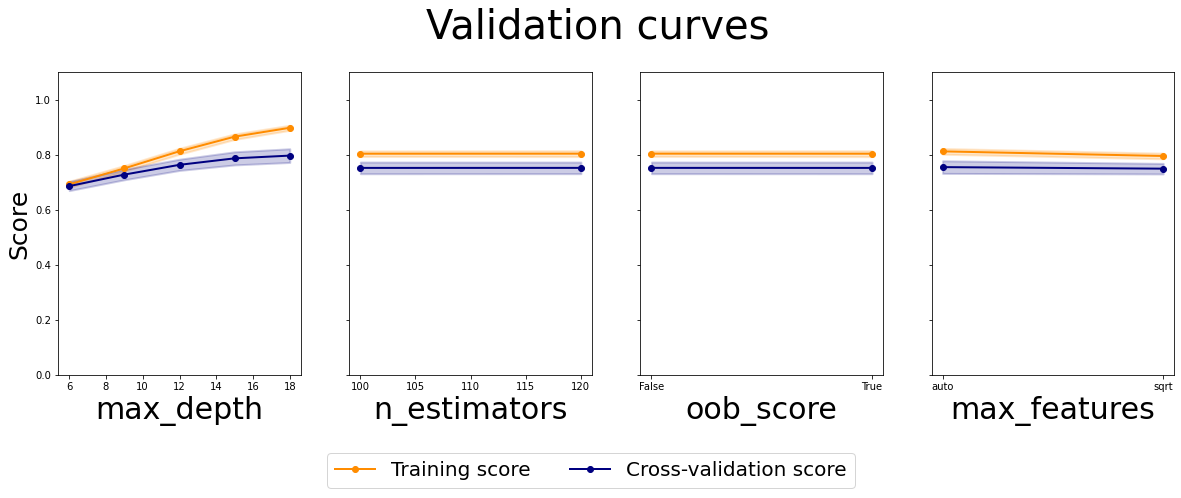

In [ ]:
graficas_cross_validation(parametros_random_forest_regressor,gridsearch_random_forest_proyecto2)

Analizamos cada hiperaparametro:
    
* n_estimators: Es aproximadamente constante para todos los valores.
* oob_score: Es aproximadamente constante para False y para True.
* Max_features: Aproximadamente el mismo score en en test pero con un mejor score en train con auto que con sqrt.
* Max_Depth: A pesar de que se evidencian unos resultados altos en testing con un numero de max_depth=18 , es importante evidenciar que para un max_depth=15 se obtiene una robustez en el modelo en la medida que la diferencia entre training y test es mas reducida.

In [ ]:
mejor_modelo_random_forest_proyecto2 = gridsearch_random_forest_proyecto2.best_estimator_
mejor_resultado_random_forest_proyecto2 = gridsearch_random_forest_proyecto2.best_score_

print("El mejor modelo es: ",mejor_modelo_random_forest_proyecto2)
print("El mejor resultado es: ",mejor_resultado_random_forest_proyecto2)

El mejor modelo es:  RandomForestRegressor(max_depth=18, max_features='sqrt', oob_score='False')
El mejor resultado es:  0.7986508782243384


In [ ]:
y_predicciones_entrenamiento_randomf_proyecto2 = mejor_modelo_random_forest_proyecto2.predict(X_train_proyecto2)
y_predicciones_pruebas_randomf_proyecto2 = mejor_modelo_random_forest_proyecto2.predict(X_test_proyecto2)

score_train_randomf_proyecto2=mejor_modelo_random_forest_proyecto2.score(X_train_proyecto2,y_train_proyecto2)
score_test_randomf_proyecto2=mejor_modelo_random_forest_proyecto2.score(X_test_proyecto2,y_test_proyecto2)

rmse_train_randomf_proyecto2 = np.sqrt(mean_squared_error(y_train_proyecto2, y_predicciones_entrenamiento_randomf_proyecto2))
rmse_test_randomf_proyecto2 = np.sqrt(mean_squared_error(y_test_proyecto2, y_predicciones_pruebas_randomf_proyecto2))

print("El score en train del mejor modelo es de: ",score_train_randomf_proyecto2)
print("El score en test del mejor modelo es de: ",score_test_randomf_proyecto2)
print("\n")
print("El RMSE del entrenamiento del mejor modelo es: ",rmse_train_randomf_proyecto2)
print("El RMSE de pruebas del mejor modelo es: ",rmse_test_randomf_proyecto2)

El score en train del mejor modelo es de:  0.8878240634082475
El score en test del mejor modelo es de:  0.818936681518104


El RMSE del entrenamiento del mejor modelo es:  0.05419344045802105
El RMSE de pruebas del mejor modelo es:  0.06950786764509218


Por lo tanto el mejor modelo es con max_depth=18, max_features='sqrt', n_estimators=120, oob_score='False' y el resto de los hiperparametros con sus valores por defecto.

A continuacion realizaremos un analisis del mejor modelo de random forest

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


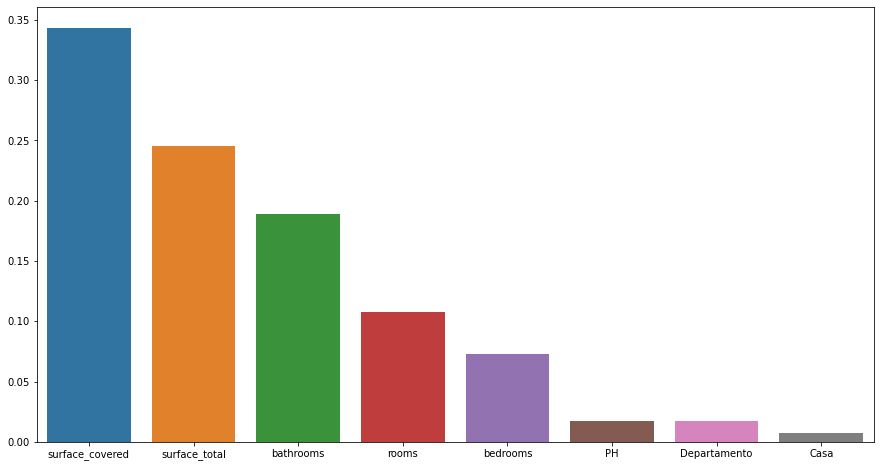

In [ ]:
importances = mejor_modelo_random_forest_proyecto2.feature_importances_
columns = X_train_proyecto2.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.show()

Se nota que los parametros surface_covered, surface_total y bathrooms son los que mas importancia tienen a la hora de realizar el modelado.

Seleccionaremos los `estimators` y evaluaremos sus desempeños sobre train y test., tanto en score como en rmse.

Text(0, 0.5, 'rmse')

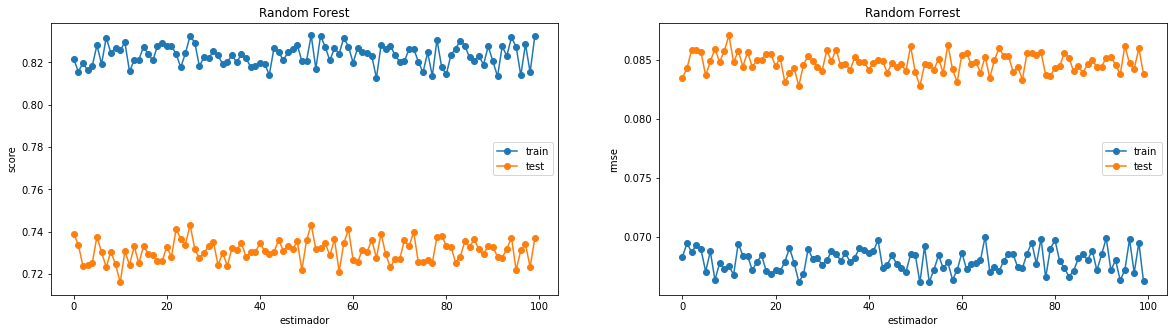

In [ ]:
from sklearn import metrics
mejor_modelo_random_forest_proyecto2_tree_list = []
mejor_modelo_random_forest_proyecto2_train_score_list = []
mejor_modelo_random_forest_proyecto2_test_score_list = []
mejor_modelo_random_forest_proyecto2_train_rmse_list = []
mejor_modelo_random_forest_proyecto2_test_rmse_list = []

# Definimos la lista de valores de arboles que vamos a explorar
tree_number = list(range(100))

# Generamos un loop sobre los distintos valores de k 
for t in tree_number:
    
    # Agregar la información a las listas
    
    model_tree = mejor_modelo_random_forest_proyecto2.estimators_[t]
    y_train_pred_tree = model_tree.predict(X_train_proyecto2)
    y_test_pred_tree = model_tree.predict(X_test_proyecto2)
    mejor_modelo_random_forest_proyecto2_train_score_list.append(model_tree.score(X_train_proyecto2,y_train_proyecto2))
    mejor_modelo_random_forest_proyecto2_test_score_list.append(model_tree.score(X_test_proyecto2,y_test_proyecto2))
    rmse_train = np.sqrt(mean_squared_error(y_train_proyecto2, y_train_pred_tree))
    rmse_test = np.sqrt(mean_squared_error(y_test_proyecto2, y_test_pred_tree))
    mejor_modelo_random_forest_proyecto2_train_rmse_list.append(rmse_train)
    mejor_modelo_random_forest_proyecto2_test_rmse_list.append(rmse_test)

    
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.plot(tree_number, mejor_modelo_random_forest_proyecto2_train_score_list,'o-',label='train' )
plt.plot(tree_number, mejor_modelo_random_forest_proyecto2_test_score_list,'o-',label='test')
plt.legend()
plt.title('Random Forest')
plt.xlabel('estimador')
plt.ylabel('score')

plt.subplot(1,2,2)
plt.plot(tree_number, mejor_modelo_random_forest_proyecto2_train_rmse_list,'o-',label='train' )
plt.plot(tree_number, mejor_modelo_random_forest_proyecto2_test_rmse_list,'o-',label='test')
plt.legend()
plt.title('Random Forrest')
plt.xlabel('estimador')
plt.ylabel('rmse')

Por lo tanto podemos notar que los arboles se diferencian en score y en rmse. Con el score en una media de 0.73 en test y el rmse en una media de 0.085 en test.

---
#### XGBOOST
---

In [ ]:
import xgboost as xgb

In [ ]:
parametros_xgb_regressor = {
    'n_estimators':[10,20,30,40,50,120],
    'gamma':[0.1,0.2,0.3],
    'max_depth':[6, 9, 12, 15,18]
}

In [ ]:
#Implementación sin grid search
xgboost_regressor = xgb.XGBRegressor(n_estimators=100,reg_lambda=1,gamma=0,max_depth=3)

In [ ]:
xgboost_regressor_grid_search = xgb.XGBRegressor()

In [ ]:
gridsearch_xgboost_proyecto2 = GridSearchCV(xgboost_regressor_grid_search , parametros_xgb_regressor, cv = 3,return_train_score=True)

In [ ]:
gridsearch_xgboost_proyecto2.fit(X_train_proyecto2,y_train_proyecto2)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [ ]:
pd.concat([pd.DataFrame(gridsearch_xgboost_proyecto2.cv_results_["params"]),pd.DataFrame(gridsearch_xgboost_proyecto2.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

gamma  max_depth  n_estimators  Accuracy
0     0.1          6            10  0.718172
1     0.1          6            20  0.732070
2     0.1          6            30  0.734793
3     0.1          6            40  0.734793
4     0.1          6            50  0.734793
..    ...        ...           ...       ...
85    0.3         18            20  0.743899
86    0.3         18            30  0.743898
87    0.3         18            40  0.743898
88    0.3         18            50  0.743898
89    0.3         18           120  0.743898

[90 rows x 4 columns]

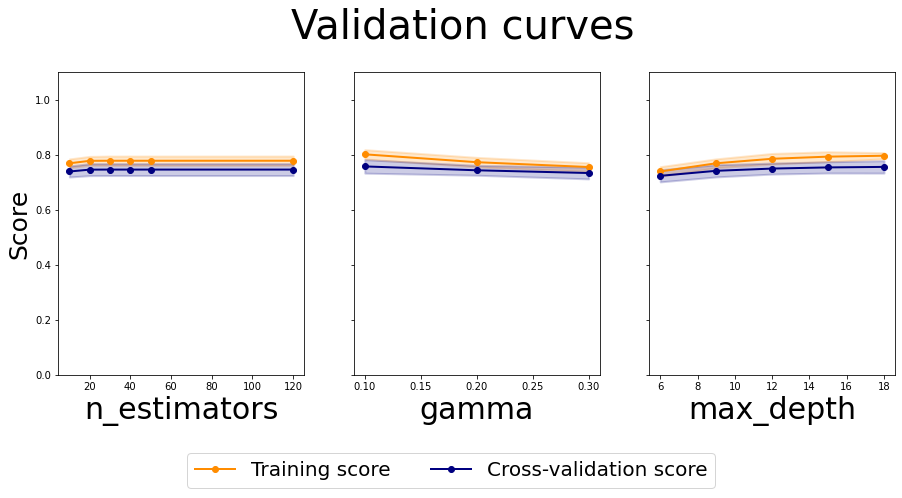

In [ ]:
graficas_cross_validation(parametros_xgb_regressor,gridsearch_xgboost_proyecto2)

Analizamos cada hiperaparametro:
    
* n_estimators: A partir de 20 el score se mantiene constantes.
* Gamma: Se ve un mejor score para 0.1 pero mas robusto para 0.2.
* Max_depth: Se nota un mejor score para 18 y el modelo sigue siendo robusto.

In [ ]:
mejor_modelo_xgboost_proyecto2 = gridsearch_xgboost_proyecto2.best_estimator_
mejor_resultado_xgboost_proyecto2 = gridsearch_xgboost_proyecto2.best_score_

print("El mejor modelo es: ",mejor_modelo_xgboost_proyecto2)
print("El mejor resultado es: ",mejor_resultado_xgboost_proyecto2)

El mejor modelo es:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=18,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=30, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
El mejor resultado es:  0.7717039217280418


In [ ]:
y_predicciones_entrenamiento_xgboost_proyecto2 = mejor_modelo_xgboost_proyecto2.predict(X_train_proyecto2)
y_predicciones_pruebas_xgboost_proyecto2 = mejor_modelo_xgboost_proyecto2.predict(X_test_proyecto2)

resultados_xgboost_entrenamiento = mean_squared_error(y_train_proyecto2, y_predicciones_entrenamiento_xgboost_proyecto2)
resultados_xgboost_pruebas = mean_squared_error(y_test_proyecto2, y_predicciones_pruebas_xgboost_proyecto2)

score_train_xgboost_proyecto2=mejor_modelo_xgboost_proyecto2.score(X_train_proyecto2,y_train_proyecto2)
score_test_xgboost_proyecto2=mejor_modelo_xgboost_proyecto2.score(X_test_proyecto2,y_test_proyecto2)

rmse_train_xgboost_proyecto2 = np.sqrt(resultados_xgboost_entrenamiento)
rmse_test_xgboost_proyecto2 = np.sqrt(resultados_xgboost_pruebas)

print("El score en train del mejor modelo es de: ",score_train_xgboost_proyecto2)
print("El score en test del mejor modelo es de: ",score_test_xgboost_proyecto2)
print("\n")
print("El RMSE del entrenamiento del mejor modelo es: ",rmse_train_xgboost_proyecto2)
print("El RMSE de pruebas del mejor modelo es: ",rmse_test_xgboost_proyecto2)


El score en train del mejor modelo es de:  0.8364958833665382
El score en test del mejor modelo es de:  0.7913145211441927


El RMSE del entrenamiento del mejor modelo es:  0.06542763415806942
El RMSE de pruebas del mejor modelo es:  0.0746216491376078


Por lo tanto el mejor modelo es con max_depth=18, n_estimators=30 y gamma=0.1.

## 5.a- Evaluación

### Evaluar los resultados

Evaluare tambien los tiempos de procesamiento de los modelos elegidos.

In [ ]:
import time

In [ ]:
start = time.time()
arbol_proyecto1.fit(X_train_proyecto1,y_train_proyecto1)
end = time.time()
time_arbol_proyecto1 = end - start
print(time_arbol_proyecto1)

0.17160582542419434


In [ ]:
start = time.time()
mejor_modelo_DT_proyecto2.fit(X_train_proyecto2,y_train_proyecto2)
end = time.time()
time_mejor_modelo_DT_proyecto2 = end - start
print(time_mejor_modelo_DT_proyecto2)

0.11768460273742676


In [ ]:
start = time.time()
mejor_modelo_random_forest_proyecto2.fit(X_train_proyecto2,y_train_proyecto2)
end = time.time()
time_mejor_modelo_random_forest_proyecto2 = end - start
print(time_mejor_modelo_random_forest_proyecto2)

4.70190954208374


In [ ]:
start = time.time()
mejor_modelo_xgboost_proyecto2.fit(X_train_proyecto2,y_train_proyecto2)
end = time.time()
time_mejor_modelo_xgboost_proyecto2 = end - start
print(time_mejor_modelo_xgboost_proyecto2)

1.946697473526001


A continuacion voy a crear una tabla con los resultados de los mejores modelos evaluados para cada modelo.

In [ ]:
data = {'Modelo':  ['Decission Tree (Proy 1)','Decission Tree', 'Random Forest','XGBOST'],
        'Score_en_Train': [score_train,score_train_DT_proyecto2, score_train_randomf_proyecto2,score_train_xgboost_proyecto2],
        'Score_en_Test': [score_test,score_test_DT_proyecto2, score_test_randomf_proyecto2,score_test_xgboost_proyecto2],
        'RMSE_en_Train': [rmse_train,rmse_train_DT_proyecto2, rmse_train_randomf_proyecto2,rmse_train_xgboost_proyecto2],
        'RMSE_en_Test': [rmse_test,rmse_test_DT_proyecto2, rmse_test_randomf_proyecto2,rmse_test_xgboost_proyecto2],
        'Time': [time_arbol_proyecto1,time_mejor_modelo_DT_proyecto2,time_mejor_modelo_random_forest_proyecto2,time_mejor_modelo_xgboost_proyecto2]
        }

mejores_modelos = pd.DataFrame (data, columns = ['Modelo', 'Score_en_Train','Score_en_Test','RMSE_en_Train','RMSE_en_Test','Time'])
mejores_modelos

Modelo  Score_en_Train  Score_en_Test  RMSE_en_Train  \
0  Decission Tree (Proy 1)        0.775015       0.745648       0.066262   
1           Decission Tree        0.795508       0.741397       0.073170   
2            Random Forest        0.887824       0.818937       0.054193   
3                   XGBOST        0.836496       0.791315       0.065428   

   RMSE_en_Test      Time  
0      0.083778  0.171606  
1      0.083068  0.117685  
2      0.069508  4.701910  
3      0.074622  1.946697

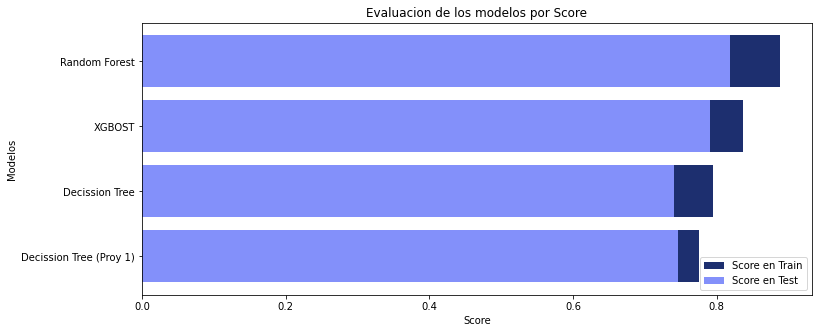

In [ ]:
mejores_modelos=mejores_modelos.sort_values('Score_en_Train')
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[12,5])# Passing the parameters to the bar function, this is the main function which creates the bar plot
# For creating the horizontal make sure that you append 'h' to the bar function name
plt.barh(mejores_modelos.Modelo, mejores_modelos.Score_en_Train, label = "Score en Train", color = '#1D2F6F')
plt.barh(mejores_modelos.Modelo, mejores_modelos.Score_en_Test, label = "Score en Test", color = '#8390FA')# Creating the legend of the bars in the plot
plt.legend()# Namimg the x and y axis
plt.xlabel('Score')
plt.ylabel('Modelos')# Giving the tilte for the plot
plt.title('Evaluacion de los modelos por Score')# Saving the plot as a 'png'
plt.savefig('2BarPlot.png')# Displaying the bar plot
plt.show()

Los mejores score se dan en Random forest, seguido de XGBOOST, los cuales son modelos mas avanzados que los utilizados en el proyecto 1. Y con decission tree del proyecto 1 mejor que el del proyecto 2, que si bien tiene mejor score en train, es mejor en test el del proyecto 1.

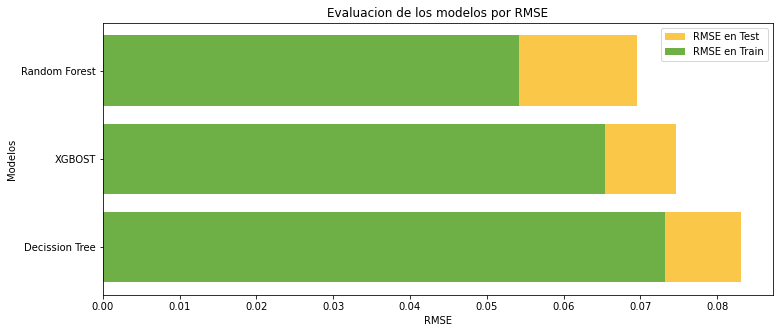

In [ ]:
mejores_modelos=mejores_modelos.sort_values('RMSE_en_Train',ascending=False)
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[12, 5])# Passing the parameters to the bar function, this is the main function which creates the bar plot
# For creating the horizontal make sure that you append 'h' to the bar function name
plt.barh(mejores_modelos[(mejores_modelos.Modelo != 'Decission Tree (Proy 1)')].Modelo, mejores_modelos[(mejores_modelos.Modelo != 'Decission Tree (Proy 1)')].RMSE_en_Test, label = "RMSE en Test", color = '#FAC748')
plt.barh(mejores_modelos[(mejores_modelos.Modelo != 'Decission Tree (Proy 1)')].Modelo, mejores_modelos[(mejores_modelos.Modelo != 'Decission Tree (Proy 1)')].RMSE_en_Train, label = "RMSE en Train", color = '#6EAF46')# Creating the legend of the bars in the plot
plt.legend()# Namimg the x and y axis
plt.xlabel('RMSE')
plt.ylabel('Modelos')# Giving the tilte for the plot
plt.title('Evaluacion de los modelos por RMSE')# Saving the plot as a 'png'
plt.savefig('2BarPlot.png')# Displaying the bar plot
plt.show()

Los mejores modelos (con menor RMSE) se dan nuevamente con Random forest, seguido de XGBOOST, los cuales son modelos mas avanzados que los utilizados en el proyecto 1. Y en todos los casos, menor RMSE en train.

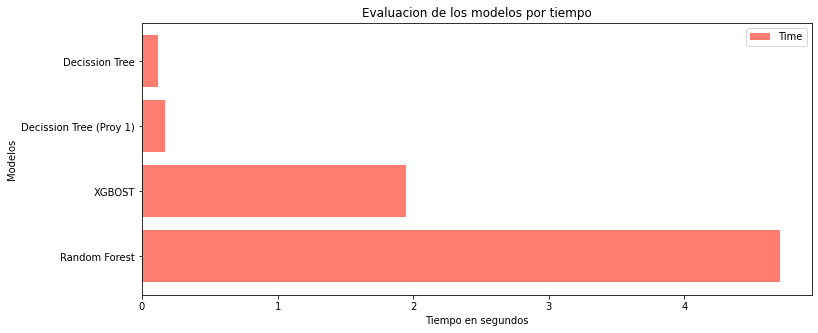

In [ ]:
mejores_modelos=mejores_modelos.sort_values('Time',ascending=False)
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[12, 5])# Passing the parameters to the bar function, this is the main function which creates the bar plot
# For creating the horizontal make sure that you append 'h' to the bar function name
plt.barh(mejores_modelos.Modelo, mejores_modelos.Time, label = "Time", color = '#ff7c70')
# Creating the legend of the bars in the plot
plt.legend()# Namimg the x and y axis
plt.xlabel('Tiempo en segundos')
plt.ylabel('Modelos')# Giving the tilte for the plot
plt.title('Evaluacion de los modelos por tiempo')# Saving the plot as a 'png'
plt.savefig('2BarPlot.png')# Displaying the bar plot
plt.show()

A continuación analizaremos los errores en todos los moodelos con mayor profundidad:

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


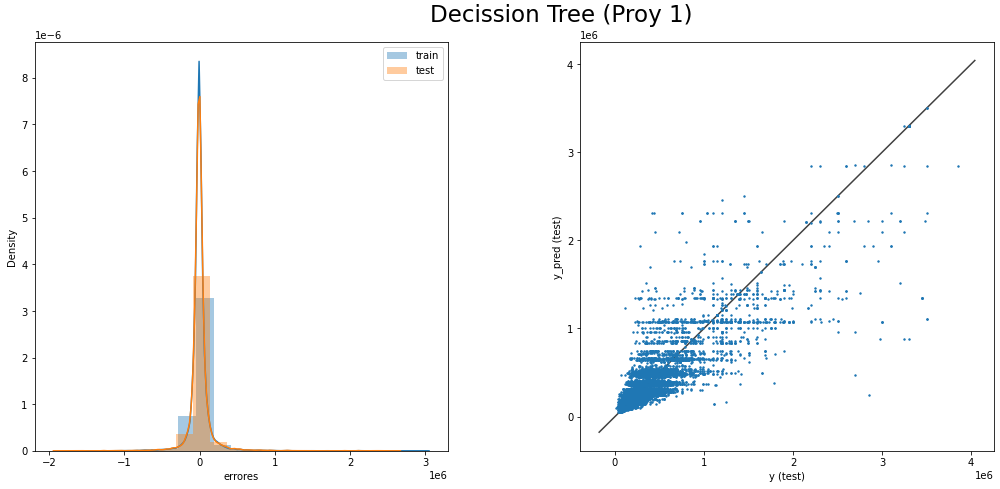

Los RMSE en Decission Tree (Proy 1) son:
Raíz del error cuadrático medio en Train: 140807.27003962157
Raíz del error cuadrático medio en Test: 147717.26123313134




D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


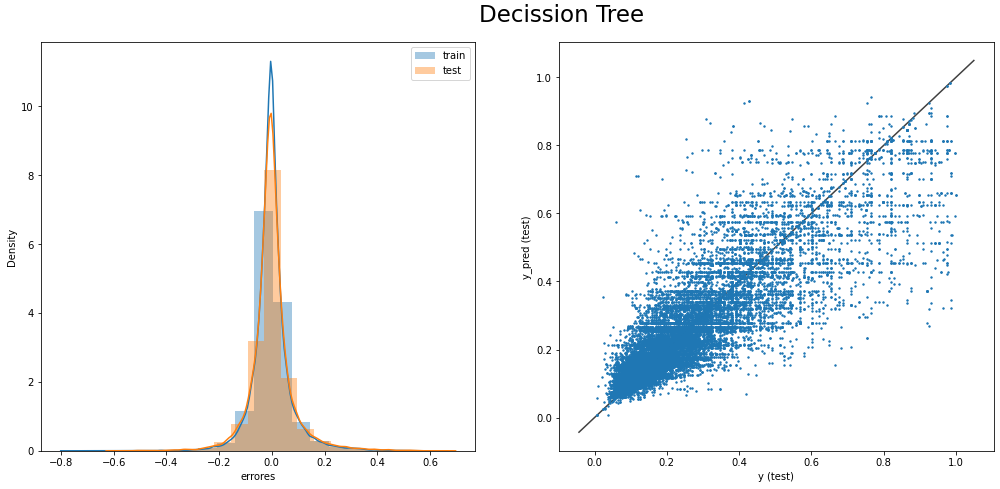

Los RMSE en Decission Tree son:
Raíz del error cuadrático medio en Train: 0.07317027066443649
Raíz del error cuadrático medio en Test: 0.08306838985569218




D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


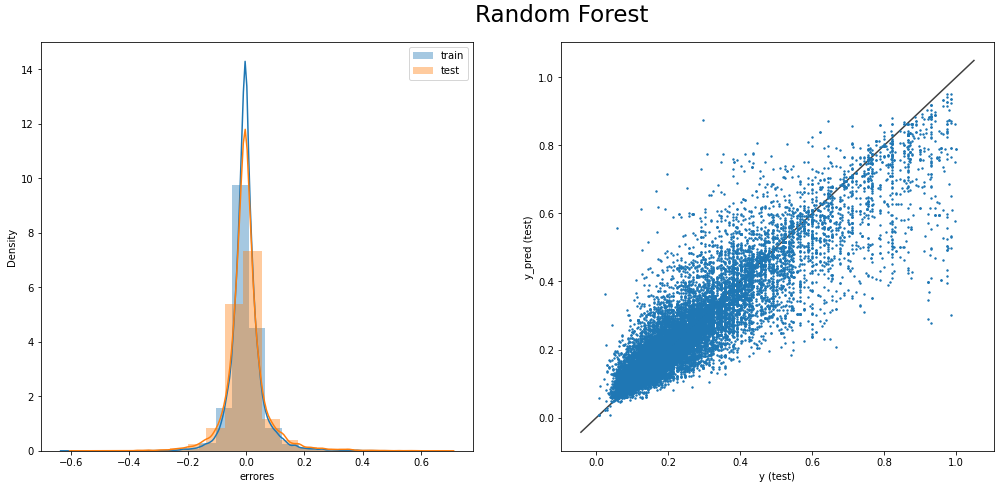

Los RMSE en Random Forest son:
Raíz del error cuadrático medio en Train: 0.05419344045802105
Raíz del error cuadrático medio en Test: 0.06950786764509218




D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


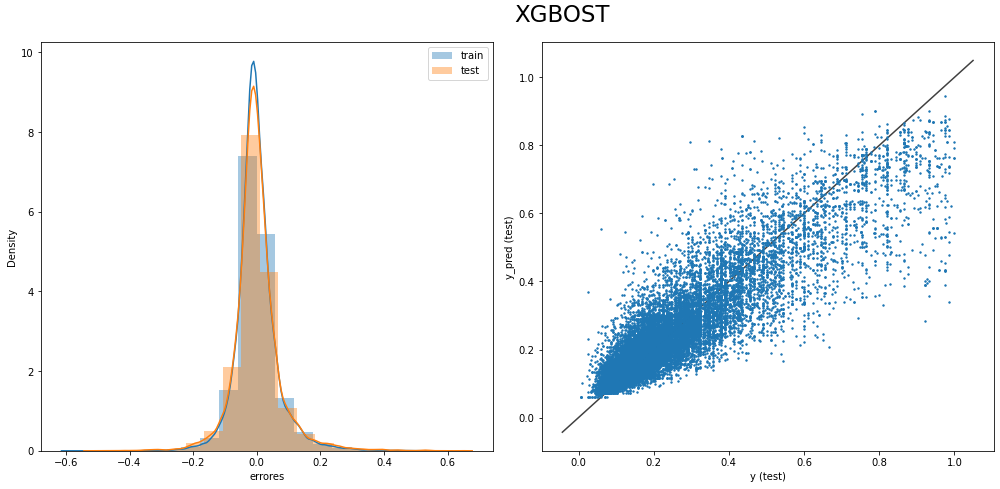

Los RMSE en XGBOST son:
Raíz del error cuadrático medio en Train: 0.06542763415806942
Raíz del error cuadrático medio en Test: 0.0746216491376078




In [ ]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Decission Tree (Proy 1)','Decission Tree', 'Random Forest','XGBOST']

y_train_pred_list = [y_train_pred_proyecto1,y_predicciones_entrenamiento_DT_proyecto2,y_predicciones_entrenamiento_randomf_proyecto2,y_predicciones_entrenamiento_xgboost_proyecto2]
y_test_pred_list = [y_test_pred_proyecto1,y_predicciones_pruebas_DT_proyecto2,y_predicciones_pruebas_randomf_proyecto2,y_predicciones_pruebas_xgboost_proyecto2]

for i in range(0,4):
    y_train_pred = y_train_pred_list[i]
    y_test_pred = y_test_pred_list[i]
    
    if i==0:
        y_train = y_train_proyecto1
        y_test = y_test_proyecto1
    else:
        y_train = y_train_proyecto2
        y_test = y_test_proyecto2
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    plt.figure(figsize = (14,7))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    plt.text(x=0.65, y=0.65, s='{}'.format(modelos[i]), fontsize=23, ha="center", transform=fig.transFigure)
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()
    
    print('Los RMSE en {} son:'.format(modelos[i]))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print('\n')

Analizamos las graficas obtenidas de valores reales vs valores predichos en cada uno de los modelos y tuvimos en cuenta sus errores tanto en testing como en train. De esta manera lLegamos a la conclusion de que el modelo de random forest es el que mejor desempeño tiene. Con un valor de RMSE menor al resto de los modelos en testing y en train. También podemos concluir que a medida que aumentan los valores del precio en sus valores reales tanto como en los predichos, se nota una menor correlacion que en sus valores mas pequeños.

#### En el caso *a* concluimos lo siguiente

Notamos que el modelo mas rapido es el decission tree del proyecto 2. Con mejor score en train pero menor en test que el del proyecto 1.

XGBOOST y Random Forest son los mejores en score y en RMSE pero tienen un tiempo de ejecucion considerable en comparacion al arbol de decision.

Por lo tanto, como el tiempo de ejecucion del Random forest no es muy alto y tiene el mejor score y el menor RMSE, concluimos que es el mejor modelo evaluado.

## 4.b- Modelado utilizando surface_covered, bathroom.

A continuacion vamos a realizar los modelos utilizando las columnas bathroom, surface_total y surface_covered. Se opto analizar tambien con solo estas variables debido a la gran correlacion que tiene cada una con respecto del precio por sobre las otras y tambien analizar si el conjunto de ambas puede llevar a un modelo mas robusto. 

In [ ]:
# Estas particiones son para la comparación de los resultados obtenidos en el proyecto 1. Adicionalmente, la segunda partición nos servirá para entrenar los diferentes modelos avanzados
from sklearn.model_selection import train_test_split

X_proyecto1=properati_proyecto1.iloc[:,[2,3,4]]
y_proyecto1=properati_proyecto1.price.values
X_train_proyecto1, X_test_proyecto1, y_train_proyecto1, y_test_proyecto1 = train_test_split(X_proyecto1, y_proyecto1, test_size=0.30, random_state=42)

# Proyecto 2
X_proyecto2=properati_escalados_1.iloc[:,[3,4,5]]
y_proyecto2=properati_escalados_1.price.values
X_train_proyecto2, X_test_proyecto2, y_train_proyecto2, y_test_proyecto2 = train_test_split(X_proyecto2, y_proyecto2, test_size=0.30, random_state=42)

---
#### Decision Tree - Datos Proyecto 1
---

In [ ]:
# Importamos la librería de árboles
from sklearn.tree import DecisionTreeRegressor

In [ ]:
arbol_proyecto1 = DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
arbol_proyecto1.fit(X_train_proyecto1,y_train_proyecto1)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
score_train=arbol_proyecto1.score(X_train_proyecto1,y_train_proyecto1)
score_test=arbol_proyecto1.score(X_test_proyecto1,y_test_proyecto1)

# Predecir y evaluar sobre el set de entrenamiento
y_train_pred_proyecto1 = arbol_proyecto1.predict(X_train_proyecto1)
# Predecir y evaluar sobre el set de evaluación
y_test_pred_proyecto1 = arbol_proyecto1.predict(X_test_proyecto1)

rmse_train = np.sqrt(mean_squared_error(y_train_proyecto1, y_train_pred_proyecto1))
rmse_test = np.sqrt(mean_squared_error(y_test_proyecto1, y_test_pred_proyecto1))

print("El score en train es de: ",score_train)
print("El score en test es de: ",score_test)
print("\n")
print("El RMSE en train es de: ",rmse_train)
print("El RMSE en test es de: ",rmse_test)

El score en train es de:  0.7879362392823528
El score en test es de:  0.7280150932839837


El RMSE en train es de:  136704.14350152665
El RMSE en test es de:  152751.78295443917


---
#### Decision Tree - Datos Proyecto 1 con GridSearch
---

In [ ]:
# Importamos la librería de árboles
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, make_scorer
from sklearn.metrics import accuracy_score

In [ ]:
# PARAMETROS PARA AMBOS ARBOLES
#parametros_de_arbol_regresion = {"max_depth":[2,4,6,8]}
parametros_de_arbol_regresion = {"max_depth":[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
                                 "criterion":["mse", "friedman_mse"],
                                 "splitter": ["best","random"]}


In [ ]:
arbol_proyecto1 = DecisionTreeRegressor()

In [ ]:
gridsearch_arbol_proyecto1 = GridSearchCV(arbol_proyecto1, parametros_de_arbol_regresion, cv = 10, return_train_score=True)

In [ ]:
gridsearch_arbol_proyecto1.fit(X_train_proyecto1,y_train_proyecto1)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18],
                         'splitter': ['best', 'random']},
             return_train_score=True)

In [ ]:
pd.concat([pd.DataFrame(gridsearch_arbol_proyecto1.cv_results_["params"]),pd.DataFrame(gridsearch_arbol_proyecto1.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

criterion  max_depth splitter  Accuracy
0            mse          2     best  0.532387
1            mse          2   random  0.381114
2            mse          3     best  0.596661
3            mse          3   random  0.492676
4            mse          4     best  0.627275
..           ...        ...      ...       ...
63  friedman_mse         16   random  0.694671
64  friedman_mse         17     best  0.718744
65  friedman_mse         17   random  0.703746
66  friedman_mse         18     best  0.719800
67  friedman_mse         18   random  0.712661

[68 rows x 4 columns]

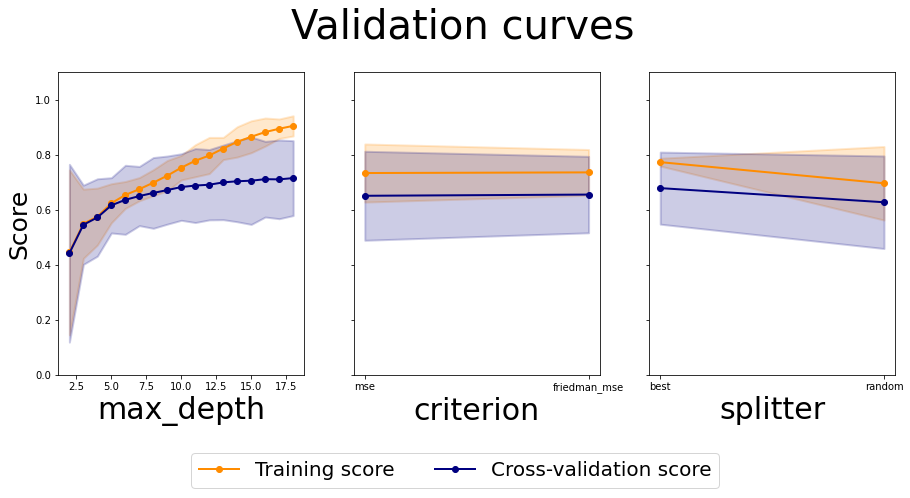

In [ ]:
graficas_cross_validation(parametros_de_arbol_regresion,gridsearch_arbol_proyecto1)

Analizamos cada hiperaparametro:
    
* Splitter: En el caso de best, se obtiene menos desviacion estandar y mayor score.
* Criterion: Mismo score en ambos casos pero con menor desviacion estandar con mse.
* Max_Depth: A pesar de que se evidencian unos resultados altos en testing con un numero de max_depth=18 , es importante evidenciar que para un max_depth=8 se obtiene una robustez en el modelo en la medida que la diferencia entre training y test es mas reducida.

In [ ]:
mejor_modelo_proyecto1 = gridsearch_arbol_proyecto1.best_estimator_
mejor_resultado_proyecto1 = gridsearch_arbol_proyecto1.best_score_
print("El mejor modelo es: ",mejor_modelo_proyecto1)
print("El mejor resultado es: ",mejor_resultado_proyecto1)

El mejor modelo es:  DecisionTreeRegressor(max_depth=16, splitter='random')
El mejor resultado es:  0.7210189944527217


In [ ]:
y_predicciones_entrenamiento_proyecto1 = mejor_modelo_proyecto1.predict(X_train_proyecto1)
y_predicciones_pruebas_proyecto1 = mejor_modelo_proyecto1.predict(X_test_proyecto1)

score_train_proyecto1=mejor_modelo_proyecto1.score(X_train_proyecto1,y_train_proyecto1)
score_test_proyecto1=mejor_modelo_proyecto1.score(X_test_proyecto1,y_test_proyecto1)

rmse_train_proyecto1 = np.sqrt(mean_squared_error(y_train_proyecto1, y_predicciones_entrenamiento_proyecto1))
rmse_test_proyecto1 = np.sqrt(mean_squared_error(y_test_proyecto1, y_predicciones_pruebas_proyecto1))

print("El score en train del mejor modelo es de: ",score_train_proyecto1)
print("El score en test del mejor modelo es de: ",score_test_proyecto1)
print("\n")
print("El RMSE del entrenamiento del mejor modelo es: ",rmse_train_proyecto1)
print("El RMSE de pruebas del mejor modelo es: ",rmse_test_proyecto1)

El score en train del mejor modelo es de:  0.8202594441164747
El score en test del mejor modelo es de:  0.7159484551723612


El RMSE del entrenamiento del mejor modelo es:  125855.29415390755
El RMSE de pruebas del mejor modelo es:  156103.43646119165


Si bien me indican que el mejor modelo es con max_depth 18, un modelo mas estable seria el que se encuentra alrededor del 10 ya que se obtiene una robustez en el modelo en la medida que la diferencia entre training y test es mas reducida. 

Se lo modelara a continuacion:

In [ ]:
mejor_modelo_proyecto1 = DecisionTreeRegressor(max_depth=10, criterion='mse', splitter='best')
mejor_modelo_proyecto1.fit(X_train_proyecto1,y_train_proyecto1)

DecisionTreeRegressor(max_depth=10)

In [ ]:
y_predicciones_entrenamiento_proyecto1 = mejor_modelo_proyecto1.predict(X_train_proyecto1)
y_predicciones_pruebas_proyecto1 = mejor_modelo_proyecto1.predict(X_test_proyecto1)

score_train_proyecto1=mejor_modelo_proyecto1.score(X_train_proyecto1,y_train_proyecto1)
score_test_proyecto1=mejor_modelo_proyecto1.score(X_test_proyecto1,y_test_proyecto1)

rmse_train_proyecto1 = np.sqrt(mean_squared_error(y_train_proyecto1, y_predicciones_entrenamiento_proyecto1))
rmse_test_proyecto1 = np.sqrt(mean_squared_error(y_test_proyecto1, y_predicciones_pruebas_proyecto1))

print("El score en train del mejor modelo es de: ",score_train_proyecto1)
print("El score en test del mejor modelo es de: ",score_test_proyecto1)
print("\n")
print("El RMSE del entrenamiento del mejor modelo es: ",rmse_train_proyecto1)
print("El RMSE de pruebas del mejor modelo es: ",rmse_test_proyecto1)

El score en train del mejor modelo es de:  0.7879362392823528
El score en test del mejor modelo es de:  0.7275668746063519


El RMSE del entrenamiento del mejor modelo es:  136704.14350152665
El RMSE de pruebas del mejor modelo es:  152877.5951160669


Se obtuvo el mismo resultado que en el modelado sin gridsearch.

---
#### Decision Tree - Datos pre-procesados - Proyecto 2 sin GridSearch
---

In [ ]:
arbol_proyecto2 = DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
arbol_proyecto2.fit(X_train_proyecto2,y_train_proyecto2)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [ ]:
score_train_proyecto2=arbol_proyecto2.score(X_train_proyecto2,y_train_proyecto2)
score_test_proyecto2=arbol_proyecto2.score(X_test_proyecto2,y_test_proyecto2)

# Predecir y evaluar sobre el set de entrenamiento
y_train_pred_proyecto2 = arbol_proyecto2.predict(X_train_proyecto2)
# Predecir y evaluar sobre el set de evaluación
y_test_pred_proyecto2 = arbol_proyecto2.predict(X_test_proyecto2)

rmse_train_proyecto2 = np.sqrt(mean_squared_error(y_train_proyecto2, y_train_pred_proyecto2))
rmse_test_proyecto2 = np.sqrt(mean_squared_error(y_test_proyecto2, y_test_pred_proyecto2))

print("El score en train es de: ",score_train_proyecto2)
print("El score en test es de: ",score_test_proyecto2)
print("\n")
print("El RMSE en train es de: ",rmse_train_proyecto2)
print("El RMSE en test es de: ",rmse_test_proyecto2)

El score en train es de:  0.701871298927157
El score en test es de:  0.6685833635466414


El RMSE en train es de:  0.08834841545917255
El RMSE en test es de:  0.09403854052624948


El score es mejor en el proyecto1

El RMSE es menor en el proyecto 2 debido a que los datos estan reescalados asique compararemos solamente el score entre los proyectos 1 y 2

---
#### Decision Tree - Datos pre-procesados - Proyecto 2  con GridSearch
---

In [ ]:
arbol_proyecto2 = DecisionTreeRegressor()

In [ ]:
gridsearch_arbol_proyecto2 = GridSearchCV(arbol_proyecto2, parametros_de_arbol_regresion, cv = 10,return_train_score=True)

In [ ]:
gridsearch_arbol_proyecto2.fit(X_train_proyecto2,y_train_proyecto2)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18],
                         'splitter': ['best', 'random']},
             return_train_score=True)

In [ ]:
pd.concat([pd.DataFrame(gridsearch_arbol_proyecto2.cv_results_["params"]),pd.DataFrame(gridsearch_arbol_proyecto2.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

criterion  max_depth splitter  Accuracy
0            mse          2     best  0.510095
1            mse          2   random  0.333312
2            mse          3     best  0.572238
3            mse          3   random  0.370388
4            mse          4     best  0.601310
..           ...        ...      ...       ...
63  friedman_mse         16   random  0.654989
64  friedman_mse         17     best  0.681098
65  friedman_mse         17   random  0.667945
66  friedman_mse         18     best  0.679248
67  friedman_mse         18   random  0.675105

[68 rows x 4 columns]

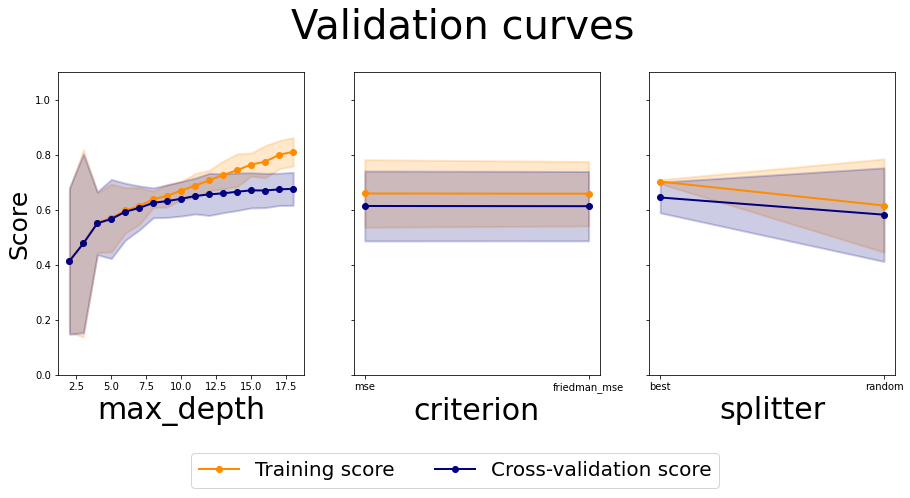

In [ ]:
graficas_cross_validation(parametros_de_arbol_regresion,gridsearch_arbol_proyecto2)

Analizamos cada hiperaparametro:
    
* Splitter: En el caso de best, se obtiene menos desviacion estandar y mayor score.
* Criterion: Mismo score en ambos casos pero con menor desviacion estandar con friedman_mse.
* Max_Depth: Se evidencia que para un max_depth=15 se obtiene una robustez en el modelo en la medida que la diferencia entre training y test es reducida y un nivel alto en score.

In [ ]:
mejor_modelo_DT_proyecto2 = gridsearch_arbol_proyecto2.best_estimator_
mejor_resultado_DT_proyecto2 = gridsearch_arbol_proyecto2.best_score_
print("El mejor modelo es: ",mejor_modelo_DT_proyecto2)
print("El mejor resultado es: ",mejor_resultado_DT_proyecto2)

El mejor modelo es:  DecisionTreeRegressor(criterion='friedman_mse', max_depth=15)
El mejor resultado es:  0.6834743415272431


In [ ]:
y_predicciones_entrenamiento_DT_proyecto2 = mejor_modelo_DT_proyecto2.predict(X_train_proyecto2)
y_predicciones_pruebas_DT_proyecto2 = mejor_modelo_DT_proyecto2.predict(X_test_proyecto2)

score_train_DT_proyecto2=mejor_modelo_DT_proyecto2.score(X_train_proyecto2,y_train_proyecto2)
score_test_DT_proyecto2=mejor_modelo_DT_proyecto2.score(X_test_proyecto2,y_test_proyecto2)

rmse_train_DT_proyecto2 = np.sqrt(mean_squared_error(y_train_proyecto2, y_predicciones_entrenamiento_DT_proyecto2))
rmse_test_DT_proyecto2 = np.sqrt(mean_squared_error(y_test_proyecto2, y_predicciones_pruebas_DT_proyecto2))

print("El score en train del mejor modelo es de: ",score_train_DT_proyecto2)
print("El score en test del mejor modelo es de: ",score_test_DT_proyecto2)
print("\n")
print("El RMSE del entrenamiento del mejor modelo es: ",rmse_train_DT_proyecto2)
print("El RMSE de pruebas del mejor modelo es: ",rmse_test_DT_proyecto2)

El score en train del mejor modelo es de:  0.7968070055515775
El score en test del mejor modelo es de:  0.6982755715517648


El RMSE del entrenamiento del mejor modelo es:  0.07293756091715814
El RMSE de pruebas del mejor modelo es:  0.08972716875020692


Se obtuvo un mejor resultado en el proyecto 1.

---
#### Random Forest
---

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
parametros_random_forest_regressor = {
    'max_depth' : [6, 9, 12, 15,18], # None
    'n_estimators' : [100,120], # 100
    'oob_score' : ['False','True'],#, # false
    'max_features' : ['auto','sqrt'] # auto   
}

In [ ]:
random_forest_proyecto2 = RandomForestRegressor()

In [ ]:
gridsearch_random_forest_proyecto2 = GridSearchCV(random_forest_proyecto2, parametros_random_forest_regressor, cv = 3,return_train_score=True)

In [ ]:
y_train_proyecto2.shape

(61142,)

In [ ]:
y_train_proyecto2.reshape(61142)

array([0.1534301 , 0.08499365, 0.10927755, ..., 0.52673989, 0.43490259,
       0.31900215])

In [ ]:
gridsearch_random_forest_proyecto2.fit(X_train_proyecto2,y_train_proyecto2.reshape(61142))

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 9, 12, 15, 18],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 120],
                         'oob_score': ['False', 'True']},
             return_train_score=True)

In [ ]:
pd.concat([pd.DataFrame(gridsearch_random_forest_proyecto2.cv_results_["params"]),pd.DataFrame(gridsearch_random_forest_proyecto2.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

max_depth max_features  n_estimators oob_score  Accuracy
0           6         auto           100     False  0.639188
1           6         auto           100      True  0.639327
2           6         auto           120     False  0.639305
3           6         auto           120      True  0.638928
4           6         sqrt           100     False  0.634921
5           6         sqrt           100      True  0.635079
6           6         sqrt           120     False  0.634926
7           6         sqrt           120      True  0.635058
8           9         auto           100     False  0.677389
9           9         auto           100      True  0.677321
10          9         auto           120     False  0.677420
11          9         auto           120      True  0.677382
12          9         sqrt           100     False  0.673601
13          9         sqrt           100      True  0.673509
14          9         sqrt           120     False  0.673856
15          9         sqrt           120      True  0.673776
16         12         auto           100     False  0.706024
17         12         auto           100      True  0.705939
18         12         auto           120     False  0.705690
19         12         auto           120      True  0.705995
20         12         sqrt           100     False  0.706974
21         12         sqrt           100      True  0.706453
22         12         sqrt           120     False  0.706695
23         12         sqrt           120      True  0.707114
24         15         auto           100     False  0.717832
25         15         auto           100      True  0.716917
26         15         auto           120     False  0.717895
27         15         auto           120      True  0.718376
28         15         sqrt           100     False  0.721816
29         15         sqrt           100      True  0.722065
30         15         sqrt           120     False  0.722356
31         15         sqrt           120      True  0.722175
32         18         auto           100     False  0.718934
33         18         auto           100      True  0.718576
34         18         auto           120     False  0.718521
35         18         auto           120      True  0.718478
36         18         sqrt           100     False  0.722498
37         18         sqrt           100      True  0.722720
38         18         sqrt           120     False  0.722762
39         18         sqrt           120      True  0.722766

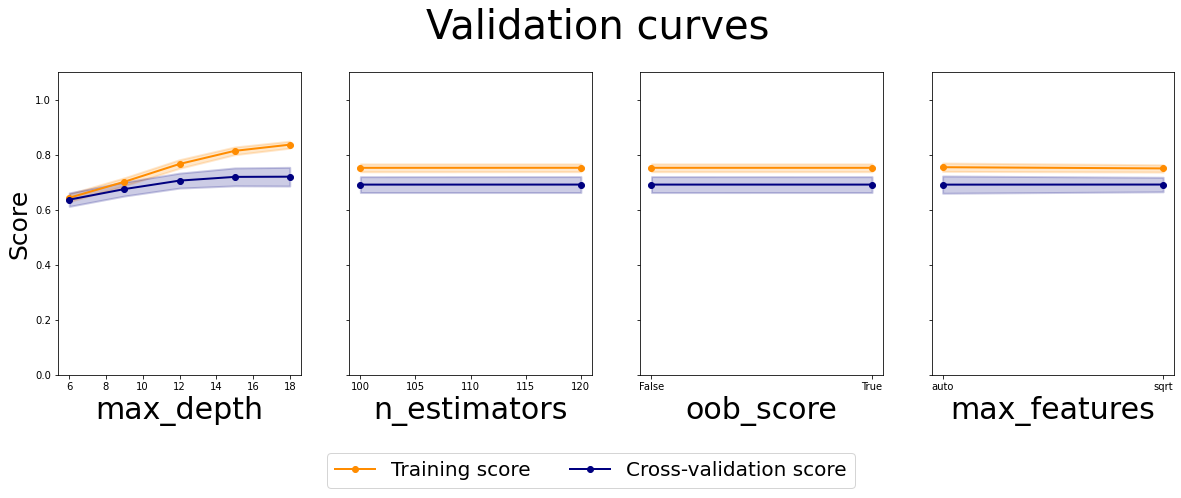

In [ ]:
graficas_cross_validation(parametros_random_forest_regressor,gridsearch_random_forest_proyecto2)

Analizamos cada hiperaparametro:
    
* min_samples_split: Es aproximadamente constante para todos los valores.
* min_samples_leaf: Es aproximadamente constante para todos los valores.
* Max_Depth: Es aproximadamente constante para todos los valores pero se evidencian unos resultados un poco mayores en testing con un numero de max_depth=18 y un modelo robusto.

In [ ]:
mejor_modelo_random_forest_proyecto2 = gridsearch_random_forest_proyecto2.best_estimator_
mejor_resultado_random_forest_proyecto2 = gridsearch_random_forest_proyecto2.best_score_

print("El mejor modelo es: ",mejor_modelo_random_forest_proyecto2)
print("El mejor resultado es: ",mejor_resultado_random_forest_proyecto2)

El mejor modelo es:  RandomForestRegressor(max_depth=18, max_features='sqrt', n_estimators=120,
                      oob_score='True')
El mejor resultado es:  0.7227656278066092


In [ ]:
y_predicciones_entrenamiento_randomf_proyecto2 = mejor_modelo_random_forest_proyecto2.predict(X_train_proyecto2)
y_predicciones_pruebas_randomf_proyecto2 = mejor_modelo_random_forest_proyecto2.predict(X_test_proyecto2)

score_train_randomf_proyecto2=mejor_modelo_random_forest_proyecto2.score(X_train_proyecto2,y_train_proyecto2)
score_test_randomf_proyecto2=mejor_modelo_random_forest_proyecto2.score(X_test_proyecto2,y_test_proyecto2)

rmse_train_randomf_proyecto2 = np.sqrt(mean_squared_error(y_train_proyecto2, y_predicciones_entrenamiento_randomf_proyecto2))
rmse_test_randomf_proyecto2 = np.sqrt(mean_squared_error(y_test_proyecto2, y_predicciones_pruebas_randomf_proyecto2))

print("El score en train del mejor modelo es de: ",score_train_randomf_proyecto2)
print("El score en test del mejor modelo es de: ",score_test_randomf_proyecto2)
print("\n")
print("El RMSE del entrenamiento del mejor modelo es: ",rmse_train_randomf_proyecto2)
print("El RMSE de pruebas del mejor modelo es: ",rmse_test_randomf_proyecto2)

El score en train del mejor modelo es de:  0.8312448481748419
El score en test del mejor modelo es de:  0.7471433050683169


El RMSE del entrenamiento del mejor modelo es:  0.06646995593139433
El RMSE de pruebas del mejor modelo es:  0.08214023785396901


Por lo tanto el mejor modelo es con max_depth=18, max_features='sqrt', n_estimators=120 y oob_score='True'.

A continuacion realizaremos un analisis del mejor modelo de random forest

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


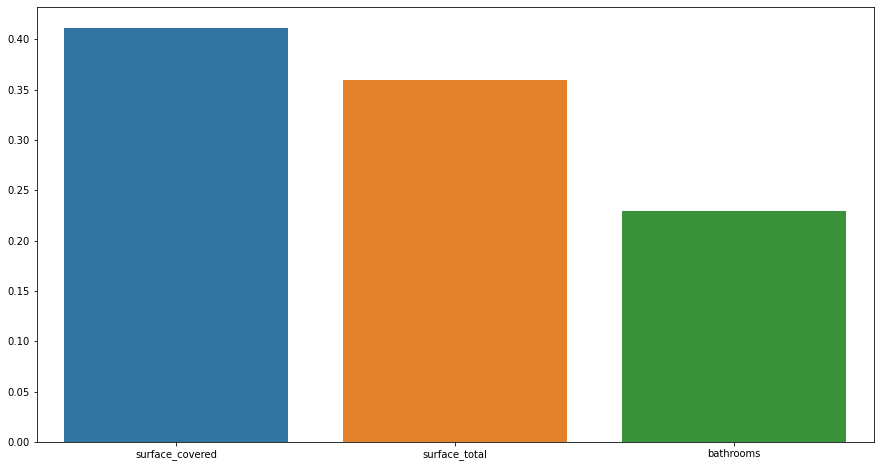

In [ ]:
importances = mejor_modelo_random_forest_proyecto2.feature_importances_
columns = X_train_proyecto2.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.show()

Se nota que los parametros surface_covered y surface_total son los que mas importancia tienen a la hora de realizar el modelado e influyen de aproximadamente igual manera.

Seleccionaremos los `estimators` y evaluaremos sus desempeños sobre train y test., tanto en score como en rmse.

Text(0, 0.5, 'rmse')

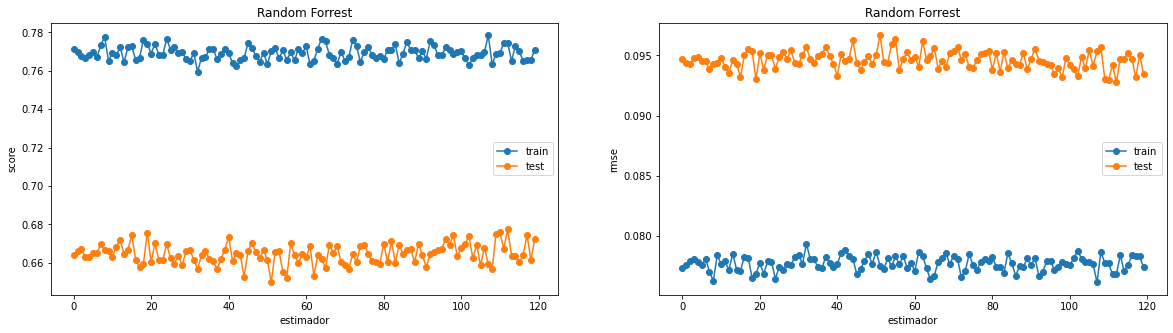

In [ ]:
from sklearn import metrics
mejor_modelo_random_forest_proyecto2_tree_list = []
mejor_modelo_random_forest_proyecto2_train_score_list = []
mejor_modelo_random_forest_proyecto2_test_score_list = []
mejor_modelo_random_forest_proyecto2_train_rmse_list = []
mejor_modelo_random_forest_proyecto2_test_rmse_list = []

# Definimos la lista de valores de arboles que vamos a explorar
tree_number = list(range(120))


# Generamos un loop sobre los distintos valores de k 
for t in tree_number:
    
    # Agregar la información a las listas
    
    model_tree = mejor_modelo_random_forest_proyecto2.estimators_[t]
    y_train_pred_tree = model_tree.predict(X_train_proyecto2)
    y_test_pred_tree = model_tree.predict(X_test_proyecto2)
    mejor_modelo_random_forest_proyecto2_train_score_list.append(model_tree.score(X_train_proyecto2,y_train_proyecto2))
    mejor_modelo_random_forest_proyecto2_test_score_list.append(model_tree.score(X_test_proyecto2,y_test_proyecto2))
    rmse_train = np.sqrt(mean_squared_error(y_train_proyecto2, y_train_pred_tree))
    rmse_test = np.sqrt(mean_squared_error(y_test_proyecto2, y_test_pred_tree))
    mejor_modelo_random_forest_proyecto2_train_rmse_list.append(rmse_train)
    mejor_modelo_random_forest_proyecto2_test_rmse_list.append(rmse_test)

    
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.plot(tree_number, mejor_modelo_random_forest_proyecto2_train_score_list,'o-',label='train' )
plt.plot(tree_number, mejor_modelo_random_forest_proyecto2_test_score_list,'o-',label='test')
plt.legend()
plt.title('Random Forrest')
plt.xlabel('estimador')
plt.ylabel('score')

plt.subplot(1,2,2)
plt.plot(tree_number, mejor_modelo_random_forest_proyecto2_train_rmse_list,'o-',label='train' )
plt.plot(tree_number, mejor_modelo_random_forest_proyecto2_test_rmse_list,'o-',label='test')
plt.legend()
plt.title('Random Forrest')
plt.xlabel('estimador')
plt.ylabel('rmse')

Por lo tanto podemos notar que los arboles se diferencian en score y en rmse. Con el score en una media de 0.67 en test y el rmse en una media de 0.095 en test.

---
#### XGBOOST
---

In [ ]:
import xgboost as xgb

In [ ]:
parametros_xgb_regressor = {
    'n_estimators':[10,20,30,40,50,120],
    'gamma':[0.1,0.2,0.3],
    'max_depth':[6, 9, 12, 15,18]
}

In [ ]:
#Implementación sin grid search
xgboost_regressor = xgb.XGBRegressor(n_estimators=100,reg_lambda=1,gamma=0,max_depth=3)

In [ ]:
xgboost_regressor_grid_search = xgb.XGBRegressor()

In [ ]:
gridsearch_xgboost_proyecto2 = GridSearchCV(xgboost_regressor_grid_search , parametros_xgb_regressor, cv = 3,return_train_score=True)

In [ ]:
gridsearch_xgboost_proyecto2.fit(X_train_proyecto2,y_train_proyecto2)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [ ]:
pd.concat([pd.DataFrame(gridsearch_xgboost_proyecto2.cv_results_["params"]),pd.DataFrame(gridsearch_xgboost_proyecto2.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

gamma  max_depth  n_estimators  Accuracy
0     0.1          6            10  0.656486
1     0.1          6            20  0.667613
2     0.1          6            30  0.669530
3     0.1          6            40  0.669671
4     0.1          6            50  0.669671
..    ...        ...           ...       ...
85    0.3         18            20  0.678500
86    0.3         18            30  0.678501
87    0.3         18            40  0.678501
88    0.3         18            50  0.678501
89    0.3         18           120  0.678501

[90 rows x 4 columns]

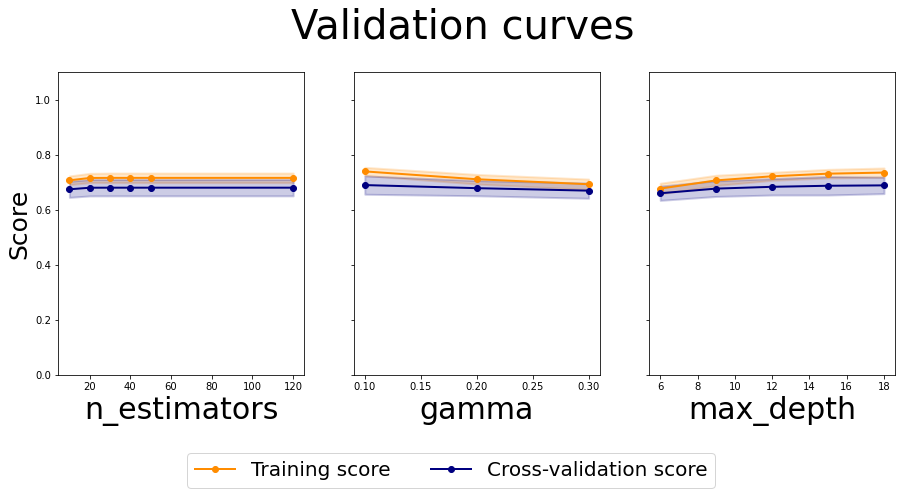

In [ ]:
graficas_cross_validation(parametros_xgb_regressor,gridsearch_xgboost_proyecto2)

Analizamos cada hiperaparametro:
    
* n_estimators: A partir de 20 el score se mantiene constantes.
* Gamma: Es aproximadamente constante para todos los valores.
* Max_depth: Es aproximadamente constante para todos los valores pero se nota un levemente mejor score para 18 y el modelo sigue siendo robusto.

In [ ]:
mejor_modelo_xgboost_proyecto2 = gridsearch_xgboost_proyecto2.best_estimator_
mejor_resultado_xgboost_proyecto2 = gridsearch_xgboost_proyecto2.best_score_

print("El mejor modelo es: ",mejor_modelo_xgboost_proyecto2)
print("El mejor resultado es: ",mejor_resultado_xgboost_proyecto2)

El mejor modelo es:  XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.1, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=18,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=20, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
El mejor resultado es:  0.7016493420870998


In [ ]:
y_predicciones_entrenamiento_xgboost_proyecto2 = mejor_modelo_xgboost_proyecto2.predict(X_train_proyecto2)
y_predicciones_pruebas_xgboost_proyecto2 = mejor_modelo_xgboost_proyecto2.predict(X_test_proyecto2)

resultados_xgboost_entrenamiento = mean_squared_error(y_train_proyecto2, y_predicciones_entrenamiento_xgboost_proyecto2)
resultados_xgboost_pruebas = mean_squared_error(y_test_proyecto2, y_predicciones_pruebas_xgboost_proyecto2)

score_train_xgboost_proyecto2=mejor_modelo_xgboost_proyecto2.score(X_train_proyecto2,y_train_proyecto2)
score_test_xgboost_proyecto2=mejor_modelo_xgboost_proyecto2.score(X_test_proyecto2,y_test_proyecto2)

rmse_train_xgboost_proyecto2 = np.sqrt(resultados_xgboost_entrenamiento)
rmse_test_xgboost_proyecto2 = np.sqrt(resultados_xgboost_pruebas)

print("El score en train del mejor modelo es de: ",score_train_xgboost_proyecto2)
print("El score en test del mejor modelo es de: ",score_test_xgboost_proyecto2)
print("\n")
print("El RMSE del entrenamiento del mejor modelo es: ",rmse_train_xgboost_proyecto2)
print("El RMSE de pruebas del mejor modelo es: ",rmse_test_xgboost_proyecto2)


El score en train del mejor modelo es de:  0.7718170729487014
El score en test del mejor modelo es de:  0.7225269504244707


El RMSE del entrenamiento del mejor modelo es:  0.07729269391961384
El RMSE de pruebas del mejor modelo es:  0.08604569192557245


Por lo tanto el mejor modelo es con max_depth=18, n_estimators=20 y gamma=0.1.

## 5.b- Evaluación

### Evaluar los resultados

Evaluare tambien los tiempos de procesamiento de los modelos elegidos.

In [ ]:
import time

In [ ]:
start = time.time()
arbol_proyecto1.fit(X_train_proyecto1,y_train_proyecto1)
end = time.time()
time_arbol_proyecto1 = end - start
print(time_arbol_proyecto1)

0.10172605514526367


In [ ]:
start = time.time()
mejor_modelo_DT_proyecto2.fit(X_train_proyecto2,y_train_proyecto2)
end = time.time()
time_mejor_modelo_DT_proyecto2 = end - start
print(time_mejor_modelo_DT_proyecto2)

0.06283140182495117


In [ ]:
start = time.time()
mejor_modelo_random_forest_proyecto2.fit(X_train_proyecto2,y_train_proyecto2)
end = time.time()
time_mejor_modelo_random_forest_proyecto2 = end - start
print(time_mejor_modelo_random_forest_proyecto2)

4.093045711517334


In [ ]:
start = time.time()
mejor_modelo_xgboost_proyecto2.fit(X_train_proyecto2,y_train_proyecto2)
end = time.time()
time_mejor_modelo_xgboost_proyecto2 = end - start
print(time_mejor_modelo_xgboost_proyecto2)

1.100092887878418


A continuacion voy a crear una tabla con los resultados de los mejores modelos evaluados para cada modelo.

In [ ]:
data = {'Modelo':  ['Decission Tree (Proy 1)','Decission Tree', 'Random Forest','XGBOST'],
        'Score_en_Train': [score_train,score_train_DT_proyecto2, score_train_randomf_proyecto2,score_train_xgboost_proyecto2],
        'Score_en_Test': [score_test,score_test_DT_proyecto2, score_test_randomf_proyecto2,score_test_xgboost_proyecto2],
        'RMSE_en_Train': [rmse_train,rmse_train_DT_proyecto2, rmse_train_randomf_proyecto2,rmse_train_xgboost_proyecto2],
        'RMSE_en_Test': [rmse_test,rmse_test_DT_proyecto2, rmse_test_randomf_proyecto2,rmse_test_xgboost_proyecto2],
        'Time': [time_arbol_proyecto1,time_mejor_modelo_DT_proyecto2,time_mejor_modelo_random_forest_proyecto2,time_mejor_modelo_xgboost_proyecto2]
        }

mejores_modelos = pd.DataFrame (data, columns = ['Modelo', 'Score_en_Train','Score_en_Test','RMSE_en_Train','RMSE_en_Test','Time'])
mejores_modelos

Modelo  Score_en_Train  Score_en_Test  RMSE_en_Train  \
0  Decission Tree (Proy 1)        0.787936       0.728015       0.077416   
1           Decission Tree        0.796807       0.698276       0.072938   
2            Random Forest        0.831245       0.747143       0.066470   
3                   XGBOST        0.771817       0.722527       0.077293   

   RMSE_en_Test      Time  
0      0.093465  0.101726  
1      0.089727  0.062831  
2      0.082140  4.093046  
3      0.086046  1.100093

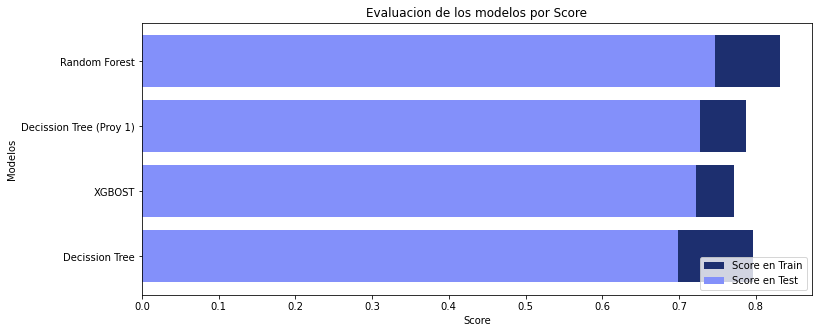

In [ ]:
mejores_modelos=mejores_modelos.sort_values('Score_en_Test')
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[12,5])# Passing the parameters to the bar function, this is the main function which creates the bar plot
# For creating the horizontal make sure that you append 'h' to the bar function name
plt.barh(mejores_modelos.Modelo, mejores_modelos.Score_en_Train, label = "Score en Train", color = '#1D2F6F')
plt.barh(mejores_modelos.Modelo, mejores_modelos.Score_en_Test, label = "Score en Test", color = '#8390FA')# Creating the legend of the bars in the plot
plt.legend()# Namimg the x and y axis
plt.xlabel('Score')
plt.ylabel('Modelos')# Giving the tilte for the plot
plt.title('Evaluacion de los modelos por Score')# Saving the plot as a 'png'
plt.savefig('2BarPlot.png')# Displaying the bar plot
plt.show()

El mejor score se da en el modelo de random forestcon el mejor resuiltado tanto en train como en test.

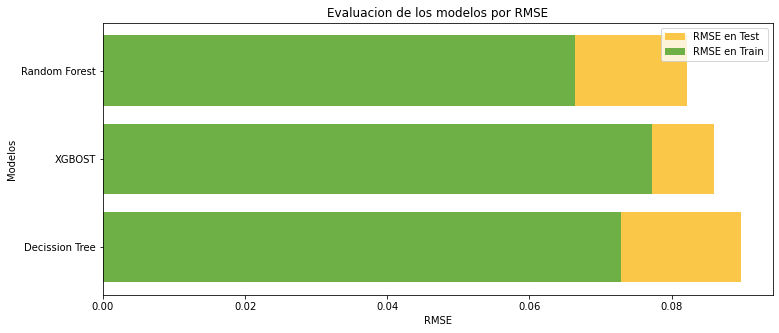

In [ ]:
mejores_modelos=mejores_modelos.sort_values('RMSE_en_Test',ascending=False)
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[12, 5])# Passing the parameters to the bar function, this is the main function which creates the bar plot
# For creating the horizontal make sure that you append 'h' to the bar function name
plt.barh(mejores_modelos[(mejores_modelos.Modelo != 'Decission Tree (Proy 1)')].Modelo, mejores_modelos[(mejores_modelos.Modelo != 'Decission Tree (Proy 1)')].RMSE_en_Test, label = "RMSE en Test", color = '#FAC748')
plt.barh(mejores_modelos[(mejores_modelos.Modelo != 'Decission Tree (Proy 1)')].Modelo, mejores_modelos[(mejores_modelos.Modelo != 'Decission Tree (Proy 1)')].RMSE_en_Train, label = "RMSE en Train", color = '#6EAF46')# Creating the legend of the bars in the plot
plt.legend()# Namimg the x and y axis
plt.xlabel('RMSE')
plt.ylabel('Modelos')# Giving the tilte for the plot
plt.title('Evaluacion de los modelos por RMSE')# Saving the plot as a 'png'
plt.savefig('2BarPlot.png')# Displaying the bar plot
plt.show()

Aqui no comparamos con el RMSE del proyecto 1 ya que la escala es distinta. El mejor modelo (con menor RMSE) se da en el random forest tanto en train como en test.

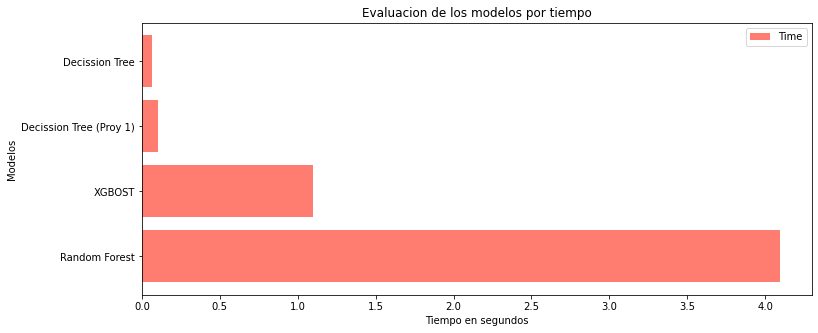

In [ ]:
mejores_modelos=mejores_modelos.sort_values('Time',ascending=False)
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[12, 5])# Passing the parameters to the bar function, this is the main function which creates the bar plot
# For creating the horizontal make sure that you append 'h' to the bar function name
plt.barh(mejores_modelos.Modelo, mejores_modelos.Time, label = "Time", color = '#ff7c70')
# Creating the legend of the bars in the plot
plt.legend()# Namimg the x and y axis
plt.xlabel('Tiempo en segundos')
plt.ylabel('Modelos')# Giving the tilte for the plot
plt.title('Evaluacion de los modelos por tiempo')# Saving the plot as a 'png'
plt.savefig('2BarPlot.png')# Displaying the bar plot
plt.show()

Notamos que el modelo mas rapido es el decission tree del proyecto 2 pero no mucho mayor que el del proyecto 1 (aunque el proyecto 1 es un dataset de menor tamaño). Por lo tanto podemos afirmar que el decission tree del proyecto 1 es mejor modelo que el decission tree del proyecto 2.

A continuación analizaremos los errores en todos los moodelos con mayor profundidad:

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


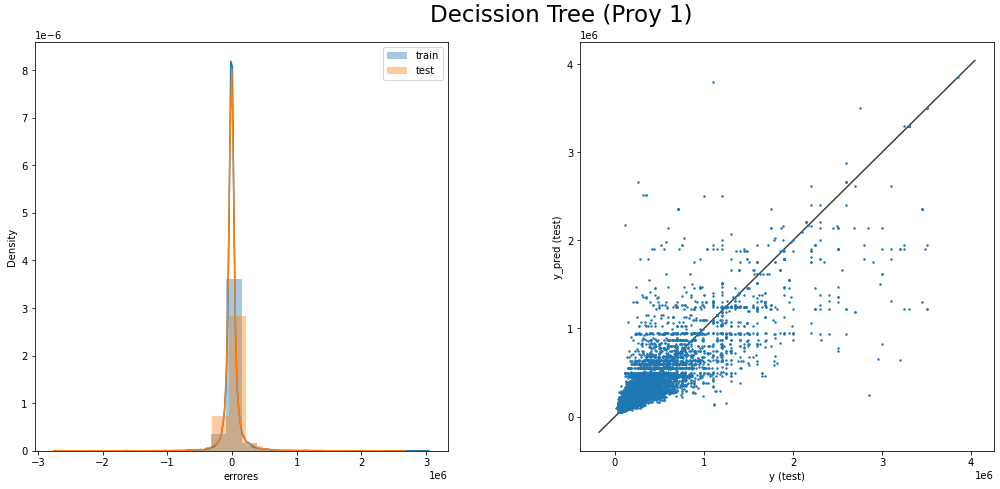

Los RMSE en Decission Tree (Proy 1) son:
Raíz del error cuadrático medio en Train: 136704.14350152665
Raíz del error cuadrático medio en Test: 152751.78295443917




D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


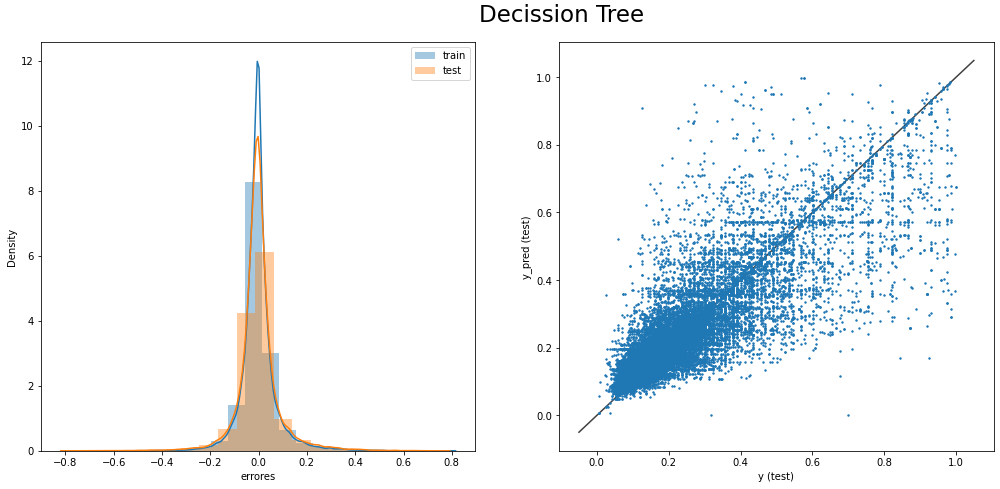

Los RMSE en Decission Tree son:
Raíz del error cuadrático medio en Train: 0.07293756091715814
Raíz del error cuadrático medio en Test: 0.08972716875020692




D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


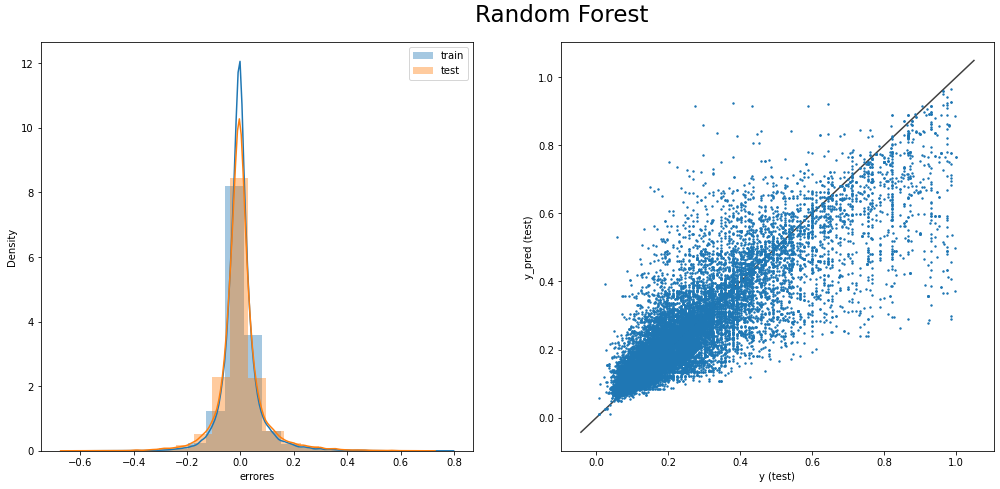

Los RMSE en Random Forest son:
Raíz del error cuadrático medio en Train: 0.06646995593139433
Raíz del error cuadrático medio en Test: 0.08214023785396901




D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


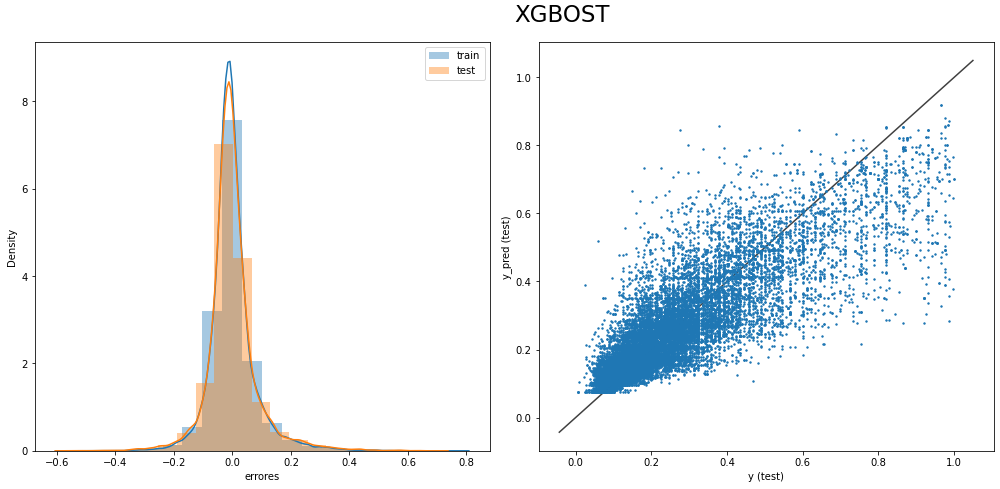

Los RMSE en XGBOST son:
Raíz del error cuadrático medio en Train: 0.07729269391961384
Raíz del error cuadrático medio en Test: 0.08604569192557245




In [ ]:
from sklearn.metrics import mean_squared_error
import seaborn as sns
modelos = ['Decission Tree (Proy 1)','Decission Tree', 'Random Forest','XGBOST']

y_train_pred_list = [y_train_pred_proyecto1,y_predicciones_entrenamiento_DT_proyecto2,y_predicciones_entrenamiento_randomf_proyecto2,y_predicciones_entrenamiento_xgboost_proyecto2]
y_test_pred_list = [y_test_pred_proyecto1,y_predicciones_pruebas_DT_proyecto2,y_predicciones_pruebas_randomf_proyecto2,y_predicciones_pruebas_xgboost_proyecto2]

for i in range(0,4):
    y_train_pred = y_train_pred_list[i]
    y_test_pred = y_test_pred_list[i]
    
    if i==0:
        y_train = y_train_proyecto1
        y_test = y_test_proyecto1
    else:
        y_train = y_train_proyecto2
        y_test = y_test_proyecto2
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    plt.figure(figsize = (14,7))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    plt.text(x=0.65, y=0.65, s='{}'.format(modelos[i]), fontsize=23, ha="center", transform=fig.transFigure)
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()
    
    print('Los RMSE en {} son:'.format(modelos[i]))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    print('\n')

Analizamos las graficas obtenidas de valores reales vs valores predichos en cada uno de los modelos y tuvimos en cuenta sus errores tanto en testing como en train. De esta manera lLegamos a la conclusion de que el modelo de random forest es el que mejor desempeño tiene. Con un valor de RMSE menor al resto de los modelos en testing y en train. También podemos concluir que a medida que aumentan los valores del precio en sus valores reales tanto como en los predichos, se nota una menor correlacion que en sus valores mas pequeños.

#### En el caso *b* concluimos lo siguiente

Notamos que el modelo mas rapido es el decission tree del proyecto 2. Con mejor score en train pero menor en test que el del proyecto 1.

XGBOOST y Random Forest son los mejores en score y en RMSE pero tienen un tiempo de ejecucion considerable en comparacion al arbol de decision.

Por lo tanto, como el tiempo de ejecucion del Random forest no es muy alto y tiene el mejor score y el menor RMSE, concluimos que es el mejor modelo evaluado.

## 6- Conclusion

Como conclusion final vamos a comparar los modelos de la sección a (todas las variables numericas) con el b (solo bathroom, surface_total y surface_covered):

* Caso a:

Los modelos avanzados de XGBOOST y Random Forest son los mejores en score y en RMSE pero tienen un tiempo de ejecucion considerable en comparacion al arbol de decision.

Notamos que el modelo mas rapido es el decission tree del proyecto 2. Con mejor score en train pero menor en test que el del proyecto 1.

Por lo tanto, como el tiempo de ejecucion del Random forest no es muy alto y tiene el mejor score y el menor RMSE, concluimos que es el mejor modelo evaluado.

**El mejor modelo es Random Forest con un score de 0.82**.

El mayor error se da en el modelo de decission tree del proyecto 2 tanto en train como en test.

* Caso b: 

Podemos afirmar que en los modelos con sólo las variables de bathroom, surface_total y surface_covered, se produce una perdida de score y un aumento del rmse. Con un mejor desempeño en el random forest.

Notamos también que en el caso de la realizacion de los modelos con tan sólo las variables bathroom, surface_total y surface_covered, el error es un poco mayor pero su diferencia entre train y test es menor que la diferencia entre ambas que en el caso de la utilizacion de todas las variables.

**El mejor modelo es el Random Forest con un score de 0.75**.

El mayor error se da en el modelo de decission tree del proyecto 2  en test y en XGBOOST en train.

---

En la elaboración de modelos, es común encontrar una pérdida de precisión o un aumento de error a medida que remuevo variables. Es decir que se pierde información (aunque sea minima) de las variables que retiro. Ahora si bien es cierto, la mayor cantidad de información se puede concentrar en dos variables, se nota una mejora importante en el modelado con todas las variables en el modelo avanzado de Random Forest.

Random Forest es el mejor modelo de todos los evaluados tanto con todas las variables y con sólo surface_covered, surface_total y bathroom.

Cuando entrenamos un modelo, no solamente queremos que prediga correctamente, sino también buscamos que nos sirva para aprender sobre nuestro problema. Un análisis bastante informativo que podemos hacer es ver la importancia de cada atributo para nuestro modelo. Intuitivamente, buenos atributos predictores serán más importantes que malos atributos predictores. Es raro entrenar un modelo sin tener una primera aproximación a estos aspectos de nuestro problema. No por nada arrancamos primero con un buen Análisis Exploratorio de Datos. Pero una vez que ya tenemos el modelo entrenado, vale la pena mirar si lo que esperábamos realmente sucede, o si hay algo que no habíamos visto.

Por ejemplo, al comienzo del proyecto mencionamos que las variables que suponíamos que más nos iban ayudar al predecir el precio eran:

* Ubicación del inmueble.
* Cantidad de habitaciones y baños.
* Superficie total y superficie cubierta.
* Tipo de propiedad.

Y del estudio realizado notamos que que las superficies totales y cubiertas y la cantidad de baños son las más influyentes para predecir el precio. En cambio la cantidad de habitaciones si bien influye levemente, no es muy relevante. También podemos afirmar que el tipo de propiedad no tuvo una gran participación a la hora de realizar las predicciones y hasta podría descartarse para el modelado. 

Nos faltó analizar de manera más exhaustiva las ubicaciones del inmueble y buscar una manera de generar una variable numérica que represnete dichas ubicaciones y a estas utilizarlas para la realización de los modelos. Una manera podría ser la realización de variables dummies para cada uno de los barrios del dataset, aunque no consideramos que sea de gran utilidad puesto que añadiriamos aproximadamente 57 columnas mas a nuestro dataset. Otra solución podría ser la de crear una columna la cual contenga un valor en el rango de 1 a 57 (cantidad de barrios), asignando el valor 57 (el más alto) al barrio con el precio promedio más caro de todos y 1 al barrio con el precio más barato. Pero para realizar esto consideramos que se debería tener en cuenta las desviaciones estándar del precio de cada barrio y realizar un filtrado de los barrios cuyas desviaciones estándar sean muy elevadas para no estar sesgando la muestra con dichas desviaciones.

---


